# Reproducing Feldmann-Wustefel CDA Study (2018) Exp2

## Notes

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Feldmann-Wustefeld-2018/')
from events import get_specific_events
 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

Processing: Hudson2_0015.vhdr...
Extracting parameters from /Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment2/rawEEG/Hudson2_0015.vhdr...
Setting channel info structure...
Reading 0 ... 5054619  =      0.000 ...  5054.619 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    8.78it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:34<00:00,    6.91s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  720.16it/s]

  2%|▌                    | Repairing epochs : 24/960 [00:00<00:01,  725.88it/s]

  4%|▊                    | Repairing epochs : 36/960 [00:00<00:01,  724.92it/s]

  5%|█                    | Repairing epochs : 48/960 [00:00<00:01,  726.05it/s]

  6%|█▎                   | Repairing epochs : 60/960 [00:00<00:01,  730.88it/s]

  8%|█▌                   | Repairing epochs : 73/960 [00:00<00:01,  736.70it/s]

  9%|█▊                   | Repairing epochs : 85/960 [00:00<00:01,  733.89it/s]

 10%|██▏                  | Repairing epochs : 98/960 [00:00<00:01,  736.57it/s]

 11%|██▎                 | Repairing epochs : 110/960 [00:00<00:01,  734.51it/s]

 13%|██▌        

 44%|████████▉           | Repairing epochs : 427/960 [00:01<00:02,  223.64it/s]

 45%|████████▉           | Repairing epochs : 431/960 [00:01<00:02,  221.43it/s]

 45%|█████████           | Repairing epochs : 434/960 [00:01<00:02,  218.48it/s]

 46%|█████████▏          | Repairing epochs : 438/960 [00:01<00:02,  216.34it/s]

 46%|█████████▏          | Repairing epochs : 442/960 [00:01<00:02,  217.76it/s]

 46%|█████████▎          | Repairing epochs : 446/960 [00:01<00:02,  218.78it/s]

 47%|█████████▎          | Repairing epochs : 449/960 [00:02<00:02,  215.39it/s]

 47%|█████████▍          | Repairing epochs : 453/960 [00:02<00:02,  214.05it/s]

 48%|█████████▌          | Repairing epochs : 459/960 [00:02<00:02,  219.56it/s]

 48%|█████████▋          | Repairing epochs : 464/960 [00:02<00:02,  222.30it/s]

 49%|█████████▊          | Repairing epochs : 468/960 [00:02<00:02,  223.25it/s]

 49%|█████████▊          | Repairing epochs : 471/960 [00:02<00:02,  221.63it/s]

 50%|█████████▉ 

 17%|███▍                | Repairing epochs : 164/960 [00:00<00:03,  216.92it/s]

 18%|███▌                | Repairing epochs : 168/960 [00:00<00:03,  215.28it/s]

 18%|███▋                | Repairing epochs : 175/960 [00:00<00:03,  222.89it/s]

 19%|███▋                | Repairing epochs : 178/960 [00:00<00:03,  220.72it/s]

 19%|███▊                | Repairing epochs : 181/960 [00:00<00:03,  216.01it/s]

 19%|███▊                | Repairing epochs : 185/960 [00:00<00:03,  214.82it/s]

 20%|███▉                | Repairing epochs : 188/960 [00:00<00:03,  212.77it/s]

 20%|████                | Repairing epochs : 192/960 [00:00<00:03,  212.28it/s]

 20%|████                | Repairing epochs : 195/960 [00:00<00:03,  211.02it/s]

 21%|████▏               | Repairing epochs : 200/960 [00:00<00:03,  214.64it/s]

 21%|████▎               | Repairing epochs : 204/960 [00:00<00:03,  215.86it/s]

 22%|████▎               | Repairing epochs : 208/960 [00:00<00:03,  213.96it/s]

 22%|████▍      

 94%|██████████████████▉ | Repairing epochs : 907/960 [00:04<00:00,  206.07it/s]

 95%|███████████████████ | Repairing epochs : 913/960 [00:04<00:00,  211.78it/s]

 96%|███████████████████ | Repairing epochs : 917/960 [00:04<00:00,  210.25it/s]

 96%|███████████████████▏| Repairing epochs : 922/960 [00:04<00:00,  213.12it/s]

 96%|███████████████████▎| Repairing epochs : 926/960 [00:04<00:00,  214.16it/s]

 97%|███████████████████▍| Repairing epochs : 931/960 [00:04<00:00,  216.99it/s]

 98%|███████████████████▌| Repairing epochs : 939/960 [00:04<00:00,  225.66it/s]

 98%|███████████████████▋| Repairing epochs : 945/960 [00:04<00:00,  229.98it/s]

 99%|███████████████████▊| Repairing epochs : 948/960 [00:04<00:00,  225.63it/s]

 99%|███████████████████▊| Repairing epochs : 952/960 [00:04<00:00,  225.96it/s]

 99%|███████████████████▉| Repairing epochs : 955/960 [00:04<00:00,  224.19it/s]

100%|████████████████████| Repairing epochs : 960/960 [00:04<00:00,  217.21it/s]



  0%|         

 68%|█████████████▌      | Repairing epochs : 648/960 [00:03<00:01,  211.32it/s]

 68%|█████████████▌      | Repairing epochs : 652/960 [00:03<00:01,  212.77it/s]

 68%|█████████████▋      | Repairing epochs : 656/960 [00:03<00:01,  211.30it/s]

 69%|█████████████▊      | Repairing epochs : 660/960 [00:03<00:01,  210.50it/s]

 69%|█████████████▊      | Repairing epochs : 663/960 [00:03<00:01,  206.97it/s]

 69%|█████████████▉      | Repairing epochs : 666/960 [00:03<00:01,  204.65it/s]

 70%|█████████████▉      | Repairing epochs : 669/960 [00:03<00:01,  199.93it/s]

 70%|██████████████      | Repairing epochs : 673/960 [00:03<00:01,  199.33it/s]

 71%|██████████████▏     | Repairing epochs : 678/960 [00:03<00:01,  202.77it/s]

 71%|██████████████▏     | Repairing epochs : 682/960 [00:03<00:01,  204.58it/s]

 71%|██████████████▎     | Repairing epochs : 685/960 [00:03<00:01,  201.54it/s]

 72%|██████████████▎     | Repairing epochs : 688/960 [00:03<00:01,  200.83it/s]

 72%|███████████





Estimated consensus=0.60 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 3/960 [00:00<00:05,  181.99it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:04,  211.19it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:04,  198.57it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:04,  204.44it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:03,  236.34it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:03,  252.04it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:04,  231.26it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:04,  214.65it/s]

  4%|▊                    | Repairing epochs : 37/960 [00:00<00:04,  208.65it/s]

  4%|▉                    | Repairing epochs : 41/960 [00:00<00:04,  210.83it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:04,  199.29it/s]

  5%|█        

 80%|████████████████    | Repairing epochs : 770/960 [00:03<00:00,  215.31it/s]

 81%|████████████████▏   | Repairing epochs : 774/960 [00:03<00:00,  216.40it/s]

 81%|████████████████▎   | Repairing epochs : 782/960 [00:03<00:00,  228.10it/s]

 82%|████████████████▍   | Repairing epochs : 786/960 [00:03<00:00,  228.68it/s]

 82%|████████████████▍   | Repairing epochs : 791/960 [00:03<00:00,  231.32it/s]

 83%|████████████████▌   | Repairing epochs : 794/960 [00:03<00:00,  227.11it/s]

 83%|████████████████▌   | Repairing epochs : 797/960 [00:03<00:00,  222.56it/s]

 84%|████████████████▋   | Repairing epochs : 802/960 [00:03<00:00,  225.21it/s]

 84%|████████████████▊   | Repairing epochs : 805/960 [00:03<00:00,  221.48it/s]

 84%|████████████████▉   | Repairing epochs : 810/960 [00:03<00:00,  221.91it/s]

 85%|████████████████▉   | Repairing epochs : 814/960 [00:03<00:00,  222.73it/s]

 85%|█████████████████   | Repairing epochs : 818/960 [00:03<00:00,  220.78it/s]

 86%|███████████

Dropped 12 epochs: 6, 95, 120, 184, 254, 432, 511, 600, 619, 641, 830, 839


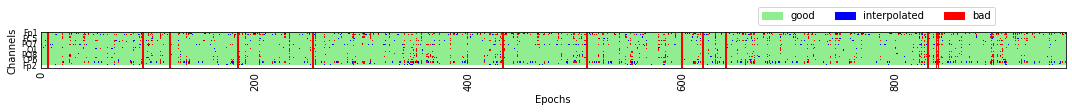

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:02<00:00,   10.70it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:45<00:00,    7.27s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:01,  760.01it/s]

  2%|▌                    | Repairing epochs : 24/960 [00:00<00:01,  713.31it/s]

  4%|▊                    | Repairing epochs : 36/960 [00:00<00:01,  720.09it/s]

  5%|█                    | Repairing epochs : 48/960 [00:00<00:01,  722.34it/s]

  6%|█▎                   | Repairing epochs : 60/960 [00:00<00:01,  726.09it/s]

  8%|█▌                   | Repairing epochs : 72/960 [00:00<00:01,  726.99it/s]

  9%|█▊                   | Repairing epochs : 84/960 [00:00<00:01,  729.84it/s]

 10%|██                   | Repairing epochs : 96/960 [00:00<00:01,  730.05it/s]

 11%|██▎                 | Repairing epochs : 108/960 [00:00<00:01,  729.99it/s]

 12%|██▌        

 37%|███████▍            | Repairing epochs : 355/960 [00:01<00:03,  179.96it/s]

 38%|███████▌            | Repairing epochs : 360/960 [00:01<00:03,  183.32it/s]

 38%|███████▌            | Repairing epochs : 363/960 [00:01<00:03,  182.22it/s]

 38%|███████▋            | Repairing epochs : 368/960 [00:01<00:03,  185.11it/s]

 39%|███████▋            | Repairing epochs : 371/960 [00:02<00:03,  183.22it/s]

 39%|███████▊            | Repairing epochs : 375/960 [00:02<00:03,  183.54it/s]

 39%|███████▉            | Repairing epochs : 378/960 [00:02<00:03,  182.30it/s]

 40%|███████▉            | Repairing epochs : 382/960 [00:02<00:03,  182.98it/s]

 40%|████████            | Repairing epochs : 386/960 [00:02<00:03,  183.52it/s]

 41%|████████            | Repairing epochs : 389/960 [00:02<00:03,  182.05it/s]

 41%|████████▏           | Repairing epochs : 392/960 [00:02<00:03,  180.30it/s]

 41%|████████▎           | Repairing epochs : 396/960 [00:02<00:03,  182.68it/s]

 42%|████████▎  

  1%|                      | Repairing epochs : 5/960 [00:00<00:03,  280.76it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:03,  254.62it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:04,  230.73it/s]

  2%|▍                    | Repairing epochs : 19/960 [00:00<00:03,  244.47it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:04,  225.43it/s]

  3%|▌                    | Repairing epochs : 26/960 [00:00<00:04,  218.61it/s]

  3%|▋                    | Repairing epochs : 29/960 [00:00<00:04,  208.37it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:04,  199.45it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:04,  191.58it/s]

  4%|▊                    | Repairing epochs : 39/960 [00:00<00:04,  197.35it/s]

  4%|▉                    | Repairing epochs : 42/960 [00:00<00:04,  195.75it/s]

  5%|▉                    | Repairing epochs : 45/960 [00:00<00:04,  187.65it/s]

  5%|█          

 71%|██████████████▏     | Repairing epochs : 679/960 [00:03<00:01,  193.66it/s]

 71%|██████████████▏     | Repairing epochs : 683/960 [00:03<00:01,  193.60it/s]

 71%|██████████████▎     | Repairing epochs : 686/960 [00:03<00:01,  191.12it/s]

 72%|██████████████▎     | Repairing epochs : 689/960 [00:03<00:01,  188.69it/s]

 72%|██████████████▍     | Repairing epochs : 692/960 [00:03<00:01,  186.72it/s]

 72%|██████████████▍     | Repairing epochs : 695/960 [00:03<00:01,  186.24it/s]

 73%|██████████████▌     | Repairing epochs : 698/960 [00:03<00:01,  184.34it/s]

 73%|██████████████▌     | Repairing epochs : 701/960 [00:03<00:01,  182.69it/s]

 73%|██████████████▋     | Repairing epochs : 704/960 [00:03<00:01,  181.34it/s]

 74%|██████████████▋     | Repairing epochs : 707/960 [00:03<00:01,  181.53it/s]

 74%|██████████████▊     | Repairing epochs : 710/960 [00:03<00:01,  179.20it/s]

 74%|██████████████▊     | Repairing epochs : 713/960 [00:03<00:01,  177.79it/s]

 75%|███████████

 34%|██████▊             | Repairing epochs : 324/960 [00:01<00:03,  189.15it/s]

 34%|██████▊             | Repairing epochs : 328/960 [00:01<00:03,  188.83it/s]

 34%|██████▉             | Repairing epochs : 331/960 [00:01<00:03,  186.93it/s]

 35%|██████▉             | Repairing epochs : 334/960 [00:01<00:03,  186.53it/s]

 35%|███████             | Repairing epochs : 338/960 [00:01<00:03,  187.07it/s]

 36%|███████▏            | Repairing epochs : 342/960 [00:01<00:03,  187.03it/s]

 36%|███████▏            | Repairing epochs : 345/960 [00:01<00:03,  184.72it/s]

 36%|███████▎            | Repairing epochs : 348/960 [00:01<00:03,  183.34it/s]

 37%|███████▎            | Repairing epochs : 352/960 [00:01<00:03,  185.72it/s]

 37%|███████▍            | Repairing epochs : 355/960 [00:01<00:03,  184.18it/s]

 37%|███████▍            | Repairing epochs : 359/960 [00:01<00:03,  186.42it/s]

 38%|███████▌            | Repairing epochs : 362/960 [00:01<00:03,  184.68it/s]

 38%|███████▌   

 40%|██████████████                     | Fold : 4/10 [00:00<00:00,    6.34it/s]


 50%|█████████████████▌                 | Fold : 5/10 [00:00<00:00,    6.29it/s]


 60%|█████████████████████              | Fold : 6/10 [00:00<00:00,    6.31it/s]


 70%|████████████████████████▌          | Fold : 7/10 [00:01<00:00,    6.31it/s]


 80%|████████████████████████████       | Fold : 8/10 [00:01<00:00,    6.29it/s]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:01<00:00,    6.29it/s]


100%|██████████████████████████████████| Fold : 10/10 [00:01<00:00,    6.28it/s]

100%|████████████████████████████████| n_interp : 3/3 [00:47<00:00,   15.96s/it]






Estimated consensus=0.50 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:03,  285.96it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:03,  252.98it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:03,  236.83it/s]

  2%|▍                    | Repairing epochs : 19/960 [00:00<00:03,  248.36it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:04,  231.01it/s]

  3%|▌                    | Repairing epochs : 26/960 [00:00<00:04,  226.37it/s]

  3%|▋                    | Repairing epochs : 29/960 [00:00<00:04,  213.13it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:04,  205.16it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:04,  197.89it/s]

  4%|▊                    | Repairing epochs : 39/960 [00:00<00:04,  202.15it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:04,  200.31it/s]

  5%|█        

 68%|█████████████▋      | Repairing epochs : 654/960 [00:03<00:01,  164.96it/s]

 68%|█████████████▋      | Repairing epochs : 657/960 [00:03<00:01,  165.66it/s]

 69%|█████████████▊      | Repairing epochs : 661/960 [00:03<00:01,  168.83it/s]

 69%|█████████████▊      | Repairing epochs : 663/960 [00:03<00:01,  166.07it/s]

 69%|█████████████▊      | Repairing epochs : 665/960 [00:03<00:01,  159.59it/s]

 69%|█████████████▉      | Repairing epochs : 667/960 [00:03<00:01,  155.15it/s]

 70%|█████████████▉      | Repairing epochs : 669/960 [00:03<00:01,  153.42it/s]

 70%|██████████████      | Repairing epochs : 672/960 [00:03<00:01,  153.09it/s]

 70%|██████████████      | Repairing epochs : 675/960 [00:03<00:01,  152.96it/s]

 71%|██████████████▏     | Repairing epochs : 679/960 [00:03<00:01,  156.75it/s]

 71%|██████████████▏     | Repairing epochs : 683/960 [00:03<00:01,  158.62it/s]

 71%|██████████████▎     | Repairing epochs : 686/960 [00:03<00:01,  157.74it/s]

 72%|███████████

Dropped 15 epochs: 122, 244, 308, 389, 453, 551, 604, 672, 690, 777, 778, 824, 832, 931, 936


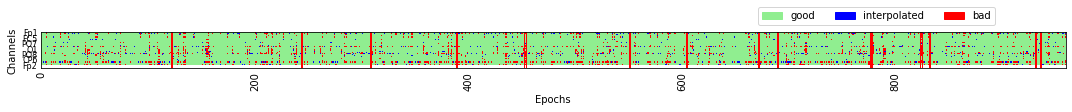

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 1086 | Total Added: 1086 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1086 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1086 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1086 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    9.41it/s]
100%|██████████████| Computing thresholds ... : 31/31 [04:06<00:00,    7.95s/it]


  0%|                         | Repairing epochs : 0/1086 [00:00<?,       ?it/s]

  1%|▏                   | Repairing epochs : 11/1086 [00:00<00:01,  677.59it/s]

  2%|▍                   | Repairing epochs : 22/1086 [00:00<00:01,  660.89it/s]

  3%|▌                   | Repairing epochs : 33/1086 [00:00<00:01,  662.75it/s]

  4%|▊                   | Repairing epochs : 45/1086 [00:00<00:01,  675.36it/s]

  5%|█                   | Repairing epochs : 57/1086 [00:00<00:01,  682.79it/s]

  6%|█▎                  | Repairing epochs : 69/1086 [00:00<00:01,  686.15it/s]

  7%|█▍                  | Repairing epochs : 81/1086 [00:00<00:01,  689.16it/s]

  9%|█▋                  | Repairing epochs : 93/1086 [00:00<00:01,  691.90it/s]

 10%|█▊                 | Repairing epochs : 105/1086 [00:00<00:01,  695.88it/s]

 11%|██         

 34%|██████▍            | Repairing epochs : 370/1086 [00:01<00:03,  209.54it/s]

 34%|██████▌            | Repairing epochs : 373/1086 [00:01<00:03,  208.06it/s]

 35%|██████▌            | Repairing epochs : 376/1086 [00:01<00:03,  206.49it/s]

 35%|██████▋            | Repairing epochs : 381/1086 [00:01<00:03,  210.44it/s]

 35%|██████▋            | Repairing epochs : 384/1086 [00:01<00:03,  209.27it/s]

 36%|██████▊            | Repairing epochs : 388/1086 [00:01<00:03,  210.45it/s]

 36%|██████▊            | Repairing epochs : 391/1086 [00:01<00:03,  207.15it/s]

 36%|██████▉            | Repairing epochs : 394/1086 [00:01<00:03,  203.95it/s]

 37%|██████▉            | Repairing epochs : 398/1086 [00:01<00:03,  203.09it/s]

 37%|███████            | Repairing epochs : 402/1086 [00:01<00:03,  205.10it/s]

 37%|███████            | Repairing epochs : 407/1086 [00:01<00:03,  208.96it/s]

 38%|███████▏           | Repairing epochs : 410/1086 [00:01<00:03,  205.63it/s]

 38%|███████▏   

 50%|█████████████████▌                 | Fold : 5/10 [00:08<00:08,    1.79s/it]


 60%|█████████████████████              | Fold : 6/10 [00:10<00:07,    1.78s/it]


 70%|████████████████████████▌          | Fold : 7/10 [00:12<00:05,    1.80s/it]


 80%|████████████████████████████       | Fold : 8/10 [00:14<00:03,    1.79s/it]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:16<00:01,    1.79s/it]


100%|██████████████████████████████████| Fold : 10/10 [00:17<00:00,    1.78s/it]

 33%|██████████▋                     | n_interp : 1/3 [00:23<00:46,   23.35s/it]

  0%|                         | Repairing epochs : 0/1086 [00:00<?,       ?it/s]

  0%|                     | Repairing epochs : 5/1086 [00:00<00:04,  262.14it/s]

  1%|▏                    | Repairing epochs : 9/1086 [00:00<00:04,  253.79it/s]

  1%|▏                   | Repairing epochs : 12/1086 [00:00<00:05,  214.27it/s]

  2%|▎                   | Repairing epochs : 19/1086 [00:00<00:04,  245.97it/s]

  2%|▍     

 64%|████████████       | Repairing epochs : 692/1086 [00:03<00:01,  215.15it/s]

 64%|████████████▏      | Repairing epochs : 695/1086 [00:03<00:01,  212.07it/s]

 64%|████████████▏      | Repairing epochs : 698/1086 [00:03<00:01,  209.18it/s]

 65%|████████████▎      | Repairing epochs : 703/1086 [00:03<00:01,  212.55it/s]

 65%|████████████▎      | Repairing epochs : 706/1086 [00:03<00:01,  209.12it/s]

 65%|████████████▍      | Repairing epochs : 710/1086 [00:03<00:01,  210.36it/s]

 66%|████████████▍      | Repairing epochs : 714/1086 [00:03<00:01,  211.60it/s]

 66%|████████████▌      | Repairing epochs : 718/1086 [00:03<00:01,  213.09it/s]

 67%|████████████▋      | Repairing epochs : 723/1086 [00:03<00:01,  214.15it/s]

 67%|████████████▋      | Repairing epochs : 727/1086 [00:03<00:01,  215.24it/s]

 67%|████████████▊      | Repairing epochs : 730/1086 [00:03<00:01,  211.78it/s]

 68%|████████████▉      | Repairing epochs : 737/1086 [00:03<00:01,  218.74it/s]

 68%|███████████

 25%|████▋              | Repairing epochs : 267/1086 [00:01<00:04,  199.94it/s]

 25%|████▋              | Repairing epochs : 271/1086 [00:01<00:04,  199.90it/s]

 25%|████▊              | Repairing epochs : 276/1086 [00:01<00:04,  201.60it/s]

 26%|████▉              | Repairing epochs : 280/1086 [00:01<00:03,  203.20it/s]

 26%|████▉              | Repairing epochs : 284/1086 [00:01<00:03,  202.78it/s]

 27%|█████              | Repairing epochs : 289/1086 [00:01<00:03,  205.92it/s]

 27%|█████▏             | Repairing epochs : 293/1086 [00:01<00:03,  205.32it/s]

 27%|█████▏             | Repairing epochs : 297/1086 [00:01<00:03,  206.83it/s]

 28%|█████▏             | Repairing epochs : 300/1086 [00:01<00:03,  204.16it/s]

 28%|█████▎             | Repairing epochs : 304/1086 [00:01<00:03,  203.78it/s]

 29%|█████▍             | Repairing epochs : 310/1086 [00:01<00:03,  206.67it/s]

 29%|█████▍             | Repairing epochs : 314/1086 [00:01<00:03,  205.34it/s]

 29%|█████▌     

 89%|████████████████▉  | Repairing epochs : 969/1086 [00:04<00:00,  196.35it/s]

 90%|█████████████████  | Repairing epochs : 973/1086 [00:04<00:00,  197.49it/s]

 90%|█████████████████  | Repairing epochs : 977/1086 [00:04<00:00,  199.07it/s]

 90%|█████████████████▏ | Repairing epochs : 982/1086 [00:04<00:00,  200.58it/s]

 91%|█████████████████▎ | Repairing epochs : 986/1086 [00:05<00:00,  202.06it/s]

 91%|█████████████████▎ | Repairing epochs : 989/1086 [00:05<00:00,  199.09it/s]

 91%|█████████████████▎ | Repairing epochs : 993/1086 [00:05<00:00,  201.11it/s]

 92%|█████████████████▍ | Repairing epochs : 997/1086 [00:05<00:00,  202.94it/s]

 92%|████████████████▌ | Repairing epochs : 1000/1086 [00:05<00:00,  199.62it/s]

 92%|████████████████▌ | Repairing epochs : 1003/1086 [00:05<00:00,  198.87it/s]

 93%|████████████████▊ | Repairing epochs : 1011/1086 [00:05<00:00,  208.77it/s]

 93%|████████████████▊ | Repairing epochs : 1015/1086 [00:05<00:00,  209.97it/s]

 94%|███████████





Estimated consensus=1.00 and n_interpolate=30




  0%|                         | Repairing epochs : 0/1086 [00:00<?,       ?it/s]

  0%|                     | Repairing epochs : 5/1086 [00:00<00:03,  274.42it/s]

  1%|▏                   | Repairing epochs : 10/1086 [00:00<00:04,  257.35it/s]

  1%|▏                   | Repairing epochs : 11/1086 [00:00<00:06,  176.71it/s]

  2%|▎                   | Repairing epochs : 18/1086 [00:00<00:04,  217.97it/s]

  2%|▍                   | Repairing epochs : 22/1086 [00:00<00:04,  213.39it/s]

  2%|▍                   | Repairing epochs : 26/1086 [00:00<00:04,  218.64it/s]

  3%|▌                   | Repairing epochs : 30/1086 [00:00<00:04,  213.78it/s]

  3%|▋                   | Repairing epochs : 37/1086 [00:00<00:04,  235.65it/s]

  4%|▋                   | Repairing epochs : 40/1086 [00:00<00:04,  228.91it/s]

  4%|▊                   | Repairing epochs : 44/1086 [00:00<00:04,  227.72it/s]

  4%|▉                   | Repairing epochs : 48/1086 [00:00<00:04,  222.96it/s]

  5%|▉        

 65%|████████████▍      | Repairing epochs : 709/1086 [00:03<00:01,  201.33it/s]

 66%|████████████▍      | Repairing epochs : 713/1086 [00:03<00:01,  202.49it/s]

 66%|████████████▌      | Repairing epochs : 718/1086 [00:03<00:01,  207.01it/s]

 66%|████████████▋      | Repairing epochs : 722/1086 [00:03<00:01,  208.71it/s]

 67%|████████████▋      | Repairing epochs : 724/1086 [00:03<00:01,  202.91it/s]

 67%|████████████▋      | Repairing epochs : 728/1086 [00:03<00:01,  204.15it/s]

 67%|████████████▊      | Repairing epochs : 731/1086 [00:03<00:01,  201.37it/s]

 68%|████████████▉      | Repairing epochs : 738/1086 [00:03<00:01,  207.82it/s]

 68%|████████████▉      | Repairing epochs : 741/1086 [00:03<00:01,  205.03it/s]

 69%|█████████████      | Repairing epochs : 747/1086 [00:03<00:01,  210.27it/s]

 69%|█████████████▏     | Repairing epochs : 751/1086 [00:03<00:01,  210.75it/s]

 69%|█████████████▏     | Repairing epochs : 754/1086 [00:03<00:01,  209.73it/s]

 70%|███████████

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


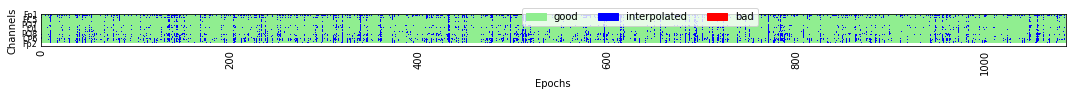

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:02<00:00,   11.06it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:47<00:00,    7.34s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:01,  757.88it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:01,  753.74it/s]

  4%|▊                    | Repairing epochs : 37/960 [00:00<00:01,  740.93it/s]

  5%|█                    | Repairing epochs : 49/960 [00:00<00:01,  742.49it/s]

  6%|█▎                   | Repairing epochs : 62/960 [00:00<00:01,  746.71it/s]

  8%|█▌                   | Repairing epochs : 74/960 [00:00<00:01,  740.48it/s]

  9%|█▉                   | Repairing epochs : 87/960 [00:00<00:01,  746.05it/s]

 10%|██                  | Repairing epochs : 100/960 [00:00<00:01,  747.61it/s]

 12%|██▎                 | Repairing epochs : 112/960 [00:00<00:01,  743.82it/s]

 13%|██▌        

 48%|█████████▌          | Repairing epochs : 459/960 [00:01<00:02,  235.41it/s]

 48%|█████████▋          | Repairing epochs : 462/960 [00:01<00:02,  232.82it/s]

 48%|█████████▋          | Repairing epochs : 465/960 [00:01<00:02,  227.95it/s]

 49%|█████████▊          | Repairing epochs : 469/960 [00:01<00:02,  226.45it/s]

 49%|█████████▉          | Repairing epochs : 475/960 [00:01<00:02,  230.17it/s]

 50%|█████████▉          | Repairing epochs : 479/960 [00:02<00:02,  229.66it/s]

 50%|██████████          | Repairing epochs : 482/960 [00:02<00:02,  227.37it/s]

 51%|██████████▏         | Repairing epochs : 486/960 [00:02<00:02,  227.91it/s]

 51%|██████████▏         | Repairing epochs : 490/960 [00:02<00:02,  228.18it/s]

 52%|██████████▎         | Repairing epochs : 497/960 [00:02<00:01,  234.45it/s]

 52%|██████████▍         | Repairing epochs : 501/960 [00:02<00:01,  234.84it/s]

 52%|██████████▌         | Repairing epochs : 504/960 [00:02<00:01,  232.28it/s]

 53%|██████████▌

 28%|█████▌              | Repairing epochs : 266/960 [00:01<00:02,  241.65it/s]

 28%|█████▋              | Repairing epochs : 270/960 [00:01<00:02,  239.46it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:01<00:02,  242.56it/s]

 29%|█████▊              | Repairing epochs : 278/960 [00:01<00:02,  237.13it/s]

 29%|█████▉              | Repairing epochs : 282/960 [00:01<00:02,  237.14it/s]

 30%|██████              | Repairing epochs : 290/960 [00:01<00:02,  245.97it/s]

 31%|██████▏             | Repairing epochs : 294/960 [00:01<00:02,  243.72it/s]

 31%|██████▏             | Repairing epochs : 298/960 [00:01<00:02,  241.13it/s]

 31%|██████▎             | Repairing epochs : 302/960 [00:01<00:02,  241.23it/s]

 32%|██████▍             | Repairing epochs : 306/960 [00:01<00:02,  241.15it/s]

 32%|██████▍             | Repairing epochs : 311/960 [00:01<00:02,  243.43it/s]

 33%|██████▌             | Repairing epochs : 314/960 [00:01<00:02,  239.12it/s]

 33%|██████▋    

  9%|█▊                   | Repairing epochs : 82/960 [00:00<00:03,  265.65it/s]

  9%|█▉                   | Repairing epochs : 86/960 [00:00<00:03,  262.96it/s]

 10%|██                   | Repairing epochs : 95/960 [00:00<00:03,  281.12it/s]

 11%|██                  | Repairing epochs : 101/960 [00:00<00:03,  283.08it/s]

 11%|██▏                 | Repairing epochs : 104/960 [00:00<00:03,  270.26it/s]

 11%|██▎                 | Repairing epochs : 108/960 [00:00<00:03,  263.26it/s]

 12%|██▎                 | Repairing epochs : 111/960 [00:00<00:03,  258.27it/s]

 12%|██▍                 | Repairing epochs : 116/960 [00:00<00:03,  259.86it/s]

 12%|██▍                 | Repairing epochs : 119/960 [00:00<00:03,  255.23it/s]

 13%|██▌                 | Repairing epochs : 122/960 [00:00<00:03,  250.88it/s]

 13%|██▋                 | Repairing epochs : 126/960 [00:00<00:03,  250.41it/s]

 14%|██▊                 | Repairing epochs : 132/960 [00:00<00:03,  255.24it/s]

 14%|██▊        

 95%|██████████████████▉ | Repairing epochs : 911/960 [00:03<00:00,  251.96it/s]

 95%|███████████████████ | Repairing epochs : 914/960 [00:03<00:00,  249.12it/s]

 96%|███████████████████▏| Repairing epochs : 918/960 [00:03<00:00,  246.32it/s]

 96%|███████████████████▏| Repairing epochs : 922/960 [00:03<00:00,  246.20it/s]

 96%|███████████████████▎| Repairing epochs : 925/960 [00:03<00:00,  240.35it/s]

 97%|███████████████████▎| Repairing epochs : 929/960 [00:03<00:00,  240.15it/s]

 97%|███████████████████▍| Repairing epochs : 932/960 [00:03<00:00,  235.27it/s]

 97%|███████████████████▍| Repairing epochs : 935/960 [00:03<00:00,  231.15it/s]

 98%|███████████████████▌| Repairing epochs : 938/960 [00:03<00:00,  226.63it/s]

 98%|███████████████████▋| Repairing epochs : 944/960 [00:03<00:00,  232.54it/s]

 99%|███████████████████▊| Repairing epochs : 949/960 [00:03<00:00,  233.42it/s]

 99%|███████████████████▊| Repairing epochs : 952/960 [00:03<00:00,  229.77it/s]

100%|███████████





Estimated consensus=0.60 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:02,  461.21it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:02,  358.74it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:03,  283.06it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:03,  257.00it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:03,  243.53it/s]

  3%|▌                    | Repairing epochs : 27/960 [00:00<00:03,  243.24it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:03,  243.59it/s]

  4%|▊                    | Repairing epochs : 39/960 [00:00<00:03,  277.12it/s]

  5%|█                    | Repairing epochs : 46/960 [00:00<00:03,  289.29it/s]

  5%|█                    | Repairing epochs : 51/960 [00:00<00:03,  289.64it/s]

  6%|█▏                   | Repairing epochs : 55/960 [00:00<00:03,  275.24it/s]

  6%|█▎       

 86%|█████████████████▏  | Repairing epochs : 823/960 [00:03<00:00,  249.15it/s]

 86%|█████████████████▏  | Repairing epochs : 827/960 [00:03<00:00,  246.28it/s]

 87%|█████████████████▎  | Repairing epochs : 832/960 [00:03<00:00,  248.66it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:03<00:00,  245.45it/s]

 87%|█████████████████▍  | Repairing epochs : 839/960 [00:03<00:00,  239.65it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:03<00:00,  247.99it/s]

 89%|█████████████████▊  | Repairing epochs : 852/960 [00:03<00:00,  249.45it/s]

 89%|█████████████████▊  | Repairing epochs : 857/960 [00:03<00:00,  251.11it/s]

 90%|█████████████████▉  | Repairing epochs : 860/960 [00:03<00:00,  245.79it/s]

 90%|██████████████████  | Repairing epochs : 864/960 [00:03<00:00,  245.21it/s]

 90%|██████████████████  | Repairing epochs : 868/960 [00:03<00:00,  245.41it/s]

 91%|██████████████████▏ | Repairing epochs : 870/960 [00:03<00:00,  240.06it/s]

 91%|███████████

Dropped 15 epochs: 191, 195, 220, 259, 398, 429, 464, 494, 507, 579, 655, 713, 759, 913, 928


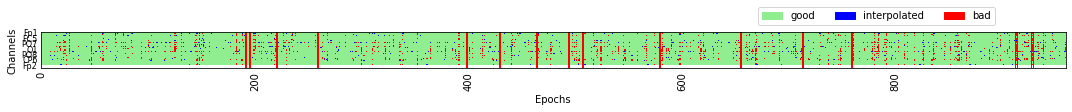

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    9.46it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:38<00:00,    7.06s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  676.97it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  669.27it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:01,  672.12it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:01,  673.51it/s]

  6%|█▏                   | Repairing epochs : 53/960 [00:00<00:01,  646.72it/s]

  7%|█▍                   | Repairing epochs : 64/960 [00:00<00:01,  649.52it/s]

  8%|█▋                   | Repairing epochs : 75/960 [00:00<00:01,  647.27it/s]

  9%|█▉                   | Repairing epochs : 86/960 [00:00<00:01,  647.46it/s]

 10%|██                   | Repairing epochs : 97/960 [00:00<00:01,  649.38it/s]

 11%|██▎        

 30%|██████              | Repairing epochs : 290/960 [00:01<00:04,  164.73it/s]

 31%|██████              | Repairing epochs : 293/960 [00:01<00:04,  165.47it/s]

 31%|██████▏             | Repairing epochs : 297/960 [00:01<00:03,  168.33it/s]

 31%|██████▎             | Repairing epochs : 300/960 [00:01<00:03,  168.65it/s]

 32%|██████▎             | Repairing epochs : 303/960 [00:01<00:03,  169.13it/s]

 32%|██████▍             | Repairing epochs : 306/960 [00:01<00:03,  169.62it/s]

 32%|██████▍             | Repairing epochs : 308/960 [00:01<00:03,  166.58it/s]

 32%|██████▍             | Repairing epochs : 311/960 [00:01<00:03,  167.19it/s]

 33%|██████▌             | Repairing epochs : 313/960 [00:01<00:03,  165.23it/s]

 33%|██████▌             | Repairing epochs : 316/960 [00:01<00:03,  163.37it/s]

 33%|██████▋             | Repairing epochs : 318/960 [00:01<00:03,  160.62it/s]

 33%|██████▋             | Repairing epochs : 321/960 [00:01<00:04,  159.40it/s]

 34%|██████▊    

 93%|██████████████████▌ | Repairing epochs : 889/960 [00:05<00:00,  172.83it/s]

 93%|██████████████████▌ | Repairing epochs : 892/960 [00:05<00:00,  171.58it/s]

 93%|██████████████████▋ | Repairing epochs : 896/960 [00:05<00:00,  172.48it/s]

 94%|██████████████████▋ | Repairing epochs : 899/960 [00:05<00:00,  170.49it/s]

 94%|██████████████████▊ | Repairing epochs : 902/960 [00:05<00:00,  170.84it/s]

 94%|██████████████████▊ | Repairing epochs : 904/960 [00:05<00:00,  168.53it/s]

 94%|██████████████████▉ | Repairing epochs : 907/960 [00:05<00:00,  167.43it/s]

 95%|██████████████████▉ | Repairing epochs : 911/960 [00:05<00:00,  168.14it/s]

 95%|███████████████████ | Repairing epochs : 914/960 [00:05<00:00,  167.01it/s]

 96%|███████████████████ | Repairing epochs : 917/960 [00:05<00:00,  165.67it/s]

 96%|███████████████████▏| Repairing epochs : 920/960 [00:05<00:00,  164.45it/s]

 96%|███████████████████▏| Repairing epochs : 923/960 [00:05<00:00,  163.65it/s]

 97%|███████████

 51%|██████████▎         | Repairing epochs : 492/960 [00:02<00:02,  168.34it/s]

 52%|██████████▎         | Repairing epochs : 495/960 [00:02<00:02,  168.80it/s]

 52%|██████████▍         | Repairing epochs : 501/960 [00:02<00:02,  175.91it/s]

 52%|██████████▌         | Repairing epochs : 504/960 [00:02<00:02,  176.40it/s]

 53%|██████████▌         | Repairing epochs : 508/960 [00:02<00:02,  178.45it/s]

 53%|██████████▋         | Repairing epochs : 511/960 [00:02<00:02,  178.64it/s]

 54%|██████████▋         | Repairing epochs : 514/960 [00:02<00:02,  178.17it/s]

 54%|██████████▊         | Repairing epochs : 517/960 [00:02<00:02,  178.35it/s]

 54%|██████████▊         | Repairing epochs : 520/960 [00:03<00:02,  178.26it/s]

 54%|██████████▉         | Repairing epochs : 523/960 [00:03<00:02,  177.85it/s]

 55%|██████████▉         | Repairing epochs : 527/960 [00:03<00:02,  179.32it/s]

 55%|███████████         | Repairing epochs : 530/960 [00:03<00:02,  177.73it/s]

 56%|███████████

 10%|██                   | Repairing epochs : 93/960 [00:00<00:05,  160.55it/s]

 10%|██                   | Repairing epochs : 96/960 [00:00<00:05,  160.25it/s]

 10%|██▏                  | Repairing epochs : 98/960 [00:00<00:05,  156.69it/s]

 11%|██▏                 | Repairing epochs : 102/960 [00:00<00:05,  159.05it/s]

 11%|██▏                 | Repairing epochs : 105/960 [00:00<00:05,  160.42it/s]

 11%|██▎                 | Repairing epochs : 108/960 [00:00<00:05,  159.43it/s]

 12%|██▎                 | Repairing epochs : 111/960 [00:00<00:05,  159.13it/s]

 12%|██▍                 | Repairing epochs : 114/960 [00:00<00:05,  158.08it/s]

 12%|██▍                 | Repairing epochs : 117/960 [00:00<00:05,  159.24it/s]

 12%|██▌                 | Repairing epochs : 120/960 [00:00<00:05,  158.17it/s]

 13%|██▌                 | Repairing epochs : 123/960 [00:00<00:05,  158.94it/s]

 13%|██▌                 | Repairing epochs : 125/960 [00:00<00:05,  156.11it/s]

 13%|██▋        

 74%|██████████████▊     | Repairing epochs : 711/960 [00:04<00:01,  171.53it/s]

 74%|██████████████▉     | Repairing epochs : 714/960 [00:04<00:01,  170.49it/s]

 75%|██████████████▉     | Repairing epochs : 717/960 [00:04<00:01,  167.64it/s]

 75%|███████████████     | Repairing epochs : 720/960 [00:04<00:01,  165.97it/s]

 75%|███████████████     | Repairing epochs : 723/960 [00:04<00:01,  164.65it/s]

 76%|███████████████▏    | Repairing epochs : 726/960 [00:04<00:01,  162.89it/s]

 76%|███████████████▏    | Repairing epochs : 727/960 [00:04<00:01,  157.96it/s]

 76%|███████████████▏    | Repairing epochs : 729/960 [00:04<00:01,  155.61it/s]

 76%|███████████████▎    | Repairing epochs : 733/960 [00:04<00:01,  157.98it/s]

 77%|███████████████▎    | Repairing epochs : 736/960 [00:04<00:01,  158.47it/s]

 77%|███████████████▍    | Repairing epochs : 740/960 [00:04<00:01,  161.91it/s]

 77%|███████████████▍    | Repairing epochs : 743/960 [00:04<00:01,  162.90it/s]

 78%|███████████





Estimated consensus=1.00 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  232.94it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:04,  205.16it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:05,  181.51it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:05,  173.62it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:05,  176.80it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:05,  171.01it/s]

  2%|▌                    | Repairing epochs : 24/960 [00:00<00:05,  168.16it/s]

  3%|▌                    | Repairing epochs : 27/960 [00:00<00:05,  164.04it/s]

  3%|▋                    | Repairing epochs : 30/960 [00:00<00:05,  161.42it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:05,  168.60it/s]

  4%|▊                    | Repairing epochs : 38/960 [00:00<00:05,  172.17it/s]

  4%|▉        

 67%|█████████████▍      | Repairing epochs : 647/960 [00:03<00:01,  190.15it/s]

 68%|█████████████▌      | Repairing epochs : 650/960 [00:03<00:01,  188.02it/s]

 68%|█████████████▋      | Repairing epochs : 654/960 [00:03<00:01,  188.35it/s]

 69%|█████████████▋      | Repairing epochs : 658/960 [00:03<00:01,  190.50it/s]

 69%|█████████████▊      | Repairing epochs : 662/960 [00:03<00:01,  192.48it/s]

 69%|█████████████▊      | Repairing epochs : 665/960 [00:03<00:01,  191.81it/s]

 70%|█████████████▉      | Repairing epochs : 668/960 [00:03<00:01,  190.38it/s]

 70%|█████████████▉      | Repairing epochs : 671/960 [00:03<00:01,  187.85it/s]

 70%|██████████████      | Repairing epochs : 674/960 [00:03<00:01,  187.78it/s]

 71%|██████████████      | Repairing epochs : 677/960 [00:03<00:01,  185.52it/s]

 71%|██████████████▏     | Repairing epochs : 680/960 [00:03<00:01,  185.44it/s]

 71%|██████████████▏     | Repairing epochs : 683/960 [00:03<00:01,  183.92it/s]

 71%|███████████

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


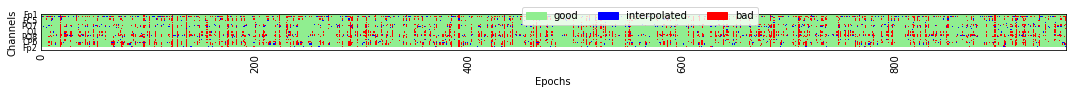

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:02<00:00,   10.87it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:36<00:00,    7.00s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  708.80it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:01,  676.82it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:01,  677.96it/s]

  5%|█                    | Repairing epochs : 46/960 [00:00<00:01,  685.46it/s]

  6%|█▏                   | Repairing epochs : 57/960 [00:00<00:01,  683.16it/s]

  7%|█▌                   | Repairing epochs : 69/960 [00:00<00:01,  690.23it/s]

  8%|█▊                   | Repairing epochs : 80/960 [00:00<00:01,  683.15it/s]

  9%|█▉                   | Repairing epochs : 91/960 [00:00<00:01,  679.75it/s]

 11%|██▏                 | Repairing epochs : 102/960 [00:00<00:01,  678.15it/s]

 12%|██▎        

 36%|███████▏            | Repairing epochs : 346/960 [00:01<00:03,  194.56it/s]

 36%|███████▎            | Repairing epochs : 349/960 [00:01<00:03,  191.82it/s]

 37%|███████▎            | Repairing epochs : 351/960 [00:01<00:03,  188.63it/s]

 37%|███████▍            | Repairing epochs : 354/960 [00:01<00:03,  185.99it/s]

 37%|███████▍            | Repairing epochs : 357/960 [00:01<00:03,  181.21it/s]

 38%|███████▌            | Repairing epochs : 360/960 [00:01<00:03,  181.26it/s]

 38%|███████▌            | Repairing epochs : 363/960 [00:01<00:03,  179.79it/s]

 38%|███████▌            | Repairing epochs : 365/960 [00:01<00:03,  176.50it/s]

 39%|███████▋            | Repairing epochs : 370/960 [00:01<00:03,  181.64it/s]

 39%|███████▊            | Repairing epochs : 372/960 [00:01<00:03,  179.18it/s]

 39%|███████▊            | Repairing epochs : 374/960 [00:02<00:03,  176.77it/s]

 39%|███████▊            | Repairing epochs : 377/960 [00:02<00:03,  176.79it/s]

 39%|███████▉   

 20%|███████                            | Fold : 2/10 [00:03<00:13,    1.63s/it]


 30%|██████████▌                        | Fold : 3/10 [00:04<00:11,    1.60s/it]


 40%|██████████████                     | Fold : 4/10 [00:06<00:09,    1.58s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:07<00:07,    1.57s/it]


 60%|█████████████████████              | Fold : 6/10 [00:09<00:06,    1.57s/it]


 70%|████████████████████████▌          | Fold : 7/10 [00:11<00:04,    1.58s/it]


 80%|████████████████████████████       | Fold : 8/10 [00:12<00:03,    1.58s/it]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:14<00:01,    1.58s/it]


100%|██████████████████████████████████| Fold : 10/10 [00:15<00:00,    1.58s/it]

 33%|██████████▋                     | n_interp : 1/3 [00:21<00:42,   21.35s/it]

  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  232.46it/s]

  1%|▏  

 63%|████████████▌       | Repairing epochs : 602/960 [00:03<00:01,  194.92it/s]

 63%|████████████▌       | Repairing epochs : 604/960 [00:03<00:01,  191.83it/s]

 63%|████████████▋       | Repairing epochs : 608/960 [00:03<00:01,  191.72it/s]

 64%|████████████▋       | Repairing epochs : 611/960 [00:03<00:01,  191.13it/s]

 64%|████████████▊       | Repairing epochs : 614/960 [00:03<00:01,  190.32it/s]

 64%|████████████▊       | Repairing epochs : 617/960 [00:03<00:01,  187.65it/s]

 65%|████████████▉       | Repairing epochs : 621/960 [00:03<00:01,  188.02it/s]

 65%|█████████████       | Repairing epochs : 626/960 [00:03<00:01,  192.25it/s]

 66%|█████████████▏      | Repairing epochs : 630/960 [00:03<00:01,  193.46it/s]

 66%|█████████████▏      | Repairing epochs : 632/960 [00:03<00:01,  190.02it/s]

 66%|█████████████▎      | Repairing epochs : 636/960 [00:03<00:01,  189.31it/s]

 67%|█████████████▎      | Repairing epochs : 639/960 [00:03<00:01,  186.44it/s]

 67%|███████████

 26%|█████▏              | Repairing epochs : 251/960 [00:01<00:04,  162.19it/s]

 26%|█████▎              | Repairing epochs : 254/960 [00:01<00:04,  163.06it/s]

 27%|█████▎              | Repairing epochs : 257/960 [00:01<00:04,  161.58it/s]

 27%|█████▍              | Repairing epochs : 261/960 [00:01<00:04,  164.03it/s]

 27%|█████▍              | Repairing epochs : 263/960 [00:01<00:04,  160.18it/s]

 28%|█████▌              | Repairing epochs : 266/960 [00:01<00:04,  161.25it/s]

 28%|█████▋              | Repairing epochs : 270/960 [00:01<00:04,  161.91it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:01<00:04,  166.98it/s]

 29%|█████▊              | Repairing epochs : 277/960 [00:01<00:04,  164.79it/s]

 29%|█████▊              | Repairing epochs : 281/960 [00:01<00:04,  166.91it/s]

 29%|█████▉              | Repairing epochs : 283/960 [00:01<00:04,  165.03it/s]

 30%|█████▉              | Repairing epochs : 286/960 [00:01<00:04,  164.01it/s]

 30%|██████     

 87%|█████████████████▎  | Repairing epochs : 833/960 [00:05<00:00,  171.93it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:05<00:00,  170.69it/s]

 87%|█████████████████▍  | Repairing epochs : 838/960 [00:05<00:00,  168.42it/s]

 87%|█████████████████▍  | Repairing epochs : 839/960 [00:05<00:00,  161.82it/s]

 88%|█████████████████▌  | Repairing epochs : 841/960 [00:05<00:00,  160.24it/s]

 88%|█████████████████▌  | Repairing epochs : 844/960 [00:05<00:00,  160.84it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:05<00:00,  161.42it/s]

 89%|█████████████████▋  | Repairing epochs : 851/960 [00:05<00:00,  164.73it/s]

 89%|█████████████████▊  | Repairing epochs : 853/960 [00:05<00:00,  162.93it/s]

 89%|█████████████████▊  | Repairing epochs : 856/960 [00:05<00:00,  161.69it/s]

 89%|█████████████████▉  | Repairing epochs : 858/960 [00:05<00:00,  159.19it/s]

 90%|█████████████████▉  | Repairing epochs : 861/960 [00:05<00:00,  157.85it/s]

 90%|███████████





Estimated consensus=0.30 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:03,  242.65it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:04,  210.45it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:05,  186.20it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:04,  196.87it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:04,  205.32it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:04,  207.41it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:04,  201.50it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:04,  199.34it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:04,  207.68it/s]

  4%|▊                    | Repairing epochs : 36/960 [00:00<00:04,  203.14it/s]

  4%|▉                    | Repairing epochs : 40/960 [00:00<00:04,  204.12it/s]

  4%|▉        

 68%|█████████████▌      | Repairing epochs : 650/960 [00:03<00:01,  187.87it/s]

 68%|█████████████▌      | Repairing epochs : 653/960 [00:03<00:01,  184.65it/s]

 68%|█████████████▋      | Repairing epochs : 657/960 [00:03<00:01,  184.24it/s]

 69%|█████████████▊      | Repairing epochs : 660/960 [00:03<00:01,  184.09it/s]

 69%|█████████████▉      | Repairing epochs : 667/960 [00:03<00:01,  192.15it/s]

 70%|█████████████▉      | Repairing epochs : 671/960 [00:03<00:01,  193.01it/s]

 70%|██████████████      | Repairing epochs : 674/960 [00:03<00:01,  192.41it/s]

 71%|██████████████▏     | Repairing epochs : 678/960 [00:03<00:01,  191.77it/s]

 71%|██████████████▏     | Repairing epochs : 681/960 [00:03<00:01,  188.90it/s]

 72%|██████████████▎     | Repairing epochs : 687/960 [00:03<00:01,  194.92it/s]

 72%|██████████████▍     | Repairing epochs : 690/960 [00:03<00:01,  193.59it/s]

 72%|██████████████▍     | Repairing epochs : 693/960 [00:03<00:01,  191.74it/s]

 72%|███████████

Dropped 194 epochs: 13, 15, 21, 35, 42, 43, 65, 67, 70, 75, 90, 100, 102, 106, 115, 118, 122, 124, 128, 136, 137, 141, 145, 150, 151, 154, 155, 165, 168, 187, 190, 197, 200, 201, 203, 205, 214, 215, 218, 220, 234, 236, 238, 239, 250, 254, 260, 262, 265, 269, 276, 282, 283, 289, 292, 306, 308, 309, 311, 321, 325, 327, 340, 351, 353, 365, 370, 373, 376, 377, 380, 381, 384, 387, 388, 390, 398, 405, 418, 427, 438, 442, 444, 446, 454, 455, 459, 461, 468, 469, 470, 471, 474, 475, 478, 490, 494, 526, 528, 529, 536, 537, 538, 551, 552, 554, 557, 558, 568, 585, 589, 592, 597, 603, 612, 616, 620, 621, 625, 630, 632, 636, 638, 642, 649, 653, 654, 659, 667, 673, 676, 677, 680, 682, 689, 692, 693, 696, 697, 704, 710, 712, 721, 734, 740, 741, 742, 743, 746, 748, 751, 761, 764, 765, 772, 777, 780, 786, 791, 792, 799, 808, 811, 822, 824, 831, 838, 839, 840, 842, 849, 852, 853, 857, 859, 860, 861, 865, 868, 878, 890, 896, 908, 912, 917, 934, 935, 936, 937, 942, 945, 957, 958, 959


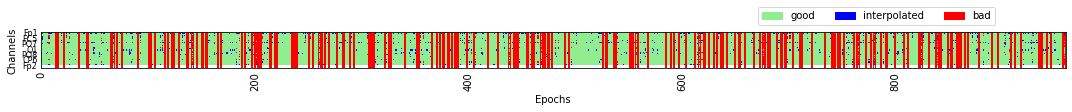

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [02:13<00:00,    4.31s/it]
100%|██████████████| Computing thresholds ... : 31/31 [05:32<00:00,   10.72s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  714.41it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  669.14it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:01,  659.71it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:01,  659.79it/s]

  6%|█▏                   | Repairing epochs : 55/960 [00:00<00:01,  660.57it/s]

  7%|█▍                   | Repairing epochs : 67/960 [00:00<00:01,  672.25it/s]

  8%|█▋                   | Repairing epochs : 79/960 [00:00<00:01,  679.56it/s]

  9%|█▉                   | Repairing epochs : 91/960 [00:00<00:01,  684.13it/s]

 11%|██▏                 | Repairing epochs : 102/960 [00:00<00:01,  684.34it/s]

 12%|██▎        

 38%|███████▋            | Repairing epochs : 369/960 [00:02<00:03,  164.52it/s]

 39%|███████▋            | Repairing epochs : 371/960 [00:02<00:03,  161.79it/s]

 39%|███████▊            | Repairing epochs : 376/960 [00:02<00:03,  166.39it/s]

 40%|███████▉            | Repairing epochs : 381/960 [00:02<00:03,  171.13it/s]

 40%|███████▉            | Repairing epochs : 382/960 [00:02<00:03,  166.72it/s]

 40%|████████            | Repairing epochs : 384/960 [00:02<00:03,  162.89it/s]

 41%|████████▏           | Repairing epochs : 395/960 [00:02<00:03,  178.25it/s]

 42%|████████▍           | Repairing epochs : 404/960 [00:02<00:02,  187.47it/s]

 42%|████████▍           | Repairing epochs : 406/960 [00:02<00:03,  183.38it/s]

 43%|████████▌           | Repairing epochs : 409/960 [00:02<00:03,  181.70it/s]

 43%|████████▋           | Repairing epochs : 415/960 [00:02<00:02,  185.02it/s]

 44%|████████▋           | Repairing epochs : 418/960 [00:02<00:02,  184.65it/s]

 44%|████████▊  

 23%|████▌               | Repairing epochs : 218/960 [00:00<00:02,  310.17it/s]

 23%|████▋               | Repairing epochs : 222/960 [00:00<00:02,  305.81it/s]

 24%|████▋               | Repairing epochs : 227/960 [00:00<00:02,  303.53it/s]

 24%|████▊               | Repairing epochs : 232/960 [00:00<00:02,  301.59it/s]

 24%|████▉               | Repairing epochs : 235/960 [00:00<00:02,  290.91it/s]

 25%|████▉               | Repairing epochs : 237/960 [00:00<00:02,  281.45it/s]

 25%|█████               | Repairing epochs : 241/960 [00:00<00:02,  275.63it/s]

 26%|█████▎              | Repairing epochs : 252/960 [00:00<00:02,  294.89it/s]

 27%|█████▍              | Repairing epochs : 258/960 [00:00<00:02,  295.82it/s]

 28%|█████▌              | Repairing epochs : 266/960 [00:00<00:02,  304.83it/s]

 28%|█████▋              | Repairing epochs : 271/960 [00:00<00:02,  304.27it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:00<00:02,  301.06it/s]

 29%|█████▉     

 23%|████▋               | Repairing epochs : 222/960 [00:00<00:02,  301.05it/s]

 23%|████▋               | Repairing epochs : 224/960 [00:00<00:02,  292.01it/s]

 24%|████▊               | Repairing epochs : 229/960 [00:00<00:02,  292.93it/s]

 24%|████▊               | Repairing epochs : 232/960 [00:00<00:02,  281.48it/s]

 24%|████▊               | Repairing epochs : 233/960 [00:00<00:02,  267.69it/s]

 24%|████▉               | Repairing epochs : 235/960 [00:00<00:02,  257.62it/s]

 25%|████▉               | Repairing epochs : 236/960 [00:00<00:02,  246.43it/s]

 25%|████▉               | Repairing epochs : 238/960 [00:00<00:03,  239.21it/s]

 25%|█████               | Repairing epochs : 241/960 [00:00<00:03,  235.64it/s]

 26%|█████▏              | Repairing epochs : 251/960 [00:00<00:02,  253.83it/s]

 27%|█████▎              | Repairing epochs : 256/960 [00:00<00:02,  256.28it/s]

 27%|█████▍              | Repairing epochs : 262/960 [00:00<00:02,  261.50it/s]

 28%|█████▌     





Estimated consensus=0.50 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  686.69it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  685.08it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:01,  503.51it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:01,  496.06it/s]

  4%|▊                    | Repairing epochs : 38/960 [00:00<00:02,  431.63it/s]

  5%|█                    | Repairing epochs : 46/960 [00:00<00:02,  438.91it/s]

  5%|█                    | Repairing epochs : 49/960 [00:00<00:02,  396.42it/s]

  6%|█▏                   | Repairing epochs : 57/960 [00:00<00:02,  396.07it/s]

  7%|█▍                   | Repairing epochs : 65/960 [00:00<00:02,  406.09it/s]

  7%|█▌                   | Repairing epochs : 70/960 [00:00<00:02,  393.39it/s]

  8%|█▌                   | Repairing epochs : 74/960 [00:00<00:02,  375.38it/s]

  8%|█▋       

Dropped 5 epochs: 35, 344, 673, 775, 862


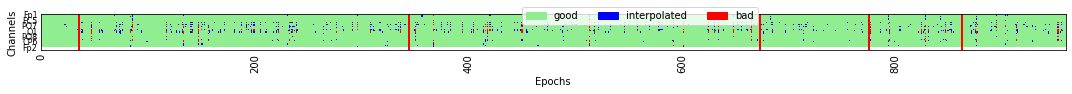

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    9.64it/s]
100%|██████████████| Computing thresholds ... : 31/31 [04:21<00:00,    8.45s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                     | Repairing epochs : 6/960 [00:00<00:03,  267.03it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:09,   99.08it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:13,   72.39it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:07,  124.18it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:10,   93.82it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:10,   89.03it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:10,   86.09it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:09,   94.49it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:12,   77.46it/s]

  2%|▌          

 29%|█████▊              | Repairing epochs : 277/960 [00:08<00:22,   30.41it/s]

 30%|█████▉              | Repairing epochs : 285/960 [00:08<00:17,   38.29it/s]

 30%|█████▉              | Repairing epochs : 286/960 [00:08<00:18,   36.89it/s]

 30%|█████▉              | Repairing epochs : 287/960 [00:08<00:20,   32.37it/s]

 30%|██████              | Repairing epochs : 288/960 [00:09<00:22,   30.51it/s]

 30%|██████              | Repairing epochs : 289/960 [00:09<00:22,   29.57it/s]

 30%|██████              | Repairing epochs : 290/960 [00:09<00:22,   29.37it/s]

 30%|██████              | Repairing epochs : 291/960 [00:09<00:25,   26.55it/s]

 30%|██████              | Repairing epochs : 292/960 [00:09<00:26,   25.52it/s]

 31%|██████              | Repairing epochs : 293/960 [00:09<00:27,   24.39it/s]

 31%|██████▏             | Repairing epochs : 294/960 [00:09<00:27,   24.01it/s]

 31%|██████▏             | Repairing epochs : 295/960 [00:09<00:31,   21.13it/s]

 31%|██████▏    

 58%|███████████▌        | Repairing epochs : 557/960 [00:17<00:18,   21.98it/s]

 58%|███████████▋        | Repairing epochs : 558/960 [00:17<00:18,   21.55it/s]

 58%|███████████▋        | Repairing epochs : 559/960 [00:18<00:20,   19.47it/s]

 58%|███████████▋        | Repairing epochs : 560/960 [00:18<00:20,   19.06it/s]

 58%|███████████▋        | Repairing epochs : 561/960 [00:18<00:22,   17.81it/s]

 59%|███████████▋        | Repairing epochs : 562/960 [00:18<00:22,   18.01it/s]

 59%|███████████▋        | Repairing epochs : 563/960 [00:18<00:22,   17.88it/s]

 59%|███████████▊        | Repairing epochs : 564/960 [00:18<00:22,   17.91it/s]

 59%|███████████▊        | Repairing epochs : 565/960 [00:18<00:21,   18.24it/s]

 59%|███████████▊        | Repairing epochs : 566/960 [00:18<00:21,   18.59it/s]

 59%|███████████▊        | Repairing epochs : 568/960 [00:18<00:19,   20.05it/s]

 59%|███████████▉        | Repairing epochs : 570/960 [00:18<00:18,   21.58it/s]

 60%|███████████

 86%|█████████████████▏  | Repairing epochs : 827/960 [00:25<00:03,   44.11it/s]

 86%|█████████████████▎  | Repairing epochs : 828/960 [00:25<00:03,   42.25it/s]

 86%|█████████████████▎  | Repairing epochs : 829/960 [00:25<00:03,   39.58it/s]

 86%|█████████████████▎  | Repairing epochs : 830/960 [00:25<00:03,   39.00it/s]

 87%|█████████████████▎  | Repairing epochs : 831/960 [00:25<00:03,   35.96it/s]

 87%|█████████████████▍  | Repairing epochs : 834/960 [00:25<00:03,   38.58it/s]

 87%|█████████████████▍  | Repairing epochs : 835/960 [00:25<00:03,   36.32it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:25<00:03,   34.88it/s]

 87%|█████████████████▍  | Repairing epochs : 837/960 [00:25<00:03,   32.83it/s]

 87%|█████████████████▍  | Repairing epochs : 838/960 [00:25<00:03,   32.35it/s]

 87%|█████████████████▍  | Repairing epochs : 839/960 [00:25<00:03,   32.02it/s]

 88%|█████████████████▌  | Repairing epochs : 840/960 [00:25<00:03,   31.62it/s]

 88%|███████████

 28%|█████▌              | Repairing epochs : 267/960 [00:02<00:05,  131.23it/s]

 28%|█████▌              | Repairing epochs : 269/960 [00:02<00:05,  130.64it/s]

 28%|█████▋              | Repairing epochs : 271/960 [00:02<00:05,  129.88it/s]

 28%|█████▋              | Repairing epochs : 273/960 [00:02<00:05,  129.57it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:02<00:05,  128.88it/s]

 29%|█████▊              | Repairing epochs : 278/960 [00:02<00:05,  129.68it/s]

 29%|█████▊              | Repairing epochs : 281/960 [00:02<00:05,  130.40it/s]

 30%|█████▉              | Repairing epochs : 285/960 [00:02<00:05,  134.14it/s]

 30%|██████              | Repairing epochs : 289/960 [00:02<00:04,  139.03it/s]

 30%|██████              | Repairing epochs : 292/960 [00:02<00:04,  139.59it/s]

 31%|██████▏             | Repairing epochs : 294/960 [00:02<00:04,  137.74it/s]

 31%|██████▏             | Repairing epochs : 298/960 [00:02<00:04,  141.84it/s]

 31%|██████▎    

 83%|████████████████▌   | Repairing epochs : 797/960 [00:05<00:01,  150.56it/s]

 83%|████████████████▋   | Repairing epochs : 800/960 [00:05<00:01,  152.02it/s]

 84%|████████████████▋   | Repairing epochs : 802/960 [00:05<00:01,  150.86it/s]

 84%|████████████████▊   | Repairing epochs : 805/960 [00:05<00:01,  151.68it/s]

 84%|████████████████▊   | Repairing epochs : 807/960 [00:05<00:01,  150.49it/s]

 84%|████████████████▉   | Repairing epochs : 810/960 [00:05<00:00,  150.28it/s]

 85%|████████████████▉   | Repairing epochs : 812/960 [00:05<00:00,  148.92it/s]

 85%|████████████████▉   | Repairing epochs : 814/960 [00:05<00:00,  147.66it/s]

 85%|█████████████████   | Repairing epochs : 817/960 [00:05<00:00,  149.00it/s]

 85%|█████████████████   | Repairing epochs : 819/960 [00:05<00:00,  147.64it/s]

 86%|█████████████████▏  | Repairing epochs : 822/960 [00:05<00:00,  149.14it/s]

 86%|█████████████████▏  | Repairing epochs : 825/960 [00:05<00:00,  148.08it/s]

 86%|███████████

 17%|███▍                | Repairing epochs : 166/960 [00:02<00:15,   51.49it/s]

 17%|███▍                | Repairing epochs : 167/960 [00:02<00:15,   51.29it/s]

 18%|███▌                | Repairing epochs : 169/960 [00:02<00:15,   51.36it/s]

 18%|███▌                | Repairing epochs : 170/960 [00:02<00:15,   51.18it/s]

 18%|███▌                | Repairing epochs : 171/960 [00:02<00:15,   50.82it/s]

 18%|███▌                | Repairing epochs : 172/960 [00:02<00:15,   51.16it/s]

 18%|███▌                | Repairing epochs : 173/960 [00:02<00:15,   51.45it/s]

 18%|███▋                | Repairing epochs : 174/960 [00:02<00:15,   51.40it/s]

 18%|███▋                | Repairing epochs : 175/960 [00:02<00:15,   51.30it/s]

 18%|███▋                | Repairing epochs : 177/960 [00:02<00:14,   52.98it/s]

 19%|███▋                | Repairing epochs : 178/960 [00:02<00:15,   51.63it/s]

 19%|███▊                | Repairing epochs : 180/960 [00:02<00:14,   53.88it/s]

 19%|███▊       

 43%|████████▋           | Repairing epochs : 415/960 [00:07<00:10,   53.68it/s]

 43%|████████▋           | Repairing epochs : 416/960 [00:07<00:10,   52.52it/s]

 44%|████████▋           | Repairing epochs : 418/960 [00:07<00:09,   54.70it/s]

 44%|████████▋           | Repairing epochs : 419/960 [00:07<00:10,   52.87it/s]

 44%|████████▊           | Repairing epochs : 420/960 [00:07<00:10,   53.08it/s]

 44%|████████▊           | Repairing epochs : 421/960 [00:07<00:10,   50.62it/s]

 44%|████████▊           | Repairing epochs : 423/960 [00:07<00:10,   50.89it/s]

 44%|████████▊           | Repairing epochs : 424/960 [00:07<00:10,   50.73it/s]

 44%|████████▊           | Repairing epochs : 425/960 [00:07<00:10,   50.94it/s]

 44%|████████▉           | Repairing epochs : 426/960 [00:07<00:10,   51.18it/s]

 44%|████████▉           | Repairing epochs : 427/960 [00:07<00:10,   50.63it/s]

 45%|████████▉           | Repairing epochs : 428/960 [00:07<00:10,   49.21it/s]

 45%|████████▉  

 68%|█████████████▌      | Repairing epochs : 648/960 [00:12<00:06,   49.46it/s]

 68%|█████████████▌      | Repairing epochs : 649/960 [00:12<00:06,   49.43it/s]

 68%|█████████████▌      | Repairing epochs : 650/960 [00:12<00:06,   49.46it/s]

 68%|█████████████▌      | Repairing epochs : 651/960 [00:12<00:06,   49.81it/s]

 68%|█████████████▌      | Repairing epochs : 652/960 [00:12<00:06,   49.55it/s]

 68%|█████████████▌      | Repairing epochs : 653/960 [00:12<00:06,   48.68it/s]

 68%|█████████████▋      | Repairing epochs : 654/960 [00:12<00:06,   48.39it/s]

 68%|█████████████▋      | Repairing epochs : 655/960 [00:12<00:06,   48.10it/s]

 68%|█████████████▋      | Repairing epochs : 656/960 [00:12<00:06,   47.08it/s]

 68%|█████████████▋      | Repairing epochs : 657/960 [00:12<00:06,   46.75it/s]

 69%|█████████████▋      | Repairing epochs : 658/960 [00:12<00:06,   45.32it/s]

 69%|█████████████▋      | Repairing epochs : 659/960 [00:12<00:06,   44.28it/s]

 69%|███████████

 88%|█████████████████▌  | Repairing epochs : 843/960 [00:20<00:03,   33.12it/s]

 88%|█████████████████▌  | Repairing epochs : 844/960 [00:20<00:03,   33.47it/s]

 88%|█████████████████▌  | Repairing epochs : 845/960 [00:20<00:03,   33.37it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:20<00:03,   34.92it/s]

 88%|█████████████████▋  | Repairing epochs : 848/960 [00:20<00:03,   34.22it/s]

 88%|█████████████████▋  | Repairing epochs : 849/960 [00:20<00:03,   33.37it/s]

 89%|█████████████████▋  | Repairing epochs : 850/960 [00:20<00:03,   33.78it/s]

 89%|█████████████████▋  | Repairing epochs : 851/960 [00:20<00:03,   33.90it/s]

 89%|█████████████████▊  | Repairing epochs : 852/960 [00:20<00:03,   33.87it/s]

 89%|█████████████████▊  | Repairing epochs : 853/960 [00:20<00:03,   33.84it/s]

 89%|█████████████████▊  | Repairing epochs : 854/960 [00:20<00:03,   33.39it/s]

 89%|█████████████████▊  | Repairing epochs : 855/960 [00:20<00:03,   33.24it/s]

 89%|███████████

  9%|█▉                   | Repairing epochs : 87/960 [00:01<00:16,   52.52it/s]

  9%|█▉                   | Repairing epochs : 89/960 [00:01<00:15,   54.60it/s]

  9%|█▉                   | Repairing epochs : 90/960 [00:01<00:16,   54.01it/s]

 10%|██                   | Repairing epochs : 92/960 [00:01<00:15,   54.61it/s]

 10%|██                   | Repairing epochs : 93/960 [00:01<00:15,   54.79it/s]

 10%|██                   | Repairing epochs : 94/960 [00:01<00:16,   53.13it/s]

 10%|██                   | Repairing epochs : 97/960 [00:01<00:15,   56.24it/s]

 10%|██▏                  | Repairing epochs : 99/960 [00:01<00:14,   57.74it/s]

 11%|██                  | Repairing epochs : 101/960 [00:01<00:14,   59.02it/s]

 11%|██▏                 | Repairing epochs : 102/960 [00:01<00:14,   58.35it/s]

 11%|██▏                 | Repairing epochs : 103/960 [00:02<00:15,   56.12it/s]

 11%|██▏                 | Repairing epochs : 104/960 [00:02<00:15,   56.31it/s]

 11%|██▎        

 35%|███████             | Repairing epochs : 339/960 [00:06<00:13,   47.68it/s]

 35%|███████             | Repairing epochs : 340/960 [00:06<00:13,   46.97it/s]

 36%|███████             | Repairing epochs : 341/960 [00:07<00:13,   45.87it/s]

 36%|███████▏            | Repairing epochs : 342/960 [00:07<00:13,   46.23it/s]

 36%|███████▏            | Repairing epochs : 344/960 [00:07<00:13,   46.12it/s]

 36%|███████▏            | Repairing epochs : 345/960 [00:07<00:13,   45.22it/s]

 36%|███████▏            | Repairing epochs : 346/960 [00:07<00:13,   45.57it/s]

 36%|███████▏            | Repairing epochs : 347/960 [00:07<00:13,   45.12it/s]

 36%|███████▎            | Repairing epochs : 348/960 [00:07<00:13,   44.93it/s]

 36%|███████▎            | Repairing epochs : 349/960 [00:07<00:13,   45.07it/s]

 36%|███████▎            | Repairing epochs : 350/960 [00:07<00:13,   45.49it/s]

 37%|███████▎            | Repairing epochs : 351/960 [00:07<00:13,   44.66it/s]

 37%|███████▎   

 56%|███████████▏        | Repairing epochs : 538/960 [00:14<00:16,   25.06it/s]

 56%|███████████▏        | Repairing epochs : 539/960 [00:14<00:16,   25.05it/s]

 56%|███████████▎        | Repairing epochs : 540/960 [00:14<00:16,   25.32it/s]

 56%|███████████▎        | Repairing epochs : 541/960 [00:14<00:16,   25.85it/s]

 56%|███████████▎        | Repairing epochs : 542/960 [00:14<00:15,   26.52it/s]

 57%|███████████▎        | Repairing epochs : 544/960 [00:14<00:16,   25.36it/s]

 57%|███████████▎        | Repairing epochs : 545/960 [00:14<00:16,   25.44it/s]

 57%|███████████▍        | Repairing epochs : 546/960 [00:14<00:16,   25.64it/s]

 57%|███████████▍        | Repairing epochs : 547/960 [00:14<00:16,   25.76it/s]

 57%|███████████▍        | Repairing epochs : 548/960 [00:14<00:16,   25.18it/s]

 57%|███████████▍        | Repairing epochs : 549/960 [00:14<00:16,   24.68it/s]

 57%|███████████▍        | Repairing epochs : 550/960 [00:14<00:16,   25.19it/s]

 57%|███████████

 76%|███████████████▎    | Repairing epochs : 733/960 [00:23<00:12,   18.05it/s]

 76%|███████████████▎    | Repairing epochs : 734/960 [00:23<00:12,   18.46it/s]

 77%|███████████████▎    | Repairing epochs : 735/960 [00:23<00:11,   18.97it/s]

 77%|███████████████▎    | Repairing epochs : 736/960 [00:23<00:11,   19.63it/s]

 77%|███████████████▎    | Repairing epochs : 737/960 [00:23<00:11,   19.89it/s]

 77%|███████████████▍    | Repairing epochs : 738/960 [00:23<00:10,   20.36it/s]

 77%|███████████████▍    | Repairing epochs : 739/960 [00:23<00:10,   20.42it/s]

 77%|███████████████▍    | Repairing epochs : 740/960 [00:23<00:10,   20.49it/s]

 77%|███████████████▍    | Repairing epochs : 741/960 [00:23<00:10,   20.87it/s]

 77%|███████████████▍    | Repairing epochs : 742/960 [00:23<00:10,   20.93it/s]

 77%|███████████████▍    | Repairing epochs : 743/960 [00:23<00:10,   20.92it/s]

 78%|███████████████▌    | Repairing epochs : 744/960 [00:23<00:10,   20.63it/s]

 78%|███████████

 97%|███████████████████▍| Repairing epochs : 935/960 [00:29<00:00,   47.27it/s]

 98%|███████████████████▌| Repairing epochs : 936/960 [00:29<00:00,   46.83it/s]

 98%|███████████████████▌| Repairing epochs : 937/960 [00:29<00:00,   46.87it/s]

 98%|███████████████████▌| Repairing epochs : 938/960 [00:29<00:00,   47.16it/s]

 98%|███████████████████▌| Repairing epochs : 939/960 [00:29<00:00,   46.44it/s]

 98%|███████████████████▌| Repairing epochs : 940/960 [00:29<00:00,   46.26it/s]

 98%|███████████████████▋| Repairing epochs : 942/960 [00:29<00:00,   47.87it/s]

 98%|███████████████████▋| Repairing epochs : 943/960 [00:29<00:00,   47.00it/s]

 98%|███████████████████▋| Repairing epochs : 944/960 [00:29<00:00,   44.23it/s]

 98%|███████████████████▋| Repairing epochs : 945/960 [00:29<00:00,   42.01it/s]

 99%|███████████████████▋| Repairing epochs : 946/960 [00:29<00:00,   41.41it/s]

 99%|███████████████████▋| Repairing epochs : 947/960 [00:29<00:00,   41.89it/s]

 99%|███████████





Estimated consensus=0.70 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 2/960 [00:00<00:10,   90.17it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:10,   92.32it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:12,   75.70it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:10,   93.57it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:11,   80.98it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:11,   81.80it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:11,   83.05it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:11,   79.99it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:12,   78.11it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:12,   74.64it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:13,   68.85it/s]

  2%|▍        

 24%|████▊               | Repairing epochs : 230/960 [00:05<00:19,   38.04it/s]

 24%|████▊               | Repairing epochs : 231/960 [00:05<00:19,   37.96it/s]

 24%|████▊               | Repairing epochs : 232/960 [00:05<00:19,   38.04it/s]

 24%|████▊               | Repairing epochs : 233/960 [00:05<00:19,   37.91it/s]

 24%|████▉               | Repairing epochs : 235/960 [00:05<00:18,   39.51it/s]

 25%|████▉               | Repairing epochs : 236/960 [00:05<00:18,   39.52it/s]

 25%|████▉               | Repairing epochs : 237/960 [00:05<00:18,   39.44it/s]

 25%|████▉               | Repairing epochs : 238/960 [00:05<00:18,   39.16it/s]

 25%|████▉               | Repairing epochs : 239/960 [00:05<00:18,   38.90it/s]

 25%|█████               | Repairing epochs : 240/960 [00:05<00:18,   38.62it/s]

 25%|█████               | Repairing epochs : 241/960 [00:05<00:18,   38.57it/s]

 25%|█████               | Repairing epochs : 242/960 [00:05<00:18,   38.20it/s]

 25%|█████      

 46%|█████████▎          | Repairing epochs : 445/960 [00:11<00:24,   20.98it/s]

 46%|█████████▎          | Repairing epochs : 446/960 [00:11<00:24,   21.41it/s]

 47%|█████████▎          | Repairing epochs : 447/960 [00:11<00:23,   21.92it/s]

 47%|█████████▎          | Repairing epochs : 448/960 [00:11<00:23,   21.36it/s]

 47%|█████████▎          | Repairing epochs : 449/960 [00:11<00:23,   21.37it/s]

 47%|█████████▍          | Repairing epochs : 450/960 [00:11<00:23,   21.65it/s]

 47%|█████████▍          | Repairing epochs : 451/960 [00:11<00:23,   21.31it/s]

 47%|█████████▍          | Repairing epochs : 452/960 [00:11<00:23,   21.23it/s]

 47%|█████████▍          | Repairing epochs : 453/960 [00:11<00:23,   21.79it/s]

 47%|█████████▍          | Repairing epochs : 454/960 [00:11<00:23,   21.94it/s]

 47%|█████████▍          | Repairing epochs : 455/960 [00:11<00:22,   22.15it/s]

 48%|█████████▌          | Repairing epochs : 456/960 [00:11<00:22,   22.40it/s]

 48%|█████████▌ 

 69%|█████████████▊      | Repairing epochs : 664/960 [00:17<00:07,   38.11it/s]

 69%|█████████████▊      | Repairing epochs : 665/960 [00:17<00:07,   38.00it/s]

 69%|█████████████▉      | Repairing epochs : 666/960 [00:17<00:07,   37.75it/s]

 69%|█████████████▉      | Repairing epochs : 667/960 [00:17<00:07,   37.45it/s]

 70%|█████████████▉      | Repairing epochs : 668/960 [00:17<00:07,   37.05it/s]

 70%|█████████████▉      | Repairing epochs : 669/960 [00:17<00:07,   37.39it/s]

 70%|█████████████▉      | Repairing epochs : 670/960 [00:17<00:07,   37.66it/s]

 70%|█████████████▉      | Repairing epochs : 671/960 [00:17<00:07,   38.22it/s]

 70%|██████████████      | Repairing epochs : 672/960 [00:17<00:07,   38.07it/s]

 70%|██████████████      | Repairing epochs : 674/960 [00:17<00:07,   39.32it/s]

 70%|██████████████      | Repairing epochs : 676/960 [00:17<00:06,   40.65it/s]

 71%|██████████████      | Repairing epochs : 677/960 [00:17<00:06,   40.87it/s]

 71%|███████████

 92%|██████████████████▌ | Repairing epochs : 888/960 [00:22<00:01,   42.09it/s]

 93%|██████████████████▌ | Repairing epochs : 889/960 [00:22<00:01,   42.01it/s]

 93%|██████████████████▌ | Repairing epochs : 890/960 [00:22<00:01,   41.93it/s]

 93%|██████████████████▌ | Repairing epochs : 891/960 [00:22<00:01,   41.67it/s]

 93%|██████████████████▋ | Repairing epochs : 894/960 [00:22<00:01,   44.80it/s]

 93%|██████████████████▋ | Repairing epochs : 895/960 [00:22<00:01,   43.94it/s]

 93%|██████████████████▋ | Repairing epochs : 896/960 [00:22<00:01,   43.55it/s]

 93%|██████████████████▋ | Repairing epochs : 897/960 [00:22<00:01,   43.14it/s]

 94%|██████████████████▋ | Repairing epochs : 898/960 [00:22<00:01,   43.10it/s]

 94%|██████████████████▊ | Repairing epochs : 900/960 [00:22<00:01,   43.81it/s]

 94%|██████████████████▊ | Repairing epochs : 901/960 [00:22<00:01,   42.95it/s]

 94%|██████████████████▊ | Repairing epochs : 902/960 [00:22<00:01,   42.25it/s]

 94%|███████████

Dropped 1 epoch: 536


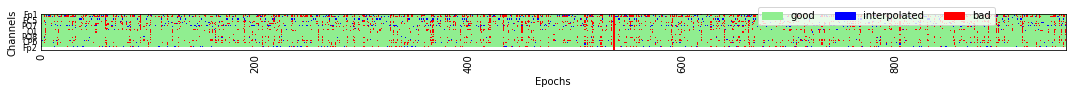

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [01:45<00:00,    3.40s/it]
100%|██████████████| Computing thresholds ... : 31/31 [03:43<00:00,    7.22s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  678.25it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:01,  636.99it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:01,  645.34it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:01,  643.53it/s]

  6%|█▏                   | Repairing epochs : 54/960 [00:00<00:01,  644.73it/s]

  7%|█▍                   | Repairing epochs : 65/960 [00:00<00:01,  652.30it/s]

  8%|█▋                   | Repairing epochs : 77/960 [00:00<00:01,  660.49it/s]

  9%|█▉                   | Repairing epochs : 88/960 [00:00<00:01,  664.02it/s]

 10%|██▏                  | Repairing epochs : 99/960 [00:00<00:01,  665.46it/s]

 11%|██▎        

 28%|█████▋              | Repairing epochs : 273/960 [00:01<00:04,  157.60it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:01<00:04,  156.09it/s]

 29%|█████▊              | Repairing epochs : 279/960 [00:01<00:04,  158.91it/s]

 29%|█████▉              | Repairing epochs : 282/960 [00:01<00:04,  159.61it/s]

 30%|█████▉              | Repairing epochs : 285/960 [00:01<00:04,  158.41it/s]

 30%|██████              | Repairing epochs : 289/960 [00:01<00:04,  159.96it/s]

 30%|██████              | Repairing epochs : 292/960 [00:01<00:04,  159.86it/s]

 31%|██████▏             | Repairing epochs : 295/960 [00:01<00:04,  159.17it/s]

 31%|██████▏             | Repairing epochs : 298/960 [00:01<00:04,  157.98it/s]

 31%|██████▎             | Repairing epochs : 300/960 [00:01<00:04,  156.52it/s]

 31%|██████▎             | Repairing epochs : 302/960 [00:01<00:04,  154.85it/s]

 32%|██████▎             | Repairing epochs : 304/960 [00:01<00:04,  153.51it/s]

 32%|██████▍    

 82%|████████████████▌   | Repairing epochs : 792/960 [00:05<00:01,  151.04it/s]

 83%|████████████████▌   | Repairing epochs : 795/960 [00:05<00:01,  152.17it/s]

 83%|████████████████▋   | Repairing epochs : 798/960 [00:05<00:01,  151.19it/s]

 83%|████████████████▋   | Repairing epochs : 800/960 [00:05<00:01,  148.95it/s]

 84%|████████████████▋   | Repairing epochs : 802/960 [00:05<00:01,  147.84it/s]

 84%|████████████████▊   | Repairing epochs : 805/960 [00:05<00:01,  147.35it/s]

 84%|████████████████▊   | Repairing epochs : 808/960 [00:05<00:01,  146.22it/s]

 84%|████████████████▉   | Repairing epochs : 811/960 [00:05<00:01,  147.57it/s]

 85%|████████████████▉   | Repairing epochs : 814/960 [00:05<00:00,  148.79it/s]

 85%|█████████████████   | Repairing epochs : 816/960 [00:05<00:00,  147.12it/s]

 85%|█████████████████   | Repairing epochs : 818/960 [00:05<00:00,  145.05it/s]

 86%|█████████████████   | Repairing epochs : 821/960 [00:05<00:00,  145.69it/s]

 86%|███████████

 33%|██████▋             | Repairing epochs : 319/960 [00:02<00:04,  150.43it/s]

 34%|██████▋             | Repairing epochs : 322/960 [00:02<00:04,  150.23it/s]

 34%|██████▊             | Repairing epochs : 325/960 [00:02<00:04,  149.51it/s]

 34%|██████▊             | Repairing epochs : 327/960 [00:02<00:04,  148.36it/s]

 34%|██████▉             | Repairing epochs : 330/960 [00:02<00:04,  147.76it/s]

 35%|██████▉             | Repairing epochs : 333/960 [00:02<00:04,  147.20it/s]

 35%|██████▉             | Repairing epochs : 335/960 [00:02<00:04,  146.22it/s]

 35%|███████             | Repairing epochs : 337/960 [00:02<00:04,  145.28it/s]

 36%|███████▏            | Repairing epochs : 343/960 [00:02<00:04,  152.49it/s]

 36%|███████▏            | Repairing epochs : 346/960 [00:02<00:04,  153.38it/s]

 36%|███████▎            | Repairing epochs : 349/960 [00:02<00:03,  154.37it/s]

 37%|███████▎            | Repairing epochs : 352/960 [00:02<00:03,  155.27it/s]

 37%|███████▍   

 86%|█████████████████   | Repairing epochs : 821/960 [00:05<00:00,  142.05it/s]

 86%|█████████████████▏  | Repairing epochs : 823/960 [00:05<00:00,  140.71it/s]

 86%|█████████████████▏  | Repairing epochs : 825/960 [00:05<00:00,  139.81it/s]

 86%|█████████████████▎  | Repairing epochs : 829/960 [00:05<00:00,  143.78it/s]

 87%|█████████████████▎  | Repairing epochs : 832/960 [00:05<00:00,  143.28it/s]

 87%|█████████████████▍  | Repairing epochs : 835/960 [00:05<00:00,  142.90it/s]

 87%|█████████████████▍  | Repairing epochs : 838/960 [00:05<00:00,  142.47it/s]

 88%|█████████████████▌  | Repairing epochs : 841/960 [00:05<00:00,  143.43it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:05<00:00,  151.59it/s]

 88%|█████████████████▋  | Repairing epochs : 849/960 [00:05<00:00,  149.80it/s]

 89%|█████████████████▊  | Repairing epochs : 852/960 [00:05<00:00,  150.54it/s]

 89%|█████████████████▊  | Repairing epochs : 854/960 [00:05<00:00,  149.28it/s]

 89%|███████████

 36%|███████▏            | Repairing epochs : 347/960 [00:02<00:04,  146.04it/s]

 37%|███████▎            | Repairing epochs : 351/960 [00:02<00:04,  148.45it/s]

 37%|███████▎            | Repairing epochs : 353/960 [00:02<00:04,  146.38it/s]

 37%|███████▍            | Repairing epochs : 355/960 [00:02<00:04,  145.09it/s]

 37%|███████▍            | Repairing epochs : 357/960 [00:02<00:04,  143.75it/s]

 37%|███████▍            | Repairing epochs : 359/960 [00:02<00:04,  142.69it/s]

 38%|███████▌            | Repairing epochs : 362/960 [00:02<00:04,  141.32it/s]

 38%|███████▌            | Repairing epochs : 365/960 [00:02<00:04,  140.23it/s]

 38%|███████▋            | Repairing epochs : 366/960 [00:02<00:04,  134.42it/s]

 38%|███████▋            | Repairing epochs : 369/960 [00:02<00:04,  135.99it/s]

 39%|███████▊            | Repairing epochs : 373/960 [00:02<00:04,  139.12it/s]

 39%|███████▊            | Repairing epochs : 376/960 [00:02<00:04,  140.74it/s]

 39%|███████▉   

 89%|█████████████████▊  | Repairing epochs : 852/960 [00:05<00:00,  145.84it/s]

 89%|█████████████████▊  | Repairing epochs : 854/960 [00:05<00:00,  144.07it/s]

 89%|█████████████████▊  | Repairing epochs : 856/960 [00:05<00:00,  142.25it/s]

 89%|█████████████████▉  | Repairing epochs : 859/960 [00:05<00:00,  143.26it/s]

 90%|█████████████████▉  | Repairing epochs : 861/960 [00:05<00:00,  141.38it/s]

 90%|█████████████████▉  | Repairing epochs : 863/960 [00:05<00:00,  139.88it/s]

 90%|██████████████████  | Repairing epochs : 866/960 [00:05<00:00,  140.07it/s]

 91%|██████████████████▏ | Repairing epochs : 870/960 [00:05<00:00,  143.69it/s]

 91%|██████████████████▏ | Repairing epochs : 872/960 [00:06<00:00,  142.53it/s]

 91%|██████████████████▎ | Repairing epochs : 876/960 [00:06<00:00,  145.82it/s]

 91%|██████████████████▎ | Repairing epochs : 878/960 [00:06<00:00,  143.94it/s]

 92%|██████████████████▎ | Repairing epochs : 880/960 [00:06<00:00,  142.03it/s]

 92%|███████████





Estimated consensus=0.50 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 3/960 [00:00<00:06,  137.77it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:07,  130.22it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:07,  126.06it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:07,  130.49it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:07,  129.18it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:06,  137.64it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:06,  137.84it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:06,  134.95it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:06,  150.77it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:05,  174.39it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:05,  170.77it/s]

  4%|▊        

 53%|██████████▋         | Repairing epochs : 512/960 [00:03<00:03,  148.08it/s]

 54%|██████████▊         | Repairing epochs : 518/960 [00:03<00:02,  156.25it/s]

 54%|██████████▊         | Repairing epochs : 521/960 [00:03<00:02,  154.64it/s]

 55%|██████████▉         | Repairing epochs : 524/960 [00:03<00:02,  155.20it/s]

 55%|██████████▉         | Repairing epochs : 526/960 [00:03<00:02,  153.35it/s]

 55%|███████████         | Repairing epochs : 530/960 [00:03<00:02,  156.73it/s]

 56%|███████████         | Repairing epochs : 533/960 [00:03<00:02,  157.84it/s]

 56%|███████████▏        | Repairing epochs : 536/960 [00:03<00:02,  158.85it/s]

 56%|███████████▏        | Repairing epochs : 539/960 [00:03<00:02,  159.71it/s]

 56%|███████████▎        | Repairing epochs : 542/960 [00:03<00:02,  158.50it/s]

 57%|███████████▎        | Repairing epochs : 545/960 [00:03<00:02,  158.40it/s]

 57%|███████████▍        | Repairing epochs : 548/960 [00:03<00:02,  159.35it/s]

 57%|███████████

Dropped 27 epochs: 92, 100, 136, 171, 233, 286, 364, 365, 392, 401, 415, 431, 434, 505, 509, 539, 552, 555, 558, 649, 692, 719, 728, 791, 831, 945, 953


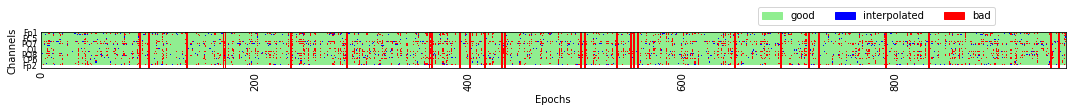

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,   10.08it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:42<00:00,    7.18s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  637.27it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  643.73it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:01,  652.22it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:01,  650.53it/s]

  6%|█▏                   | Repairing epochs : 54/960 [00:00<00:01,  643.36it/s]

  7%|█▍                   | Repairing epochs : 65/960 [00:00<00:01,  646.68it/s]

  8%|█▋                   | Repairing epochs : 76/960 [00:00<00:01,  646.17it/s]

  9%|█▉                   | Repairing epochs : 86/960 [00:00<00:01,  642.47it/s]

 10%|██                   | Repairing epochs : 97/960 [00:00<00:01,  642.81it/s]

 11%|██▎        

 30%|██████              | Repairing epochs : 292/960 [00:01<00:03,  169.00it/s]

 31%|██████▏             | Repairing epochs : 296/960 [00:01<00:03,  171.18it/s]

 31%|██████▏             | Repairing epochs : 299/960 [00:01<00:03,  171.60it/s]

 31%|██████▎             | Repairing epochs : 301/960 [00:01<00:03,  169.04it/s]

 32%|██████▍             | Repairing epochs : 307/960 [00:01<00:03,  175.65it/s]

 32%|██████▌             | Repairing epochs : 312/960 [00:01<00:03,  179.97it/s]

 33%|██████▌             | Repairing epochs : 314/960 [00:01<00:03,  176.85it/s]

 33%|██████▌             | Repairing epochs : 317/960 [00:01<00:03,  176.51it/s]

 34%|██████▋             | Repairing epochs : 322/960 [00:01<00:03,  180.60it/s]

 34%|██████▊             | Repairing epochs : 324/960 [00:01<00:03,  178.02it/s]

 34%|██████▊             | Repairing epochs : 328/960 [00:01<00:03,  178.84it/s]

 34%|██████▉             | Repairing epochs : 331/960 [00:01<00:03,  176.10it/s]

 35%|██████▉    

 93%|██████████████████▌ | Repairing epochs : 889/960 [00:05<00:00,  169.70it/s]

 93%|██████████████████▌ | Repairing epochs : 892/960 [00:05<00:00,  169.32it/s]

 93%|██████████████████▋ | Repairing epochs : 897/960 [00:05<00:00,  173.07it/s]

 94%|██████████████████▋ | Repairing epochs : 899/960 [00:05<00:00,  170.25it/s]

 94%|██████████████████▊ | Repairing epochs : 902/960 [00:05<00:00,  168.51it/s]

 95%|██████████████████▉ | Repairing epochs : 908/960 [00:05<00:00,  174.44it/s]

 95%|██████████████████▉ | Repairing epochs : 911/960 [00:05<00:00,  174.69it/s]

 95%|███████████████████ | Repairing epochs : 914/960 [00:05<00:00,  174.60it/s]

 96%|███████████████████ | Repairing epochs : 917/960 [00:05<00:00,  174.93it/s]

 96%|███████████████████▏| Repairing epochs : 919/960 [00:05<00:00,  172.09it/s]

 96%|███████████████████▎| Repairing epochs : 925/960 [00:05<00:00,  178.06it/s]

 97%|███████████████████▎| Repairing epochs : 927/960 [00:05<00:00,  175.40it/s]

 97%|███████████

 54%|██████████▊         | Repairing epochs : 517/960 [00:02<00:02,  184.62it/s]

 54%|██████████▊         | Repairing epochs : 520/960 [00:02<00:02,  181.21it/s]

 54%|██████████▉         | Repairing epochs : 522/960 [00:02<00:02,  178.44it/s]

 55%|██████████▉         | Repairing epochs : 526/960 [00:02<00:02,  180.01it/s]

 55%|███████████         | Repairing epochs : 529/960 [00:02<00:02,  179.35it/s]

 56%|███████████         | Repairing epochs : 533/960 [00:02<00:02,  181.40it/s]

 56%|███████████▏        | Repairing epochs : 536/960 [00:02<00:02,  181.53it/s]

 56%|███████████▏        | Repairing epochs : 539/960 [00:02<00:02,  181.60it/s]

 57%|███████████▎        | Repairing epochs : 543/960 [00:02<00:02,  183.69it/s]

 57%|███████████▍        | Repairing epochs : 546/960 [00:02<00:02,  182.32it/s]

 57%|███████████▍        | Repairing epochs : 548/960 [00:02<00:02,  178.79it/s]

 57%|███████████▍        | Repairing epochs : 551/960 [00:03<00:02,  176.43it/s]

 58%|███████████

 12%|██▍                 | Repairing epochs : 118/960 [00:00<00:05,  167.98it/s]

 12%|██▌                 | Repairing epochs : 120/960 [00:00<00:05,  165.05it/s]

 13%|██▌                 | Repairing epochs : 123/960 [00:00<00:05,  165.88it/s]

 13%|██▋                 | Repairing epochs : 128/960 [00:00<00:04,  170.31it/s]

 14%|██▋                 | Repairing epochs : 130/960 [00:00<00:04,  167.10it/s]

 14%|██▊                 | Repairing epochs : 133/960 [00:00<00:04,  167.56it/s]

 14%|██▊                 | Repairing epochs : 136/960 [00:00<00:04,  165.72it/s]

 14%|██▉                 | Repairing epochs : 138/960 [00:00<00:05,  162.41it/s]

 15%|██▉                 | Repairing epochs : 143/960 [00:00<00:04,  166.89it/s]

 16%|███▏                | Repairing epochs : 150/960 [00:00<00:04,  178.97it/s]

 16%|███▏                | Repairing epochs : 153/960 [00:00<00:04,  178.75it/s]

 16%|███▎                | Repairing epochs : 156/960 [00:00<00:04,  178.52it/s]

 17%|███▎       

 73%|██████████████▌     | Repairing epochs : 700/960 [00:04<00:01,  158.31it/s]

 74%|██████████████▋     | Repairing epochs : 707/960 [00:04<00:01,  167.63it/s]

 74%|██████████████▊     | Repairing epochs : 709/960 [00:04<00:01,  165.50it/s]

 74%|██████████████▊     | Repairing epochs : 712/960 [00:04<00:01,  164.06it/s]

 74%|██████████████▉     | Repairing epochs : 715/960 [00:04<00:01,  162.60it/s]

 75%|██████████████▉     | Repairing epochs : 718/960 [00:04<00:01,  161.96it/s]

 75%|███████████████     | Repairing epochs : 723/960 [00:04<00:01,  167.40it/s]

 76%|███████████████     | Repairing epochs : 725/960 [00:04<00:01,  164.99it/s]

 76%|███████████████▏    | Repairing epochs : 727/960 [00:04<00:01,  162.98it/s]

 76%|███████████████▏    | Repairing epochs : 730/960 [00:04<00:01,  161.55it/s]

 76%|███████████████▎    | Repairing epochs : 733/960 [00:04<00:01,  161.57it/s]

 77%|███████████████▎    | Repairing epochs : 736/960 [00:04<00:01,  160.55it/s]

 77%|███████████





Estimated consensus=0.70 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:03,  273.18it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:04,  223.82it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:05,  187.99it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:04,  208.24it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:04,  211.05it/s]

  3%|▌                    | Repairing epochs : 26/960 [00:00<00:04,  227.36it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:04,  212.22it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:04,  212.44it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:04,  209.21it/s]

  4%|▊                    | Repairing epochs : 37/960 [00:00<00:04,  198.56it/s]

  4%|▉                    | Repairing epochs : 41/960 [00:00<00:04,  197.89it/s]

  5%|▉        

 65%|█████████████       | Repairing epochs : 624/960 [00:03<00:01,  178.70it/s]

 65%|█████████████       | Repairing epochs : 626/960 [00:03<00:01,  175.73it/s]

 66%|█████████████       | Repairing epochs : 629/960 [00:03<00:01,  174.06it/s]

 66%|█████████████▏      | Repairing epochs : 632/960 [00:03<00:01,  174.06it/s]

 66%|█████████████▏      | Repairing epochs : 635/960 [00:03<00:01,  174.19it/s]

 66%|█████████████▎      | Repairing epochs : 637/960 [00:03<00:01,  171.57it/s]

 67%|█████████████▎      | Repairing epochs : 640/960 [00:03<00:01,  170.94it/s]

 67%|█████████████▍      | Repairing epochs : 642/960 [00:03<00:01,  168.76it/s]

 67%|█████████████▍      | Repairing epochs : 645/960 [00:03<00:01,  167.83it/s]

 68%|█████████████▌      | Repairing epochs : 648/960 [00:03<00:01,  168.26it/s]

 68%|█████████████▌      | Repairing epochs : 650/960 [00:03<00:01,  165.68it/s]

 68%|█████████████▋      | Repairing epochs : 654/960 [00:03<00:01,  168.01it/s]

 69%|███████████

Dropped 18 epochs: 46, 76, 111, 117, 139, 160, 235, 358, 393, 451, 507, 508, 519, 623, 628, 641, 717, 918


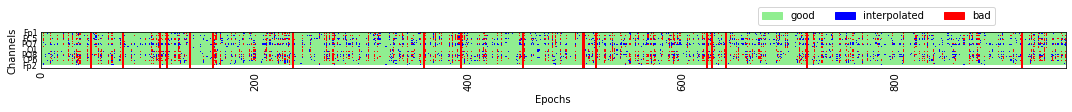

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    8.44it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:36<00:00,    6.99s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  672.94it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  677.94it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:01,  655.19it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:01,  656.48it/s]

  5%|█▏                   | Repairing epochs : 52/960 [00:00<00:01,  631.91it/s]

  6%|█▎                   | Repairing epochs : 62/960 [00:00<00:01,  619.29it/s]

  8%|█▌                   | Repairing epochs : 73/960 [00:00<00:01,  624.32it/s]

  9%|█▊                   | Repairing epochs : 83/960 [00:00<00:01,  618.72it/s]

 10%|██                   | Repairing epochs : 93/960 [00:00<00:01,  614.05it/s]

 11%|██▏        

 34%|██████▊             | Repairing epochs : 328/960 [00:01<00:03,  190.24it/s]

 34%|██████▉             | Repairing epochs : 331/960 [00:01<00:03,  188.67it/s]

 35%|███████             | Repairing epochs : 336/960 [00:01<00:03,  191.45it/s]

 35%|███████             | Repairing epochs : 338/960 [00:01<00:03,  188.29it/s]

 36%|███████             | Repairing epochs : 341/960 [00:01<00:03,  187.38it/s]

 36%|███████▏            | Repairing epochs : 344/960 [00:01<00:03,  186.08it/s]

 36%|███████▏            | Repairing epochs : 347/960 [00:01<00:03,  185.16it/s]

 37%|███████▎            | Repairing epochs : 352/960 [00:01<00:03,  190.65it/s]

 37%|███████▍            | Repairing epochs : 357/960 [00:01<00:03,  195.36it/s]

 38%|███████▌            | Repairing epochs : 365/960 [00:01<00:02,  207.91it/s]

 38%|███████▋            | Repairing epochs : 367/960 [00:01<00:02,  203.08it/s]

 39%|███████▋            | Repairing epochs : 371/960 [00:01<00:02,  205.12it/s]

 39%|███████▊   

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:06,  137.53it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:06,  140.06it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:06,  147.08it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:05,  173.02it/s]

  2%|▌                    | Repairing epochs : 24/960 [00:00<00:05,  182.98it/s]

  3%|▌                    | Repairing epochs : 27/960 [00:00<00:05,  181.66it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:04,  199.46it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:03,  244.54it/s]

  5%|█                    | Repairing epochs : 47/960 [00:00<00:03,  237.38it/s]

  5%|█                    | Repairing epochs : 50/960 [00:00<00:04,  224.68it/s]

  6%|█▏                   | Repairing epochs : 55/960 [00:00<00:03,  226.75it/s]

  6%|█▎                   | Repairing epochs : 59/960 [00:00<00:03,  226.23it/s]

  7%|█▍         

 72%|██████████████▌     | Repairing epochs : 696/960 [00:03<00:01,  212.71it/s]

 73%|██████████████▋     | Repairing epochs : 703/960 [00:03<00:01,  218.77it/s]

 73%|██████████████▋     | Repairing epochs : 705/960 [00:03<00:01,  213.33it/s]

 74%|██████████████▊     | Repairing epochs : 710/960 [00:03<00:01,  214.61it/s]

 74%|██████████████▊     | Repairing epochs : 712/960 [00:03<00:01,  209.74it/s]

 74%|██████████████▉     | Repairing epochs : 715/960 [00:03<00:01,  207.49it/s]

 75%|███████████████     | Repairing epochs : 721/960 [00:03<00:01,  213.93it/s]

 75%|███████████████     | Repairing epochs : 724/960 [00:03<00:01,  209.63it/s]

 76%|███████████████▏    | Repairing epochs : 726/960 [00:03<00:01,  205.13it/s]

 76%|███████████████▏    | Repairing epochs : 730/960 [00:03<00:01,  205.47it/s]

 76%|███████████████▎    | Repairing epochs : 732/960 [00:03<00:01,  201.83it/s]

 77%|███████████████▍    | Repairing epochs : 738/960 [00:03<00:01,  205.61it/s]

 77%|███████████

 36%|███████▏            | Repairing epochs : 345/960 [00:01<00:03,  166.48it/s]

 36%|███████▎            | Repairing epochs : 348/960 [00:01<00:03,  165.78it/s]

 37%|███████▍            | Repairing epochs : 354/960 [00:01<00:03,  174.08it/s]

 38%|███████▌            | Repairing epochs : 365/960 [00:02<00:03,  185.95it/s]

 38%|███████▋            | Repairing epochs : 369/960 [00:02<00:03,  188.01it/s]

 39%|███████▊            | Repairing epochs : 372/960 [00:02<00:03,  187.51it/s]

 39%|███████▊            | Repairing epochs : 377/960 [00:02<00:03,  190.55it/s]

 40%|███████▉            | Repairing epochs : 381/960 [00:02<00:03,  188.75it/s]

 40%|████████            | Repairing epochs : 384/960 [00:02<00:03,  188.40it/s]

 40%|████████            | Repairing epochs : 388/960 [00:02<00:03,  189.33it/s]

 41%|████████▏           | Repairing epochs : 390/960 [00:02<00:03,  184.92it/s]

 41%|████████▏           | Repairing epochs : 393/960 [00:02<00:03,  183.93it/s]

 41%|████████▎  





Estimated consensus=0.50 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 2/960 [00:00<00:07,  122.69it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:07,  134.54it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:06,  139.03it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:07,  132.82it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:06,  141.11it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:06,  152.93it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:05,  163.82it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:05,  173.05it/s]

  3%|▋                    | Repairing epochs : 30/960 [00:00<00:04,  189.13it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:05,  185.07it/s]

  4%|▉                    | Repairing epochs : 43/960 [00:00<00:03,  229.54it/s]

  5%|█        

 72%|██████████████▎     | Repairing epochs : 687/960 [00:03<00:01,  204.67it/s]

 72%|██████████████▍     | Repairing epochs : 694/960 [00:03<00:01,  213.68it/s]

 72%|██████████████▌     | Repairing epochs : 696/960 [00:03<00:01,  208.90it/s]

 73%|██████████████▋     | Repairing epochs : 702/960 [00:03<00:01,  215.43it/s]

 73%|██████████████▋     | Repairing epochs : 704/960 [00:03<00:01,  211.12it/s]

 74%|██████████████▊     | Repairing epochs : 708/960 [00:03<00:01,  211.07it/s]

 74%|██████████████▊     | Repairing epochs : 711/960 [00:03<00:01,  208.86it/s]

 74%|██████████████▉     | Repairing epochs : 714/960 [00:03<00:01,  207.31it/s]

 75%|███████████████     | Repairing epochs : 721/960 [00:03<00:01,  214.13it/s]

 75%|███████████████     | Repairing epochs : 723/960 [00:03<00:01,  210.11it/s]

 76%|███████████████     | Repairing epochs : 725/960 [00:03<00:01,  206.14it/s]

 76%|███████████████▏    | Repairing epochs : 727/960 [00:03<00:01,  202.53it/s]

 76%|███████████

Dropped 177 epochs: 2, 4, 5, 6, 7, 8, 10, 23, 43, 47, 56, 59, 62, 80, 82, 86, 87, 127, 136, 140, 141, 142, 143, 144, 151, 158, 159, 160, 161, 162, 163, 164, 166, 177, 181, 212, 213, 215, 216, 217, 219, 225, 232, 235, 236, 241, 242, 245, 246, 248, 257, 263, 278, 297, 299, 317, 319, 320, 321, 322, 325, 328, 330, 336, 340, 364, 365, 380, 381, 389, 396, 400, 401, 402, 403, 407, 410, 419, 454, 460, 465, 479, 480, 481, 482, 483, 485, 487, 503, 504, 505, 525, 530, 540, 543, 550, 551, 560, 561, 562, 563, 564, 565, 566, 568, 569, 582, 590, 599, 607, 609, 619, 620, 621, 629, 640, 641, 642, 643, 644, 645, 646, 649, 681, 686, 695, 714, 720, 721, 722, 723, 724, 725, 741, 745, 781, 783, 784, 785, 787, 798, 800, 801, 802, 803, 805, 807, 808, 810, 813, 823, 829, 832, 837, 852, 863, 864, 866, 875, 880, 881, 882, 883, 885, 886, 887, 888, 890, 895, 898, 901, 925, 935, 937, 943, 957, 959


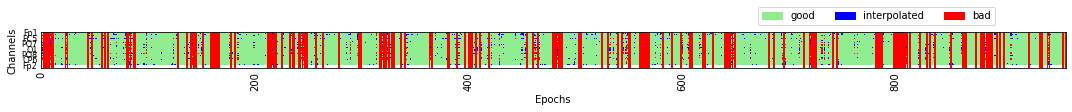

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    8.90it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:38<00:00,    7.06s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  694.73it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:01,  672.55it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:01,  669.64it/s]

  5%|▉                    | Repairing epochs : 45/960 [00:00<00:01,  663.35it/s]

  6%|█▏                   | Repairing epochs : 57/960 [00:00<00:01,  671.93it/s]

  7%|█▍                   | Repairing epochs : 68/960 [00:00<00:01,  673.84it/s]

  8%|█▋                   | Repairing epochs : 79/960 [00:00<00:01,  673.52it/s]

  9%|█▉                   | Repairing epochs : 90/960 [00:00<00:01,  673.78it/s]

 11%|██                  | Repairing epochs : 101/960 [00:00<00:01,  670.92it/s]

 12%|██▎        

 31%|██████▏             | Repairing epochs : 296/960 [00:01<00:03,  169.88it/s]

 31%|██████▎             | Repairing epochs : 300/960 [00:01<00:03,  171.51it/s]

 32%|██████▎             | Repairing epochs : 304/960 [00:01<00:03,  173.30it/s]

 32%|██████▍             | Repairing epochs : 307/960 [00:01<00:03,  173.39it/s]

 32%|██████▍             | Repairing epochs : 310/960 [00:01<00:03,  172.81it/s]

 33%|██████▌             | Repairing epochs : 313/960 [00:01<00:03,  173.25it/s]

 33%|██████▌             | Repairing epochs : 316/960 [00:01<00:03,  172.76it/s]

 33%|██████▋             | Repairing epochs : 318/960 [00:01<00:03,  170.22it/s]

 33%|██████▋             | Repairing epochs : 321/960 [00:01<00:03,  170.48it/s]

 34%|██████▊             | Repairing epochs : 324/960 [00:01<00:03,  168.79it/s]

 34%|██████▊             | Repairing epochs : 326/960 [00:01<00:03,  166.62it/s]

 35%|██████▉             | Repairing epochs : 332/960 [00:01<00:03,  174.02it/s]

 35%|███████    

 92%|██████████████████▍ | Repairing epochs : 882/960 [00:05<00:00,  174.00it/s]

 92%|██████████████████▍ | Repairing epochs : 885/960 [00:05<00:00,  173.87it/s]

 92%|██████████████████▌ | Repairing epochs : 888/960 [00:05<00:00,  174.06it/s]

 93%|██████████████████▌ | Repairing epochs : 891/960 [00:05<00:00,  174.24it/s]

 93%|██████████████████▋ | Repairing epochs : 895/960 [00:05<00:00,  176.63it/s]

 94%|██████████████████▋ | Repairing epochs : 898/960 [00:05<00:00,  176.93it/s]

 94%|██████████████████▊ | Repairing epochs : 901/960 [00:05<00:00,  175.00it/s]

 94%|██████████████████▊ | Repairing epochs : 904/960 [00:05<00:00,  173.21it/s]

 94%|██████████████████▉ | Repairing epochs : 907/960 [00:05<00:00,  170.88it/s]

 95%|██████████████████▉ | Repairing epochs : 911/960 [00:05<00:00,  173.37it/s]

 95%|███████████████████ | Repairing epochs : 915/960 [00:05<00:00,  174.99it/s]

 96%|███████████████████▏| Repairing epochs : 918/960 [00:05<00:00,  175.37it/s]

 96%|███████████

 49%|█████████▋          | Repairing epochs : 466/960 [00:02<00:02,  172.64it/s]

 49%|█████████▊          | Repairing epochs : 469/960 [00:02<00:02,  170.83it/s]

 49%|█████████▉          | Repairing epochs : 474/960 [00:02<00:02,  174.52it/s]

 50%|█████████▉          | Repairing epochs : 476/960 [00:02<00:02,  172.33it/s]

 50%|█████████▉          | Repairing epochs : 478/960 [00:02<00:02,  169.84it/s]

 50%|██████████          | Repairing epochs : 482/960 [00:02<00:02,  171.99it/s]

 51%|██████████▏         | Repairing epochs : 486/960 [00:02<00:02,  173.74it/s]

 51%|██████████▏         | Repairing epochs : 489/960 [00:02<00:02,  173.76it/s]

 51%|██████████▎         | Repairing epochs : 494/960 [00:02<00:02,  177.79it/s]

 52%|██████████▍         | Repairing epochs : 498/960 [00:02<00:02,  180.12it/s]

 52%|██████████▍         | Repairing epochs : 502/960 [00:02<00:02,  182.25it/s]

 53%|██████████▌         | Repairing epochs : 505/960 [00:02<00:02,  181.44it/s]

 53%|██████████▌

  4%|▊                    | Repairing epochs : 37/960 [00:00<00:05,  161.94it/s]

  4%|▉                    | Repairing epochs : 40/960 [00:00<00:05,  163.12it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:05,  168.69it/s]

  5%|█                    | Repairing epochs : 48/960 [00:00<00:05,  172.88it/s]

  5%|█                    | Repairing epochs : 51/960 [00:00<00:05,  173.05it/s]

  6%|█▏                   | Repairing epochs : 54/960 [00:00<00:05,  173.36it/s]

  6%|█▏                   | Repairing epochs : 57/960 [00:00<00:05,  174.07it/s]

  6%|█▎                   | Repairing epochs : 61/960 [00:00<00:05,  177.72it/s]

  7%|█▍                   | Repairing epochs : 65/960 [00:00<00:04,  180.95it/s]

  7%|█▍                   | Repairing epochs : 67/960 [00:00<00:05,  177.14it/s]

  7%|█▌                   | Repairing epochs : 70/960 [00:00<00:05,  171.76it/s]

  8%|█▌                   | Repairing epochs : 73/960 [00:00<00:05,  171.82it/s]

  8%|█▋         

 63%|████████████▌       | Repairing epochs : 604/960 [00:03<00:02,  156.89it/s]

 63%|████████████▋       | Repairing epochs : 607/960 [00:03<00:02,  157.53it/s]

 64%|████████████▋       | Repairing epochs : 610/960 [00:03<00:02,  158.46it/s]

 64%|████████████▊       | Repairing epochs : 613/960 [00:03<00:02,  157.94it/s]

 64%|████████████▊       | Repairing epochs : 616/960 [00:03<00:02,  158.60it/s]

 65%|████████████▉       | Repairing epochs : 620/960 [00:03<00:02,  161.40it/s]

 65%|████████████▉       | Repairing epochs : 623/960 [00:03<00:02,  162.14it/s]

 65%|█████████████       | Repairing epochs : 625/960 [00:03<00:02,  160.31it/s]

 65%|█████████████       | Repairing epochs : 628/960 [00:03<00:02,  159.58it/s]

 66%|█████████████▏      | Repairing epochs : 633/960 [00:03<00:01,  164.23it/s]

 66%|█████████████▏      | Repairing epochs : 635/960 [00:03<00:02,  161.68it/s]

 66%|█████████████▎      | Repairing epochs : 637/960 [00:03<00:02,  159.10it/s]

 67%|███████████





Estimated consensus=0.30 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:03,  248.29it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:04,  232.13it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:04,  194.33it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:05,  186.70it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:05,  175.44it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:05,  175.47it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:05,  175.58it/s]

  3%|▌                    | Repairing epochs : 26/960 [00:00<00:05,  175.77it/s]

  3%|▋                    | Repairing epochs : 29/960 [00:00<00:05,  174.53it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:05,  168.54it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:05,  163.98it/s]

  4%|▊        

 62%|████████████▎       | Repairing epochs : 593/960 [00:03<00:02,  160.93it/s]

 62%|████████████▍       | Repairing epochs : 596/960 [00:03<00:02,  161.50it/s]

 62%|████████████▌       | Repairing epochs : 600/960 [00:03<00:02,  163.75it/s]

 63%|████████████▌       | Repairing epochs : 602/960 [00:03<00:02,  161.74it/s]

 63%|████████████▌       | Repairing epochs : 605/960 [00:03<00:02,  161.96it/s]

 63%|████████████▋       | Repairing epochs : 609/960 [00:03<00:02,  164.11it/s]

 64%|████████████▊       | Repairing epochs : 612/960 [00:03<00:02,  165.08it/s]

 64%|████████████▊       | Repairing epochs : 615/960 [00:03<00:02,  165.48it/s]

 64%|████████████▉       | Repairing epochs : 619/960 [00:03<00:02,  168.69it/s]

 65%|████████████▉       | Repairing epochs : 621/960 [00:03<00:02,  166.48it/s]

 65%|█████████████       | Repairing epochs : 624/960 [00:03<00:02,  166.93it/s]

 65%|█████████████       | Repairing epochs : 626/960 [00:03<00:02,  164.66it/s]

 66%|███████████

Dropped 114 epochs: 15, 18, 21, 30, 32, 37, 42, 44, 69, 76, 82, 101, 118, 125, 133, 141, 155, 171, 185, 187, 188, 205, 220, 226, 228, 233, 267, 275, 285, 291, 299, 304, 307, 309, 324, 335, 343, 345, 347, 360, 372, 390, 394, 402, 413, 425, 437, 441, 442, 469, 474, 484, 488, 491, 517, 521, 523, 536, 542, 544, 550, 556, 558, 563, 571, 575, 576, 591, 593, 594, 611, 612, 615, 636, 638, 654, 659, 661, 666, 668, 693, 698, 705, 724, 733, 746, 754, 759, 760, 766, 768, 772, 781, 786, 814, 817, 829, 831, 839, 849, 858, 868, 879, 902, 903, 904, 910, 916, 920, 932, 934, 944, 949, 954


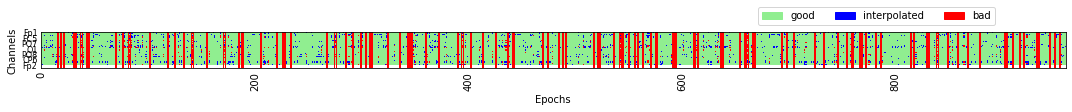

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    9.64it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:38<00:00,    7.06s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  740.75it/s]

  2%|▌                    | Repairing epochs : 24/960 [00:00<00:01,  732.51it/s]

  4%|▊                    | Repairing epochs : 36/960 [00:00<00:01,  732.81it/s]

  5%|█                    | Repairing epochs : 48/960 [00:00<00:01,  729.50it/s]

  6%|█▎                   | Repairing epochs : 60/960 [00:00<00:01,  728.03it/s]

  8%|█▌                   | Repairing epochs : 72/960 [00:00<00:01,  729.60it/s]

  9%|█▊                   | Repairing epochs : 84/960 [00:00<00:01,  727.77it/s]

 10%|██                   | Repairing epochs : 96/960 [00:00<00:01,  724.84it/s]

 11%|██▎                 | Repairing epochs : 108/960 [00:00<00:01,  725.68it/s]

 12%|██▌        

 35%|███████             | Repairing epochs : 336/960 [00:01<00:03,  186.22it/s]

 36%|███████             | Repairing epochs : 341/960 [00:01<00:03,  190.66it/s]

 36%|███████▏            | Repairing epochs : 344/960 [00:01<00:03,  188.40it/s]

 36%|███████▏            | Repairing epochs : 347/960 [00:01<00:03,  186.44it/s]

 36%|███████▎            | Repairing epochs : 350/960 [00:01<00:03,  186.11it/s]

 37%|███████▎            | Repairing epochs : 353/960 [00:01<00:03,  184.54it/s]

 37%|███████▍            | Repairing epochs : 355/960 [00:01<00:03,  179.91it/s]

 37%|███████▍            | Repairing epochs : 358/960 [00:02<00:03,  179.89it/s]

 38%|███████▌            | Repairing epochs : 361/960 [00:02<00:03,  177.97it/s]

 38%|███████▌            | Repairing epochs : 365/960 [00:02<00:03,  180.41it/s]

 39%|███████▊            | Repairing epochs : 372/960 [00:02<00:03,  188.96it/s]

 39%|███████▊            | Repairing epochs : 376/960 [00:02<00:03,  189.02it/s]

 40%|███████▉   

 40%|██████████████                     | Fold : 4/10 [00:06<00:09,    1.64s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:08<00:08,    1.63s/it]


 60%|█████████████████████              | Fold : 6/10 [00:09<00:06,    1.62s/it]


 70%|████████████████████████▌          | Fold : 7/10 [00:11<00:04,    1.61s/it]


 80%|████████████████████████████       | Fold : 8/10 [00:12<00:03,    1.61s/it]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:14<00:01,    1.60s/it]


100%|██████████████████████████████████| Fold : 10/10 [00:16<00:00,    1.61s/it]

 33%|██████████▋                     | n_interp : 1/3 [00:21<00:43,   21.73s/it]

  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 3/960 [00:00<00:05,  161.46it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:07,  122.60it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:07,  127.28it/s]

  1%|▏    

 64%|████████████▉       | Repairing epochs : 618/960 [00:03<00:01,  177.46it/s]

 65%|████████████▉       | Repairing epochs : 621/960 [00:03<00:01,  175.74it/s]

 65%|█████████████       | Repairing epochs : 624/960 [00:03<00:01,  174.26it/s]

 65%|█████████████       | Repairing epochs : 627/960 [00:03<00:01,  172.57it/s]

 66%|█████████████▏      | Repairing epochs : 630/960 [00:03<00:01,  170.70it/s]

 66%|█████████████▏      | Repairing epochs : 632/960 [00:03<00:01,  168.61it/s]

 66%|█████████████▏      | Repairing epochs : 635/960 [00:03<00:01,  168.97it/s]

 67%|█████████████▎      | Repairing epochs : 639/960 [00:03<00:01,  171.49it/s]

 67%|█████████████▍      | Repairing epochs : 645/960 [00:03<00:01,  177.87it/s]

 67%|█████████████▍      | Repairing epochs : 647/960 [00:03<00:01,  175.53it/s]

 68%|█████████████▌      | Repairing epochs : 651/960 [00:03<00:01,  177.65it/s]

 68%|█████████████▋      | Repairing epochs : 656/960 [00:03<00:01,  181.79it/s]

 69%|███████████

 18%|███▋                | Repairing epochs : 175/960 [00:00<00:03,  196.55it/s]

 19%|███▋                | Repairing epochs : 179/960 [00:00<00:03,  196.03it/s]

 19%|███▊                | Repairing epochs : 182/960 [00:01<00:04,  193.79it/s]

 19%|███▊                | Repairing epochs : 185/960 [00:01<00:04,  190.90it/s]

 20%|███▉                | Repairing epochs : 188/960 [00:01<00:04,  188.56it/s]

 20%|███▉                | Repairing epochs : 191/960 [00:01<00:04,  185.89it/s]

 20%|████                | Repairing epochs : 194/960 [00:01<00:04,  184.36it/s]

 21%|████                | Repairing epochs : 197/960 [00:01<00:04,  182.85it/s]

 21%|████▏               | Repairing epochs : 200/960 [00:01<00:04,  174.43it/s]

 21%|████▏               | Repairing epochs : 203/960 [00:01<00:04,  174.54it/s]

 22%|████▎               | Repairing epochs : 208/960 [00:01<00:04,  178.28it/s]

 22%|████▍               | Repairing epochs : 213/960 [00:01<00:04,  182.31it/s]

 23%|████▌      

 86%|█████████████████   | Repairing epochs : 821/960 [00:04<00:00,  181.76it/s]

 86%|█████████████████▏  | Repairing epochs : 824/960 [00:04<00:00,  179.88it/s]

 86%|█████████████████▏  | Repairing epochs : 827/960 [00:04<00:00,  177.81it/s]

 86%|█████████████████▎  | Repairing epochs : 830/960 [00:04<00:00,  177.50it/s]

 87%|█████████████████▎  | Repairing epochs : 833/960 [00:04<00:00,  176.59it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:04<00:00,  175.60it/s]

 88%|█████████████████▌  | Repairing epochs : 841/960 [00:04<00:00,  181.05it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:04<00:00,  187.96it/s]

 89%|█████████████████▋  | Repairing epochs : 851/960 [00:04<00:00,  189.85it/s]

 89%|█████████████████▊  | Repairing epochs : 856/960 [00:04<00:00,  194.18it/s]

 89%|█████████████████▉  | Repairing epochs : 859/960 [00:04<00:00,  191.79it/s]

 90%|█████████████████▉  | Repairing epochs : 863/960 [00:04<00:00,  192.25it/s]

 90%|███████████





Estimated consensus=0.40 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  197.62it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:05,  173.00it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:05,  165.26it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:05,  161.80it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:05,  161.38it/s]

  2%|▍                    | Repairing epochs : 19/960 [00:00<00:05,  159.54it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:05,  159.16it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:05,  158.19it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:05,  157.75it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:05,  157.03it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:05,  162.55it/s]

  4%|▊        

 72%|██████████████▎     | Repairing epochs : 687/960 [00:03<00:01,  196.12it/s]

 72%|██████████████▍     | Repairing epochs : 691/960 [00:03<00:01,  195.93it/s]

 72%|██████████████▌     | Repairing epochs : 696/960 [00:03<00:01,  198.43it/s]

 73%|██████████████▌     | Repairing epochs : 701/960 [00:03<00:01,  202.99it/s]

 73%|██████████████▋     | Repairing epochs : 705/960 [00:03<00:01,  204.52it/s]

 74%|██████████████▊     | Repairing epochs : 708/960 [00:03<00:01,  202.61it/s]

 74%|██████████████▊     | Repairing epochs : 711/960 [00:03<00:01,  198.86it/s]

 75%|██████████████▉     | Repairing epochs : 716/960 [00:03<00:01,  203.06it/s]

 75%|███████████████     | Repairing epochs : 720/960 [00:03<00:01,  204.65it/s]

 76%|███████████████     | Repairing epochs : 725/960 [00:03<00:01,  206.59it/s]

 76%|███████████████▏    | Repairing epochs : 728/960 [00:03<00:01,  203.90it/s]

 76%|███████████████▎    | Repairing epochs : 732/960 [00:03<00:01,  205.56it/s]

 77%|███████████

Dropped 42 epochs: 11, 27, 72, 76, 93, 108, 189, 199, 220, 237, 274, 308, 348, 353, 356, 425, 426, 431, 498, 506, 513, 515, 516, 543, 582, 583, 618, 630, 652, 677, 712, 746, 757, 817, 820, 825, 828, 866, 873, 910, 918, 947


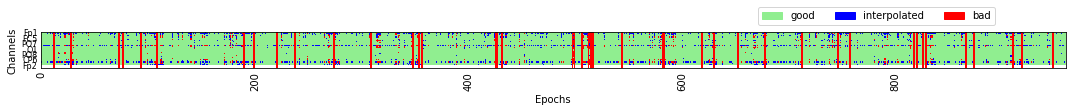

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    7.77it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:43<00:00,    7.22s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:01,  783.08it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:01,  765.48it/s]

  4%|▊                    | Repairing epochs : 37/960 [00:00<00:01,  747.86it/s]

  5%|█                    | Repairing epochs : 49/960 [00:00<00:01,  736.20it/s]

  6%|█▎                   | Repairing epochs : 62/960 [00:00<00:01,  741.12it/s]

  8%|█▌                   | Repairing epochs : 74/960 [00:00<00:01,  739.99it/s]

  9%|█▉                   | Repairing epochs : 86/960 [00:00<00:01,  741.19it/s]

 10%|██▏                  | Repairing epochs : 98/960 [00:00<00:01,  739.22it/s]

 11%|██▎                 | Repairing epochs : 110/960 [00:00<00:01,  740.42it/s]

 13%|██▌        

 36%|███████             | Repairing epochs : 341/960 [00:02<00:03,  169.53it/s]

 36%|███████▏            | Repairing epochs : 344/960 [00:02<00:03,  167.89it/s]

 36%|███████▏            | Repairing epochs : 347/960 [00:02<00:03,  166.40it/s]

 36%|███████▎            | Repairing epochs : 350/960 [00:02<00:03,  166.91it/s]

 37%|███████▎            | Repairing epochs : 353/960 [00:02<00:03,  167.49it/s]

 37%|███████▍            | Repairing epochs : 355/960 [00:02<00:03,  164.59it/s]

 37%|███████▍            | Repairing epochs : 358/960 [00:02<00:03,  163.16it/s]

 38%|███████▌            | Repairing epochs : 361/960 [00:02<00:03,  163.44it/s]

 38%|███████▌            | Repairing epochs : 363/960 [00:02<00:03,  161.80it/s]

 38%|███████▋            | Repairing epochs : 366/960 [00:02<00:03,  162.73it/s]

 38%|███████▋            | Repairing epochs : 369/960 [00:02<00:03,  163.61it/s]

 39%|███████▊            | Repairing epochs : 373/960 [00:02<00:03,  166.90it/s]

 39%|███████▊   

 98%|███████████████████▋| Repairing epochs : 945/960 [00:05<00:00,  169.98it/s]

 99%|███████████████████▊| Repairing epochs : 948/960 [00:05<00:00,  169.17it/s]

 99%|███████████████████▊| Repairing epochs : 951/960 [00:05<00:00,  168.46it/s]

 99%|███████████████████▉| Repairing epochs : 954/960 [00:05<00:00,  167.59it/s]

100%|████████████████████| Repairing epochs : 960/960 [00:05<00:00,  169.27it/s]



  0%|                                       | Fold : 0/10 [00:00<?,       ?it/s]


 10%|███▌                               | Fold : 1/10 [00:01<00:16,    1.80s/it]


 20%|███████                            | Fold : 2/10 [00:03<00:13,    1.66s/it]


 30%|██████████▌                        | Fold : 3/10 [00:04<00:11,    1.65s/it]


 40%|██████████████                     | Fold : 4/10 [00:06<00:09,    1.62s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:08<00:08,    1.61s/it]


 60%|█████████████████████              | Fold : 6/10 [00:09<00:06,    1.61s/it]


 70%|██

 56%|███████████▎        | Repairing epochs : 540/960 [00:03<00:02,  154.14it/s]

 57%|███████████▎        | Repairing epochs : 543/960 [00:03<00:02,  153.44it/s]

 57%|███████████▍        | Repairing epochs : 546/960 [00:03<00:02,  154.74it/s]

 57%|███████████▍        | Repairing epochs : 549/960 [00:03<00:02,  154.21it/s]

 57%|███████████▌        | Repairing epochs : 552/960 [00:03<00:02,  153.67it/s]

 58%|███████████▌        | Repairing epochs : 555/960 [00:03<00:02,  153.58it/s]

 58%|███████████▋        | Repairing epochs : 560/960 [00:03<00:02,  159.41it/s]

 59%|███████████▋        | Repairing epochs : 563/960 [00:03<00:02,  158.87it/s]

 59%|███████████▊        | Repairing epochs : 566/960 [00:03<00:02,  159.88it/s]

 59%|███████████▊        | Repairing epochs : 569/960 [00:03<00:02,  160.91it/s]

 60%|███████████▉        | Repairing epochs : 572/960 [00:03<00:02,  161.97it/s]

 60%|███████████▉        | Repairing epochs : 575/960 [00:03<00:02,  163.01it/s]

 60%|███████████

 12%|██▍                 | Repairing epochs : 117/960 [00:00<00:06,  138.69it/s]

 12%|██▌                 | Repairing epochs : 120/960 [00:00<00:06,  138.74it/s]

 13%|██▌                 | Repairing epochs : 123/960 [00:00<00:06,  138.44it/s]

 13%|██▌                 | Repairing epochs : 125/960 [00:00<00:06,  137.77it/s]

 13%|██▋                 | Repairing epochs : 127/960 [00:00<00:06,  136.78it/s]

 14%|██▋                 | Repairing epochs : 130/960 [00:00<00:06,  137.06it/s]

 14%|██▊                 | Repairing epochs : 134/960 [00:00<00:05,  141.29it/s]

 14%|██▊                 | Repairing epochs : 137/960 [00:00<00:05,  143.14it/s]

 15%|██▉                 | Repairing epochs : 140/960 [00:00<00:05,  144.63it/s]

 15%|██▉                 | Repairing epochs : 143/960 [00:00<00:05,  146.16it/s]

 15%|███                 | Repairing epochs : 146/960 [00:01<00:05,  144.71it/s]

 15%|███                 | Repairing epochs : 148/960 [00:01<00:05,  143.42it/s]

 16%|███▏       

 66%|█████████████▏      | Repairing epochs : 633/960 [00:04<00:02,  116.31it/s]

 66%|█████████████▎      | Repairing epochs : 636/960 [00:04<00:02,  118.70it/s]

 66%|█████████████▎      | Repairing epochs : 638/960 [00:04<00:02,  118.70it/s]

 67%|█████████████▎      | Repairing epochs : 641/960 [00:04<00:02,  121.17it/s]

 67%|█████████████▍      | Repairing epochs : 644/960 [00:04<00:02,  123.75it/s]

 67%|█████████████▍      | Repairing epochs : 647/960 [00:04<00:02,  126.11it/s]

 68%|█████████████▌      | Repairing epochs : 650/960 [00:04<00:02,  127.10it/s]

 68%|█████████████▌      | Repairing epochs : 652/960 [00:04<00:02,  126.95it/s]

 68%|█████████████▋      | Repairing epochs : 655/960 [00:04<00:02,  128.91it/s]

 68%|█████████████▋      | Repairing epochs : 657/960 [00:04<00:02,  128.36it/s]

 69%|█████████████▊      | Repairing epochs : 660/960 [00:04<00:02,  130.53it/s]

 69%|█████████████▊      | Repairing epochs : 663/960 [00:04<00:02,  132.73it/s]

 69%|███████████





Estimated consensus=0.60 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  196.16it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:05,  186.48it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:05,  162.84it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:04,  192.73it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:05,  181.38it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:05,  171.84it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:05,  167.90it/s]

  3%|▌                    | Repairing epochs : 27/960 [00:00<00:05,  172.11it/s]

  3%|▋                    | Repairing epochs : 30/960 [00:00<00:05,  169.42it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:05,  165.79it/s]

  4%|▊                    | Repairing epochs : 36/960 [00:00<00:05,  164.21it/s]

  4%|▉        

 66%|█████████████▏      | Repairing epochs : 632/960 [00:03<00:01,  173.44it/s]

 66%|█████████████▏      | Repairing epochs : 635/960 [00:03<00:01,  173.76it/s]

 66%|█████████████▎      | Repairing epochs : 638/960 [00:03<00:01,  172.76it/s]

 67%|█████████████▍      | Repairing epochs : 642/960 [00:03<00:01,  175.68it/s]

 67%|█████████████▍      | Repairing epochs : 646/960 [00:03<00:01,  177.07it/s]

 68%|█████████████▌      | Repairing epochs : 649/960 [00:03<00:01,  176.32it/s]

 68%|█████████████▌      | Repairing epochs : 652/960 [00:03<00:01,  175.41it/s]

 68%|█████████████▋      | Repairing epochs : 655/960 [00:03<00:01,  174.76it/s]

 68%|█████████████▋      | Repairing epochs : 657/960 [00:03<00:01,  172.35it/s]

 69%|█████████████▊      | Repairing epochs : 660/960 [00:03<00:01,  172.66it/s]

 69%|█████████████▊      | Repairing epochs : 663/960 [00:03<00:01,  172.99it/s]

 69%|█████████████▉      | Repairing epochs : 666/960 [00:03<00:01,  170.70it/s]

 70%|███████████

Dropped 32 epochs: 16, 26, 72, 102, 150, 157, 239, 266, 302, 347, 358, 402, 424, 427, 491, 492, 508, 512, 538, 580, 586, 587, 591, 613, 620, 651, 656, 663, 672, 682, 785, 876


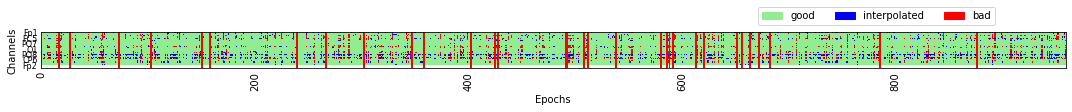

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:04<00:00,    7.44it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:37<00:00,    7.02s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:01,  759.44it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:01,  745.88it/s]

  4%|▊                    | Repairing epochs : 38/960 [00:00<00:01,  750.55it/s]

  5%|█                    | Repairing epochs : 50/960 [00:00<00:01,  744.34it/s]

  6%|█▎                   | Repairing epochs : 62/960 [00:00<00:01,  744.52it/s]

  8%|█▌                   | Repairing epochs : 74/960 [00:00<00:01,  737.06it/s]

  9%|█▉                   | Repairing epochs : 86/960 [00:00<00:01,  733.56it/s]

 10%|██▏                  | Repairing epochs : 98/960 [00:00<00:01,  733.69it/s]

 12%|██▎                 | Repairing epochs : 111/960 [00:00<00:01,  736.50it/s]

 13%|██▌        

 43%|████████▋           | Repairing epochs : 414/960 [00:01<00:02,  205.46it/s]

 44%|████████▋           | Repairing epochs : 418/960 [00:01<00:02,  207.28it/s]

 44%|████████▊           | Repairing epochs : 422/960 [00:01<00:02,  206.31it/s]

 44%|████████▉           | Repairing epochs : 426/960 [00:01<00:02,  205.52it/s]

 45%|████████▉           | Repairing epochs : 431/960 [00:01<00:02,  208.21it/s]

 45%|█████████           | Repairing epochs : 434/960 [00:02<00:02,  205.22it/s]

 46%|█████████▏          | Repairing epochs : 440/960 [00:02<00:02,  209.56it/s]

 46%|█████████▎          | Repairing epochs : 444/960 [00:02<00:02,  210.04it/s]

 46%|█████████▎          | Repairing epochs : 446/960 [00:02<00:02,  206.45it/s]

 47%|█████████▎          | Repairing epochs : 449/960 [00:02<00:02,  205.35it/s]

 47%|█████████▍          | Repairing epochs : 451/960 [00:02<00:02,  201.86it/s]

 47%|█████████▍          | Repairing epochs : 455/960 [00:02<00:02,  201.05it/s]

 48%|█████████▌ 

 10%|██                   | Repairing epochs : 97/960 [00:00<00:04,  207.85it/s]

 11%|██▏                 | Repairing epochs : 105/960 [00:00<00:03,  223.81it/s]

 12%|██▎                 | Repairing epochs : 112/960 [00:00<00:03,  232.31it/s]

 12%|██▍                 | Repairing epochs : 115/960 [00:00<00:03,  229.15it/s]

 12%|██▍                 | Repairing epochs : 119/960 [00:00<00:03,  229.80it/s]

 13%|██▌                 | Repairing epochs : 122/960 [00:00<00:03,  223.42it/s]

 13%|██▌                 | Repairing epochs : 125/960 [00:00<00:03,  220.33it/s]

 13%|██▋                 | Repairing epochs : 128/960 [00:00<00:03,  215.66it/s]

 14%|██▋                 | Repairing epochs : 131/960 [00:00<00:03,  213.81it/s]

 14%|██▊                 | Repairing epochs : 135/960 [00:00<00:03,  212.92it/s]

 15%|██▉                 | Repairing epochs : 141/960 [00:00<00:03,  218.56it/s]

 15%|███                 | Repairing epochs : 147/960 [00:00<00:03,  225.89it/s]

 16%|███▏       

 84%|████████████████▉   | Repairing epochs : 811/960 [00:03<00:00,  196.22it/s]

 85%|████████████████▉   | Repairing epochs : 814/960 [00:03<00:00,  195.70it/s]

 85%|█████████████████   | Repairing epochs : 817/960 [00:03<00:00,  192.95it/s]

 85%|█████████████████   | Repairing epochs : 820/960 [00:04<00:00,  192.26it/s]

 86%|█████████████████▏  | Repairing epochs : 824/960 [00:04<00:00,  191.68it/s]

 86%|█████████████████▎  | Repairing epochs : 828/960 [00:04<00:00,  191.78it/s]

 87%|█████████████████▎  | Repairing epochs : 832/960 [00:04<00:00,  192.02it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:04<00:00,  191.22it/s]

 87%|█████████████████▍  | Repairing epochs : 839/960 [00:04<00:00,  189.46it/s]

 88%|█████████████████▌  | Repairing epochs : 842/960 [00:04<00:00,  187.14it/s]

 88%|█████████████████▋  | Repairing epochs : 846/960 [00:04<00:00,  189.57it/s]

 89%|█████████████████▋  | Repairing epochs : 850/960 [00:04<00:00,  191.61it/s]

 89%|███████████

 52%|██████████▍         | Repairing epochs : 501/960 [00:02<00:02,  196.82it/s]

 52%|██████████▌         | Repairing epochs : 504/960 [00:02<00:02,  195.53it/s]

 53%|██████████▌         | Repairing epochs : 508/960 [00:02<00:02,  195.23it/s]

 53%|██████████▋         | Repairing epochs : 513/960 [00:02<00:02,  197.49it/s]

 54%|██████████▊         | Repairing epochs : 516/960 [00:02<00:02,  196.92it/s]

 54%|██████████▊         | Repairing epochs : 520/960 [00:02<00:02,  199.14it/s]

 55%|██████████▉         | Repairing epochs : 526/960 [00:02<00:02,  205.07it/s]

 55%|███████████         | Repairing epochs : 530/960 [00:02<00:02,  204.70it/s]

 56%|███████████         | Repairing epochs : 533/960 [00:02<00:02,  202.03it/s]

 56%|███████████▏        | Repairing epochs : 536/960 [00:02<00:02,  198.84it/s]

 56%|███████████▏        | Repairing epochs : 538/960 [00:02<00:02,  193.81it/s]

 56%|███████████▎        | Repairing epochs : 541/960 [00:02<00:02,  192.93it/s]

 57%|███████████





Estimated consensus=0.40 and n_interpolate=4




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 3/960 [00:00<00:06,  144.26it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:04,  223.52it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:04,  190.73it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:05,  185.37it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:05,  184.30it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:04,  210.82it/s]

  3%|▋                    | Repairing epochs : 30/960 [00:00<00:03,  243.48it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:03,  233.53it/s]

  4%|▉                    | Repairing epochs : 40/960 [00:00<00:03,  243.25it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:03,  242.44it/s]

  5%|█                    | Repairing epochs : 49/960 [00:00<00:03,  245.03it/s]

  5%|█▏       

 77%|███████████████▎    | Repairing epochs : 736/960 [00:03<00:01,  211.93it/s]

 77%|███████████████▍    | Repairing epochs : 740/960 [00:03<00:01,  210.93it/s]

 78%|███████████████▌    | Repairing epochs : 745/960 [00:03<00:01,  214.33it/s]

 78%|███████████████▌    | Repairing epochs : 748/960 [00:03<00:01,  210.97it/s]

 78%|███████████████▋    | Repairing epochs : 752/960 [00:03<00:00,  209.99it/s]

 79%|███████████████▊    | Repairing epochs : 756/960 [00:03<00:00,  211.36it/s]

 79%|███████████████▊    | Repairing epochs : 760/960 [00:03<00:00,  212.56it/s]

 80%|███████████████▉    | Repairing epochs : 765/960 [00:03<00:00,  215.98it/s]

 80%|████████████████    | Repairing epochs : 769/960 [00:03<00:00,  214.92it/s]

 81%|████████████████▏   | Repairing epochs : 774/960 [00:03<00:00,  218.54it/s]

 81%|████████████████▏   | Repairing epochs : 777/960 [00:03<00:00,  214.70it/s]

 81%|████████████████▎   | Repairing epochs : 781/960 [00:03<00:00,  213.48it/s]

 82%|███████████

Dropped 98 epochs: 0, 13, 22, 47, 62, 66, 68, 78, 96, 104, 111, 125, 129, 134, 140, 149, 154, 164, 185, 186, 195, 228, 264, 267, 277, 286, 304, 320, 335, 350, 352, 357, 362, 366, 368, 379, 382, 389, 395, 396, 409, 411, 413, 431, 433, 439, 442, 446, 454, 468, 476, 486, 500, 511, 513, 577, 590, 593, 614, 633, 637, 641, 651, 660, 662, 674, 683, 687, 708, 738, 744, 745, 754, 755, 795, 810, 824, 830, 835, 836, 843, 851, 852, 854, 863, 871, 872, 878, 887, 898, 908, 911, 915, 921, 931, 932, 948, 951


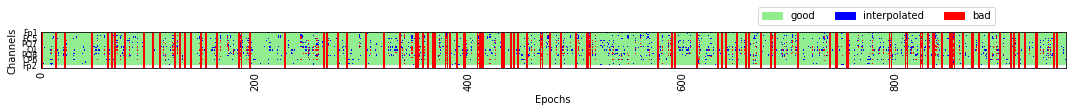

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,   10.03it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:42<00:00,    7.19s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:01,  739.87it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:01,  693.79it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:01,  710.55it/s]

  5%|█                    | Repairing epochs : 46/960 [00:00<00:01,  693.13it/s]

  6%|█▎                   | Repairing epochs : 58/960 [00:00<00:01,  699.56it/s]

  7%|█▌                   | Repairing epochs : 70/960 [00:00<00:01,  701.71it/s]

  9%|█▊                   | Repairing epochs : 82/960 [00:00<00:01,  703.13it/s]

 10%|██                   | Repairing epochs : 94/960 [00:00<00:01,  704.35it/s]

 11%|██▏                 | Repairing epochs : 106/960 [00:00<00:01,  705.09it/s]

 12%|██▍        

 41%|████████            | Repairing epochs : 389/960 [00:01<00:02,  211.61it/s]

 41%|████████▏           | Repairing epochs : 395/960 [00:01<00:02,  217.38it/s]

 42%|████████▎           | Repairing epochs : 400/960 [00:01<00:02,  218.03it/s]

 42%|████████▍           | Repairing epochs : 404/960 [00:01<00:02,  215.89it/s]

 42%|████████▍           | Repairing epochs : 407/960 [00:01<00:02,  212.83it/s]

 43%|████████▌           | Repairing epochs : 412/960 [00:01<00:02,  214.92it/s]

 43%|████████▋           | Repairing epochs : 416/960 [00:01<00:02,  216.16it/s]

 44%|████████▋           | Repairing epochs : 419/960 [00:02<00:02,  212.71it/s]

 44%|████████▊           | Repairing epochs : 423/960 [00:02<00:02,  212.39it/s]

 44%|████████▉           | Repairing epochs : 426/960 [00:02<00:02,  209.00it/s]

 45%|████████▉           | Repairing epochs : 431/960 [00:02<00:02,  210.56it/s]

 45%|█████████           | Repairing epochs : 434/960 [00:02<00:02,  207.38it/s]

 46%|█████████▏ 

  8%|█▌                   | Repairing epochs : 72/960 [00:00<00:04,  191.31it/s]

  8%|█▋                   | Repairing epochs : 77/960 [00:00<00:04,  196.42it/s]

  8%|█▊                   | Repairing epochs : 81/960 [00:00<00:04,  196.31it/s]

  9%|█▊                   | Repairing epochs : 85/960 [00:00<00:04,  199.54it/s]

  9%|█▉                   | Repairing epochs : 88/960 [00:00<00:04,  195.98it/s]

  9%|█▉                   | Repairing epochs : 91/960 [00:00<00:04,  191.22it/s]

 10%|██                   | Repairing epochs : 94/960 [00:00<00:04,  190.40it/s]

 10%|██▏                  | Repairing epochs : 98/960 [00:00<00:04,  192.44it/s]

 11%|██                  | Repairing epochs : 101/960 [00:00<00:04,  191.61it/s]

 11%|██▏                 | Repairing epochs : 104/960 [00:00<00:04,  190.44it/s]

 11%|██▏                 | Repairing epochs : 107/960 [00:00<00:04,  188.01it/s]

 11%|██▎                 | Repairing epochs : 109/960 [00:00<00:04,  184.49it/s]

 12%|██▎        

 82%|████████████████▍   | Repairing epochs : 789/960 [00:03<00:00,  203.00it/s]

 82%|████████████████▌   | Repairing epochs : 792/960 [00:03<00:00,  200.39it/s]

 83%|████████████████▌   | Repairing epochs : 797/960 [00:03<00:00,  204.30it/s]

 83%|████████████████▋   | Repairing epochs : 800/960 [00:03<00:00,  202.08it/s]

 84%|████████████████▊   | Repairing epochs : 804/960 [00:03<00:00,  201.43it/s]

 84%|████████████████▊   | Repairing epochs : 808/960 [00:03<00:00,  200.77it/s]

 84%|████████████████▉   | Repairing epochs : 811/960 [00:03<00:00,  198.36it/s]

 85%|████████████████▉   | Repairing epochs : 815/960 [00:04<00:00,  198.17it/s]

 85%|█████████████████   | Repairing epochs : 819/960 [00:04<00:00,  197.44it/s]

 86%|█████████████████▏  | Repairing epochs : 823/960 [00:04<00:00,  199.49it/s]

 86%|█████████████████▏  | Repairing epochs : 826/960 [00:04<00:00,  197.20it/s]

 86%|█████████████████▎  | Repairing epochs : 829/960 [00:04<00:00,  195.20it/s]

 87%|███████████

 52%|██████████▍         | Repairing epochs : 501/960 [00:02<00:02,  195.35it/s]

 53%|██████████▌         | Repairing epochs : 506/960 [00:02<00:02,  197.69it/s]

 53%|██████████▌         | Repairing epochs : 509/960 [00:02<00:02,  196.15it/s]

 53%|██████████▋         | Repairing epochs : 511/960 [00:02<00:02,  190.45it/s]

 54%|██████████▊         | Repairing epochs : 518/960 [00:02<00:02,  199.06it/s]

 54%|██████████▉         | Repairing epochs : 522/960 [00:02<00:02,  198.70it/s]

 55%|██████████▉         | Repairing epochs : 525/960 [00:02<00:02,  195.82it/s]

 55%|███████████         | Repairing epochs : 529/960 [00:02<00:02,  196.64it/s]

 55%|███████████         | Repairing epochs : 531/960 [00:02<00:02,  191.95it/s]

 56%|███████████▏        | Repairing epochs : 534/960 [00:02<00:02,  191.45it/s]

 56%|███████████▏        | Repairing epochs : 537/960 [00:02<00:02,  189.50it/s]

 56%|███████████▎        | Repairing epochs : 540/960 [00:02<00:02,  187.55it/s]

 57%|███████████





Estimated consensus=0.60 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:03,  290.28it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:04,  205.18it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:04,  216.82it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:04,  209.53it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:04,  223.30it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:04,  216.50it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:04,  219.76it/s]

  3%|▋                    | Repairing epochs : 32/960 [00:00<00:04,  221.85it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:04,  217.56it/s]

  4%|▊                    | Repairing epochs : 39/960 [00:00<00:04,  213.03it/s]

  4%|▉                    | Repairing epochs : 42/960 [00:00<00:04,  200.48it/s]

  5%|▉        

 71%|██████████████▏     | Repairing epochs : 678/960 [00:03<00:01,  192.78it/s]

 71%|██████████████▏     | Repairing epochs : 681/960 [00:03<00:01,  190.92it/s]

 71%|██████████████▎     | Repairing epochs : 685/960 [00:03<00:01,  193.10it/s]

 72%|██████████████▎     | Repairing epochs : 689/960 [00:03<00:01,  195.02it/s]

 72%|██████████████▌     | Repairing epochs : 696/960 [00:03<00:01,  203.19it/s]

 73%|██████████████▌     | Repairing epochs : 700/960 [00:03<00:01,  202.67it/s]

 73%|██████████████▋     | Repairing epochs : 703/960 [00:03<00:01,  201.13it/s]

 74%|██████████████▋     | Repairing epochs : 706/960 [00:03<00:01,  199.79it/s]

 74%|██████████████▊     | Repairing epochs : 709/960 [00:03<00:01,  196.98it/s]

 74%|██████████████▊     | Repairing epochs : 712/960 [00:03<00:01,  194.38it/s]

 75%|██████████████▉     | Repairing epochs : 716/960 [00:03<00:01,  193.64it/s]

 75%|███████████████     | Repairing epochs : 723/960 [00:03<00:01,  200.83it/s]

 76%|███████████

Dropped 15 epochs: 89, 127, 306, 377, 459, 479, 492, 497, 509, 530, 632, 677, 741, 804, 825


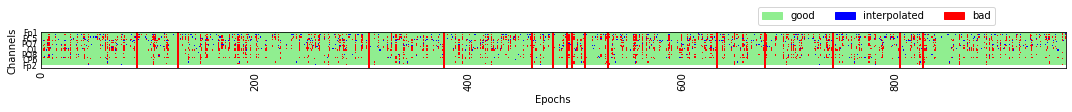

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:03<00:00,    8.63it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:42<00:00,    7.16s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  683.78it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:01,  628.21it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:01,  613.76it/s]

  4%|▉                    | Repairing epochs : 42/960 [00:00<00:01,  623.13it/s]

  6%|█▏                   | Repairing epochs : 53/960 [00:00<00:01,  633.16it/s]

  7%|█▍                   | Repairing epochs : 64/960 [00:00<00:01,  636.34it/s]

  8%|█▋                   | Repairing epochs : 75/960 [00:00<00:01,  642.14it/s]

  9%|█▊                   | Repairing epochs : 85/960 [00:00<00:01,  633.72it/s]

 10%|██                   | Repairing epochs : 95/960 [00:00<00:01,  630.56it/s]

 11%|██▏        

 26%|█████▏              | Repairing epochs : 246/960 [00:01<00:05,  140.51it/s]

 26%|█████▏              | Repairing epochs : 250/960 [00:01<00:04,  144.07it/s]

 27%|█████▎              | Repairing epochs : 255/960 [00:01<00:04,  149.84it/s]

 27%|█████▍              | Repairing epochs : 259/960 [00:01<00:04,  152.43it/s]

 27%|█████▍              | Repairing epochs : 261/960 [00:01<00:04,  150.99it/s]

 28%|█████▌              | Repairing epochs : 264/960 [00:01<00:04,  150.26it/s]

 28%|█████▌              | Repairing epochs : 266/960 [00:01<00:04,  148.81it/s]

 28%|█████▌              | Repairing epochs : 269/960 [00:01<00:04,  148.33it/s]

 28%|█████▋              | Repairing epochs : 272/960 [00:01<00:04,  147.77it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:01<00:04,  148.99it/s]

 29%|█████▊              | Repairing epochs : 278/960 [00:01<00:04,  150.30it/s]

 29%|█████▊              | Repairing epochs : 281/960 [00:01<00:04,  151.70it/s]

 29%|█████▉     

 86%|█████████████████▏  | Repairing epochs : 824/960 [00:05<00:00,  160.56it/s]

 86%|█████████████████▏  | Repairing epochs : 827/960 [00:05<00:00,  159.06it/s]

 86%|█████████████████▎  | Repairing epochs : 830/960 [00:05<00:00,  157.61it/s]

 87%|█████████████████▎  | Repairing epochs : 833/960 [00:05<00:00,  158.67it/s]

 87%|█████████████████▍  | Repairing epochs : 836/960 [00:05<00:00,  159.45it/s]

 87%|█████████████████▍  | Repairing epochs : 839/960 [00:05<00:00,  160.28it/s]

 88%|█████████████████▌  | Repairing epochs : 841/960 [00:05<00:00,  158.73it/s]

 88%|█████████████████▌  | Repairing epochs : 844/960 [00:05<00:00,  159.68it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:05<00:00,  160.67it/s]

 89%|█████████████████▋  | Repairing epochs : 850/960 [00:05<00:00,  159.69it/s]

 89%|█████████████████▊  | Repairing epochs : 853/960 [00:05<00:00,  158.42it/s]

 89%|█████████████████▊  | Repairing epochs : 856/960 [00:05<00:00,  157.92it/s]

 89%|███████████

 41%|████████▏           | Repairing epochs : 391/960 [00:02<00:03,  169.22it/s]

 41%|████████▏           | Repairing epochs : 393/960 [00:02<00:03,  165.83it/s]

 41%|████████▎           | Repairing epochs : 396/960 [00:02<00:03,  166.53it/s]

 42%|████████▎           | Repairing epochs : 399/960 [00:02<00:03,  167.40it/s]

 42%|████████▍           | Repairing epochs : 403/960 [00:02<00:03,  170.24it/s]

 42%|████████▌           | Repairing epochs : 408/960 [00:02<00:03,  175.30it/s]

 43%|████████▌           | Repairing epochs : 412/960 [00:02<00:03,  177.26it/s]

 43%|████████▋           | Repairing epochs : 415/960 [00:02<00:03,  177.09it/s]

 44%|████████▋           | Repairing epochs : 418/960 [00:02<00:03,  174.54it/s]

 44%|████████▊           | Repairing epochs : 420/960 [00:02<00:03,  172.04it/s]

 44%|████████▊           | Repairing epochs : 424/960 [00:02<00:03,  174.34it/s]

 44%|████████▉           | Repairing epochs : 427/960 [00:02<00:03,  174.63it/s]

 45%|████████▉  

 98%|███████████████████▋| Repairing epochs : 944/960 [00:05<00:00,  172.18it/s]

 99%|███████████████████▋| Repairing epochs : 947/960 [00:05<00:00,  170.60it/s]

 99%|███████████████████▊| Repairing epochs : 950/960 [00:05<00:00,  170.47it/s]

 99%|███████████████████▊| Repairing epochs : 953/960 [00:05<00:00,  168.78it/s]

100%|███████████████████▉| Repairing epochs : 956/960 [00:05<00:00,  169.07it/s]

100%|████████████████████| Repairing epochs : 960/960 [00:05<00:00,  160.27it/s]



  0%|                                       | Fold : 0/10 [00:00<?,       ?it/s]


 10%|███▌                               | Fold : 1/10 [00:01<00:13,    1.45s/it]


 20%|███████                            | Fold : 2/10 [00:02<00:11,    1.45s/it]


 30%|██████████▌                        | Fold : 3/10 [00:04<00:10,    1.45s/it]


 40%|██████████████                     | Fold : 4/10 [00:05<00:08,    1.44s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:07<00:07,    1.44s/it]


 60%|███

 50%|██████████          | Repairing epochs : 483/960 [00:03<00:02,  162.65it/s]

 51%|██████████▏         | Repairing epochs : 487/960 [00:03<00:02,  165.39it/s]

 51%|██████████▏         | Repairing epochs : 489/960 [00:03<00:02,  163.44it/s]

 52%|██████████▎         | Repairing epochs : 495/960 [00:03<00:02,  169.86it/s]

 52%|██████████▍         | Repairing epochs : 498/960 [00:03<00:02,  170.35it/s]

 53%|██████████▌         | Repairing epochs : 505/960 [00:03<00:02,  179.31it/s]

 53%|██████████▌         | Repairing epochs : 508/960 [00:03<00:02,  179.12it/s]

 53%|██████████▋         | Repairing epochs : 511/960 [00:03<00:02,  176.83it/s]

 53%|██████████▋         | Repairing epochs : 513/960 [00:03<00:02,  174.00it/s]

 54%|██████████▋         | Repairing epochs : 515/960 [00:03<00:02,  171.63it/s]

 54%|██████████▊         | Repairing epochs : 518/960 [00:03<00:02,  171.80it/s]

 54%|██████████▊         | Repairing epochs : 521/960 [00:03<00:02,  171.98it/s]

 54%|██████████▉





Estimated consensus=0.30 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 3/960 [00:00<00:07,  135.91it/s]

  1%|                      | Repairing epochs : 5/960 [00:00<00:07,  122.72it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:08,  117.88it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:08,  115.85it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:08,  113.51it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:08,  113.06it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:07,  118.79it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:07,  118.67it/s]

  2%|▍                    | Repairing epochs : 20/960 [00:00<00:07,  117.64it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:07,  121.94it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:07,  121.61it/s]

  3%|▌        

 52%|██████████▍         | Repairing epochs : 498/960 [00:03<00:02,  164.90it/s]

 52%|██████████▌         | Repairing epochs : 504/960 [00:03<00:02,  173.48it/s]

 53%|██████████▌         | Repairing epochs : 507/960 [00:03<00:02,  173.50it/s]

 53%|██████████▌         | Repairing epochs : 509/960 [00:03<00:02,  171.08it/s]

 53%|██████████▋         | Repairing epochs : 512/960 [00:03<00:02,  169.45it/s]

 54%|██████████▋         | Repairing epochs : 514/960 [00:03<00:02,  167.34it/s]

 54%|██████████▊         | Repairing epochs : 517/960 [00:03<00:02,  165.45it/s]

 54%|██████████▊         | Repairing epochs : 520/960 [00:03<00:02,  165.53it/s]

 54%|██████████▉         | Repairing epochs : 523/960 [00:03<00:02,  163.87it/s]

 55%|██████████▉         | Repairing epochs : 525/960 [00:03<00:02,  161.80it/s]

 55%|███████████         | Repairing epochs : 528/960 [00:03<00:02,  160.34it/s]

 55%|███████████         | Repairing epochs : 531/960 [00:03<00:02,  160.67it/s]

 56%|███████████

Dropped 31 epochs: 15, 84, 111, 127, 152, 158, 222, 326, 349, 355, 372, 377, 379, 384, 408, 463, 538, 600, 641, 654, 675, 691, 699, 741, 783, 801, 809, 861, 872, 877, 931


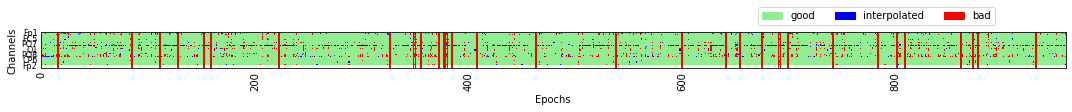

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:05<00:00,    5.98it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:36<00:00,    6.98s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:01,  548.58it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:01,  553.01it/s]

  3%|▋                    | Repairing epochs : 29/960 [00:00<00:01,  585.46it/s]

  4%|▉                    | Repairing epochs : 40/960 [00:00<00:01,  601.41it/s]

  5%|█                    | Repairing epochs : 50/960 [00:00<00:01,  605.95it/s]

  6%|█▎                   | Repairing epochs : 61/960 [00:00<00:01,  620.08it/s]

  8%|█▌                   | Repairing epochs : 72/960 [00:00<00:01,  626.67it/s]

  9%|█▊                   | Repairing epochs : 83/960 [00:00<00:01,  634.07it/s]

 10%|██                   | Repairing epochs : 95/960 [00:00<00:01,  645.49it/s]

 11%|██▏        

 36%|███████▏            | Repairing epochs : 347/960 [00:01<00:02,  206.95it/s]

 36%|███████▎            | Repairing epochs : 349/960 [00:01<00:03,  203.14it/s]

 37%|███████▍            | Repairing epochs : 354/960 [00:01<00:02,  205.64it/s]

 37%|███████▍            | Repairing epochs : 357/960 [00:01<00:02,  201.40it/s]

 38%|███████▌            | Repairing epochs : 360/960 [00:01<00:03,  197.45it/s]

 38%|███████▋            | Repairing epochs : 367/960 [00:01<00:02,  204.77it/s]

 39%|███████▋            | Repairing epochs : 370/960 [00:01<00:02,  203.78it/s]

 39%|███████▊            | Repairing epochs : 373/960 [00:01<00:02,  200.74it/s]

 39%|███████▊            | Repairing epochs : 376/960 [00:01<00:02,  199.93it/s]

 39%|███████▉            | Repairing epochs : 379/960 [00:01<00:02,  197.09it/s]

 40%|███████▉            | Repairing epochs : 382/960 [00:01<00:02,  194.45it/s]

 40%|████████            | Repairing epochs : 386/960 [00:01<00:02,  196.24it/s]

 41%|████████▏  

100%|████████████████████| Repairing epochs : 960/960 [00:05<00:00,  182.67it/s]



  0%|                                       | Fold : 0/10 [00:00<?,       ?it/s]


 10%|███▌                               | Fold : 1/10 [00:01<00:16,    1.85s/it]


 20%|███████                            | Fold : 2/10 [00:03<00:14,    1.76s/it]


 30%|██████████▌                        | Fold : 3/10 [00:05<00:11,    1.70s/it]


 40%|██████████████                     | Fold : 4/10 [00:06<00:10,    1.67s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:08<00:08,    1.79s/it]


 60%|█████████████████████              | Fold : 6/10 [00:11<00:07,    1.93s/it]


 70%|████████████████████████▌          | Fold : 7/10 [00:13<00:06,    2.03s/it]


 80%|████████████████████████████       | Fold : 8/10 [00:16<00:04,    2.07s/it]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:18<00:02,    2.09s/it]


100%|██████████████████████████████████| Fold : 10/10 [00:21<00:00,    2.10s/it]

 33%

 28%|█████▋              | Repairing epochs : 273/960 [00:04<00:10,   67.87it/s]

 29%|█████▋              | Repairing epochs : 274/960 [00:04<00:10,   64.03it/s]

 29%|█████▋              | Repairing epochs : 275/960 [00:04<00:10,   63.19it/s]

 29%|█████▊              | Repairing epochs : 276/960 [00:04<00:10,   62.65it/s]

 29%|█████▊              | Repairing epochs : 278/960 [00:04<00:10,   62.47it/s]

 29%|█████▊              | Repairing epochs : 279/960 [00:04<00:11,   61.36it/s]

 29%|█████▊              | Repairing epochs : 281/960 [00:04<00:11,   59.63it/s]

 30%|█████▉              | Repairing epochs : 285/960 [00:04<00:10,   64.46it/s]

 30%|█████▉              | Repairing epochs : 286/960 [00:04<00:10,   64.28it/s]

 30%|██████              | Repairing epochs : 289/960 [00:04<00:09,   67.58it/s]

 30%|██████              | Repairing epochs : 292/960 [00:04<00:09,   69.57it/s]

 31%|██████              | Repairing epochs : 293/960 [00:04<00:09,   67.32it/s]

 31%|██████▏    

 61%|████████████▏       | Repairing epochs : 585/960 [00:08<00:05,   66.58it/s]

 61%|████████████▏       | Repairing epochs : 586/960 [00:08<00:05,   64.07it/s]

 61%|████████████▏       | Repairing epochs : 587/960 [00:08<00:05,   63.30it/s]

 61%|████████████▎       | Repairing epochs : 588/960 [00:08<00:05,   62.54it/s]

 61%|████████████▎       | Repairing epochs : 590/960 [00:08<00:05,   63.85it/s]

 62%|████████████▎       | Repairing epochs : 592/960 [00:08<00:05,   65.44it/s]

 62%|████████████▎       | Repairing epochs : 593/960 [00:08<00:05,   64.70it/s]

 62%|████████████▍       | Repairing epochs : 594/960 [00:08<00:05,   63.92it/s]

 62%|████████████▍       | Repairing epochs : 597/960 [00:08<00:05,   65.67it/s]

 62%|████████████▍       | Repairing epochs : 599/960 [00:08<00:05,   65.62it/s]

 62%|████████████▌       | Repairing epochs : 600/960 [00:08<00:05,   65.34it/s]

 63%|████████████▌       | Repairing epochs : 601/960 [00:08<00:05,   62.57it/s]

 63%|███████████

 90%|█████████████████▉  | Repairing epochs : 863/960 [00:13<00:02,   33.09it/s]

 90%|██████████████████  | Repairing epochs : 864/960 [00:13<00:02,   33.70it/s]

 90%|██████████████████  | Repairing epochs : 865/960 [00:13<00:02,   33.71it/s]

 90%|██████████████████  | Repairing epochs : 866/960 [00:13<00:02,   33.65it/s]

 90%|██████████████████  | Repairing epochs : 867/960 [00:13<00:02,   32.20it/s]

 90%|██████████████████  | Repairing epochs : 868/960 [00:13<00:03,   30.59it/s]

 91%|██████████████████  | Repairing epochs : 869/960 [00:13<00:03,   27.79it/s]

 91%|██████████████████▏ | Repairing epochs : 870/960 [00:13<00:03,   26.54it/s]

 91%|██████████████████▏ | Repairing epochs : 871/960 [00:13<00:03,   27.05it/s]

 91%|██████████████████▏ | Repairing epochs : 872/960 [00:13<00:03,   27.34it/s]

 91%|██████████████████▏ | Repairing epochs : 873/960 [00:13<00:03,   26.89it/s]

 91%|██████████████████▏ | Repairing epochs : 874/960 [00:13<00:03,   27.13it/s]

 91%|███████████

 14%|██▊                 | Repairing epochs : 135/960 [00:03<00:19,   42.03it/s]

 14%|██▊                 | Repairing epochs : 136/960 [00:03<00:20,   39.82it/s]

 14%|██▊                 | Repairing epochs : 137/960 [00:03<00:21,   38.90it/s]

 14%|██▉                 | Repairing epochs : 139/960 [00:03<00:21,   38.26it/s]

 15%|██▉                 | Repairing epochs : 140/960 [00:03<00:21,   38.36it/s]

 15%|██▉                 | Repairing epochs : 141/960 [00:03<00:22,   37.08it/s]

 15%|██▉                 | Repairing epochs : 142/960 [00:03<00:21,   37.56it/s]

 15%|██▉                 | Repairing epochs : 143/960 [00:03<00:22,   37.02it/s]

 15%|███                 | Repairing epochs : 144/960 [00:03<00:22,   36.87it/s]

 15%|███                 | Repairing epochs : 145/960 [00:03<00:21,   37.32it/s]

 15%|███                 | Repairing epochs : 146/960 [00:03<00:23,   34.64it/s]

 15%|███                 | Repairing epochs : 147/960 [00:03<00:24,   33.32it/s]

 15%|███        

 47%|█████████▍          | Repairing epochs : 454/960 [00:08<00:13,   38.52it/s]

 47%|█████████▍          | Repairing epochs : 455/960 [00:08<00:14,   35.86it/s]

 48%|█████████▌          | Repairing epochs : 456/960 [00:09<00:15,   33.59it/s]

 48%|█████████▌          | Repairing epochs : 457/960 [00:09<00:15,   32.85it/s]

 48%|█████████▌          | Repairing epochs : 458/960 [00:09<00:15,   32.66it/s]

 48%|█████████▌          | Repairing epochs : 459/960 [00:09<00:15,   32.62it/s]

 48%|█████████▌          | Repairing epochs : 460/960 [00:09<00:15,   31.82it/s]

 48%|█████████▌          | Repairing epochs : 461/960 [00:09<00:15,   31.25it/s]

 48%|█████████▋          | Repairing epochs : 462/960 [00:09<00:16,   30.76it/s]

 48%|█████████▋          | Repairing epochs : 463/960 [00:09<00:15,   31.08it/s]

 48%|█████████▋          | Repairing epochs : 464/960 [00:09<00:16,   29.92it/s]

 48%|█████████▋          | Repairing epochs : 465/960 [00:09<00:16,   29.96it/s]

 49%|█████████▋ 

 71%|██████████████▎     | Repairing epochs : 684/960 [00:15<00:07,   36.02it/s]

 71%|██████████████▎     | Repairing epochs : 685/960 [00:15<00:07,   34.91it/s]

 71%|██████████████▎     | Repairing epochs : 686/960 [00:15<00:07,   35.38it/s]

 72%|██████████████▎     | Repairing epochs : 688/960 [00:15<00:07,   36.32it/s]

 72%|██████████████▎     | Repairing epochs : 689/960 [00:16<00:07,   36.32it/s]

 72%|██████████████▍     | Repairing epochs : 690/960 [00:16<00:07,   35.23it/s]

 72%|██████████████▍     | Repairing epochs : 691/960 [00:16<00:07,   34.14it/s]

 72%|██████████████▍     | Repairing epochs : 692/960 [00:16<00:07,   34.53it/s]

 72%|██████████████▍     | Repairing epochs : 693/960 [00:16<00:07,   33.63it/s]

 72%|██████████████▍     | Repairing epochs : 695/960 [00:16<00:07,   34.58it/s]

 72%|██████████████▌     | Repairing epochs : 696/960 [00:16<00:07,   34.09it/s]

 73%|██████████████▌     | Repairing epochs : 697/960 [00:16<00:07,   34.48it/s]

 73%|███████████

 96%|███████████████████▏| Repairing epochs : 920/960 [00:22<00:01,   30.02it/s]

 96%|███████████████████▏| Repairing epochs : 921/960 [00:22<00:01,   29.87it/s]

 96%|███████████████████▏| Repairing epochs : 922/960 [00:22<00:01,   29.71it/s]

 96%|███████████████████▏| Repairing epochs : 923/960 [00:22<00:01,   29.16it/s]

 96%|███████████████████▎| Repairing epochs : 924/960 [00:22<00:01,   28.15it/s]

 96%|███████████████████▎| Repairing epochs : 925/960 [00:22<00:01,   28.36it/s]

 96%|███████████████████▎| Repairing epochs : 926/960 [00:22<00:01,   28.81it/s]

 97%|███████████████████▎| Repairing epochs : 927/960 [00:22<00:01,   29.48it/s]

 97%|███████████████████▎| Repairing epochs : 929/960 [00:22<00:01,   30.36it/s]

 97%|███████████████████▍| Repairing epochs : 930/960 [00:22<00:00,   30.17it/s]

 97%|███████████████████▍| Repairing epochs : 931/960 [00:22<00:01,   26.74it/s]

 97%|███████████████████▍| Repairing epochs : 932/960 [00:22<00:01,   26.41it/s]

 97%|███████████





Estimated consensus=0.10 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:06,  154.25it/s]

  1%|▏                     | Repairing epochs : 6/960 [00:00<00:08,  115.31it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:10,   94.36it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:10,   86.75it/s]

  1%|▏                     | Repairing epochs : 9/960 [00:00<00:13,   70.83it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:11,   79.61it/s]

  1%|▎                    | Repairing epochs : 13/960 [00:00<00:13,   71.10it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:13,   69.22it/s]

  2%|▎                    | Repairing epochs : 17/960 [00:00<00:13,   68.88it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:14,   67.19it/s]

  2%|▍                    | Repairing epochs : 19/960 [00:00<00:14,   65.00it/s]

  2%|▍        

 25%|█████               | Repairing epochs : 242/960 [00:05<00:17,   42.23it/s]

 26%|█████               | Repairing epochs : 245/960 [00:05<00:15,   45.63it/s]

 26%|█████▏              | Repairing epochs : 246/960 [00:06<00:15,   45.03it/s]

 26%|█████▏              | Repairing epochs : 248/960 [00:06<00:15,   46.07it/s]

 26%|█████▏              | Repairing epochs : 249/960 [00:06<00:15,   45.34it/s]

 26%|█████▏              | Repairing epochs : 250/960 [00:06<00:16,   44.10it/s]

 26%|█████▎              | Repairing epochs : 252/960 [00:06<00:15,   45.20it/s]

 26%|█████▎              | Repairing epochs : 254/960 [00:06<00:15,   46.45it/s]

 27%|█████▎              | Repairing epochs : 256/960 [00:06<00:14,   47.95it/s]

 27%|█████▎              | Repairing epochs : 257/960 [00:06<00:14,   47.92it/s]

 27%|█████▍              | Repairing epochs : 259/960 [00:06<00:14,   48.33it/s]

 27%|█████▍              | Repairing epochs : 260/960 [00:06<00:14,   47.76it/s]

 27%|█████▍     

 51%|██████████▏         | Repairing epochs : 489/960 [00:11<00:12,   38.70it/s]

 51%|██████████▏         | Repairing epochs : 490/960 [00:11<00:13,   35.35it/s]

 51%|██████████▏         | Repairing epochs : 491/960 [00:11<00:13,   34.09it/s]

 51%|██████████▎         | Repairing epochs : 492/960 [00:11<00:13,   33.64it/s]

 51%|██████████▎         | Repairing epochs : 494/960 [00:11<00:13,   34.73it/s]

 52%|██████████▎         | Repairing epochs : 495/960 [00:11<00:13,   35.33it/s]

 52%|██████████▎         | Repairing epochs : 496/960 [00:12<00:13,   35.57it/s]

 52%|██████████▍         | Repairing epochs : 498/960 [00:12<00:12,   36.83it/s]

 52%|██████████▍         | Repairing epochs : 500/960 [00:12<00:12,   37.51it/s]

 52%|██████████▍         | Repairing epochs : 502/960 [00:12<00:11,   38.80it/s]

 52%|██████████▌         | Repairing epochs : 504/960 [00:12<00:11,   40.06it/s]

 53%|██████████▌         | Repairing epochs : 506/960 [00:12<00:11,   41.19it/s]

 53%|██████████▌

 75%|███████████████     | Repairing epochs : 723/960 [00:17<00:05,   40.17it/s]

 75%|███████████████     | Repairing epochs : 724/960 [00:17<00:06,   39.07it/s]

 76%|███████████████     | Repairing epochs : 725/960 [00:17<00:06,   38.97it/s]

 76%|███████████████▏    | Repairing epochs : 727/960 [00:17<00:05,   40.11it/s]

 76%|███████████████▏    | Repairing epochs : 728/960 [00:18<00:06,   36.91it/s]

 76%|███████████████▏    | Repairing epochs : 729/960 [00:18<00:06,   36.72it/s]

 76%|███████████████▏    | Repairing epochs : 730/960 [00:18<00:06,   37.02it/s]

 76%|███████████████▎    | Repairing epochs : 732/960 [00:18<00:05,   38.11it/s]

 76%|███████████████▎    | Repairing epochs : 734/960 [00:18<00:05,   39.14it/s]

 77%|███████████████▎    | Repairing epochs : 735/960 [00:18<00:05,   39.63it/s]

 77%|███████████████▎    | Repairing epochs : 736/960 [00:18<00:05,   39.27it/s]

 77%|███████████████▎    | Repairing epochs : 737/960 [00:18<00:06,   35.59it/s]

 77%|███████████

 99%|███████████████████▉| Repairing epochs : 954/960 [00:24<00:00,   39.44it/s]

 99%|███████████████████▉| Repairing epochs : 955/960 [00:24<00:00,   38.90it/s]

100%|███████████████████▉| Repairing epochs : 956/960 [00:24<00:00,   38.20it/s]

100%|███████████████████▉| Repairing epochs : 957/960 [00:24<00:00,   38.14it/s]

100%|███████████████████▉| Repairing epochs : 958/960 [00:24<00:00,   37.78it/s]

100%|███████████████████▉| Repairing epochs : 959/960 [00:24<00:00,   37.90it/s]

100%|████████████████████| Repairing epochs : 960/960 [00:24<00:00,   39.41it/s]


Dropped 391 epochs: 2, 5, 6, 19, 22, 23, 25, 26, 29, 31, 33, 35, 36, 38, 40, 42, 43, 44, 51, 52, 53, 54, 56, 57, 59, 60, 61, 62, 66, 70, 71, 77, 79, 82, 86, 94, 98, 101, 102, 104, 105, 107, 111, 113, 114, 115, 116, 117, 123, 128, 129, 131, 132, 133, 135, 136, 138, 140, 142, 144, 145, 147, 148, 153, 154, 157, 160, 163, 170, 175, 179, 180, 181, 184, 185, 186, 188, 190, 191, 196, 197, 198, 201, 202, 206, 209, 210, 212, 213, 214, 216, 219, 220, 221, 222, 223, 224, 225, 226, 232, 233, 234, 235, 238, 248, 251, 256, 258, 263, 264, 270, 271, 274, 275, 278, 279, 284, 288, 291, 294, 295, 300, 302, 303, 308, 309, 316, 317, 318, 329, 331, 335, 337, 338, 340, 342, 345, 347, 353, 354, 355, 356, 365, 367, 368, 373, 376, 377, 378, 380, 382, 384, 387, 388, 391, 392, 395, 396, 397, 402, 406, 412, 419, 422, 424, 425, 430, 431, 432, 434, 435, 437, 439, 440, 443, 446, 448, 451, 452, 455, 456, 457, 459, 460, 461, 463, 468, 472, 473, 474, 476, 477, 478, 486, 488, 489, 490, 499, 501, 505, 506, 507, 510, 511, 

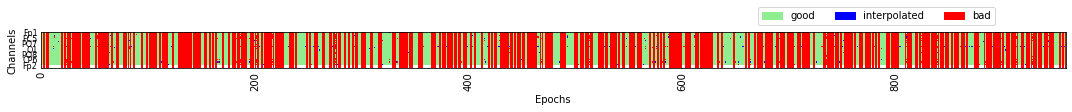

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:37<00:00,    1.20s/it]
100%|██████████████| Computing thresholds ... : 31/31 [05:12<00:00,   10.09s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  661.65it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  663.37it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:01,  671.01it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:01,  667.08it/s]

  6%|█▏                   | Repairing epochs : 55/960 [00:00<00:01,  663.83it/s]

  7%|█▍                   | Repairing epochs : 66/960 [00:00<00:01,  663.47it/s]

  8%|█▋                   | Repairing epochs : 77/960 [00:00<00:01,  665.07it/s]

  9%|█▉                   | Repairing epochs : 88/960 [00:00<00:01,  663.87it/s]

 10%|██▏                  | Repairing epochs : 99/960 [00:00<00:01,  664.72it/s]

 12%|██▎        

 38%|███████▋            | Repairing epochs : 369/960 [00:01<00:02,  220.52it/s]

 39%|███████▊            | Repairing epochs : 373/960 [00:01<00:02,  220.78it/s]

 39%|███████▉            | Repairing epochs : 379/960 [00:01<00:02,  225.25it/s]

 40%|███████▉            | Repairing epochs : 382/960 [00:01<00:02,  220.92it/s]

 40%|████████            | Repairing epochs : 385/960 [00:01<00:02,  219.25it/s]

 40%|████████            | Repairing epochs : 388/960 [00:01<00:02,  217.32it/s]

 41%|████████▏           | Repairing epochs : 391/960 [00:01<00:02,  215.28it/s]

 41%|████████▏           | Repairing epochs : 393/960 [00:01<00:02,  210.97it/s]

 41%|████████▎           | Repairing epochs : 396/960 [00:01<00:02,  206.64it/s]

 42%|████████▎           | Repairing epochs : 399/960 [00:01<00:02,  203.89it/s]

 42%|████████▍           | Repairing epochs : 402/960 [00:01<00:02,  202.98it/s]

 42%|████████▍           | Repairing epochs : 405/960 [00:01<00:02,  196.82it/s]

 43%|████████▌  

  6%|█▎                   | Repairing epochs : 60/960 [00:00<00:04,  214.59it/s]

  7%|█▍                   | Repairing epochs : 63/960 [00:00<00:04,  207.56it/s]

  7%|█▍                   | Repairing epochs : 68/960 [00:00<00:04,  214.90it/s]

  8%|█▌                   | Repairing epochs : 72/960 [00:00<00:04,  213.84it/s]

  8%|█▋                   | Repairing epochs : 78/960 [00:00<00:03,  221.64it/s]

  9%|█▊                   | Repairing epochs : 82/960 [00:00<00:04,  219.06it/s]

  9%|█▉                   | Repairing epochs : 87/960 [00:00<00:03,  223.46it/s]

 10%|██                   | Repairing epochs : 92/960 [00:00<00:03,  228.42it/s]

 10%|██                   | Repairing epochs : 95/960 [00:00<00:03,  223.67it/s]

 10%|██▏                  | Repairing epochs : 99/960 [00:00<00:03,  221.80it/s]

 11%|██▏                 | Repairing epochs : 102/960 [00:00<00:03,  219.27it/s]

 11%|██▏                 | Repairing epochs : 107/960 [00:00<00:03,  223.91it/s]

 12%|██▎        

 82%|████████████████▍   | Repairing epochs : 787/960 [00:03<00:00,  186.54it/s]

 82%|████████████████▍   | Repairing epochs : 790/960 [00:03<00:00,  186.55it/s]

 83%|████████████████▌   | Repairing epochs : 796/960 [00:03<00:00,  188.52it/s]

 83%|████████████████▋   | Repairing epochs : 800/960 [00:03<00:00,  191.16it/s]

 84%|████████████████▋   | Repairing epochs : 803/960 [00:03<00:00,  190.79it/s]

 84%|████████████████▊   | Repairing epochs : 806/960 [00:03<00:00,  187.87it/s]

 85%|████████████████▉   | Repairing epochs : 812/960 [00:03<00:00,  194.72it/s]

 85%|████████████████▉   | Repairing epochs : 815/960 [00:03<00:00,  192.50it/s]

 85%|█████████████████   | Repairing epochs : 818/960 [00:03<00:00,  192.17it/s]

 86%|█████████████████▏  | Repairing epochs : 822/960 [00:03<00:00,  194.20it/s]

 86%|█████████████████▏  | Repairing epochs : 826/960 [00:03<00:00,  196.17it/s]

 86%|█████████████████▎  | Repairing epochs : 829/960 [00:03<00:00,  195.45it/s]

 87%|███████████

 53%|██████████▋         | Repairing epochs : 510/960 [00:02<00:02,  209.17it/s]

 54%|██████████▋         | Repairing epochs : 515/960 [00:02<00:02,  213.17it/s]

 54%|██████████▊         | Repairing epochs : 519/960 [00:02<00:02,  214.20it/s]

 55%|██████████▉         | Repairing epochs : 525/960 [00:02<00:01,  219.01it/s]

 55%|███████████         | Repairing epochs : 529/960 [00:02<00:01,  219.69it/s]

 55%|███████████         | Repairing epochs : 532/960 [00:02<00:01,  214.97it/s]

 56%|███████████▏        | Repairing epochs : 536/960 [00:02<00:01,  212.99it/s]

 57%|███████████▎        | Repairing epochs : 543/960 [00:02<00:01,  219.02it/s]

 57%|███████████▍        | Repairing epochs : 546/960 [00:02<00:01,  215.80it/s]

 57%|███████████▍        | Repairing epochs : 551/960 [00:02<00:01,  218.57it/s]

 58%|███████████▌        | Repairing epochs : 556/960 [00:02<00:01,  219.48it/s]

 58%|███████████▋        | Repairing epochs : 559/960 [00:02<00:01,  217.49it/s]

 59%|███████████





Estimated consensus=0.40 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  233.57it/s]

  1%|▏                     | Repairing epochs : 8/960 [00:00<00:04,  234.67it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:04,  197.46it/s]

  1%|▎                    | Repairing epochs : 14/960 [00:00<00:05,  185.92it/s]

  2%|▎                    | Repairing epochs : 16/960 [00:00<00:05,  171.64it/s]

  2%|▌                    | Repairing epochs : 23/960 [00:00<00:04,  205.44it/s]

  3%|▌                    | Repairing epochs : 26/960 [00:00<00:04,  200.91it/s]

  3%|▋                    | Repairing epochs : 29/960 [00:00<00:04,  192.48it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:05,  182.01it/s]

  4%|▊                    | Repairing epochs : 35/960 [00:00<00:04,  188.54it/s]

  4%|▊                    | Repairing epochs : 38/960 [00:00<00:04,  188.12it/s]

  5%|▉        

 76%|███████████████▏    | Repairing epochs : 730/960 [00:03<00:01,  197.92it/s]

 76%|███████████████▎    | Repairing epochs : 734/960 [00:03<00:01,  200.02it/s]

 77%|███████████████▎    | Repairing epochs : 737/960 [00:03<00:01,  197.33it/s]

 77%|███████████████▍    | Repairing epochs : 740/960 [00:03<00:01,  196.56it/s]

 78%|███████████████▌    | Repairing epochs : 747/960 [00:03<00:01,  204.09it/s]

 78%|███████████████▋    | Repairing epochs : 750/960 [00:03<00:01,  201.02it/s]

 79%|███████████████▋    | Repairing epochs : 755/960 [00:03<00:01,  204.06it/s]

 79%|███████████████▊    | Repairing epochs : 759/960 [00:03<00:00,  204.93it/s]

 80%|███████████████▉    | Repairing epochs : 764/960 [00:03<00:00,  208.05it/s]

 80%|████████████████    | Repairing epochs : 768/960 [00:03<00:00,  208.47it/s]

 80%|████████████████    | Repairing epochs : 772/960 [00:03<00:00,  207.88it/s]

 81%|████████████████▏   | Repairing epochs : 775/960 [00:03<00:00,  204.61it/s]

 81%|███████████

Dropped 15 epochs: 46, 58, 124, 298, 389, 446, 477, 495, 554, 582, 659, 702, 816, 830, 837


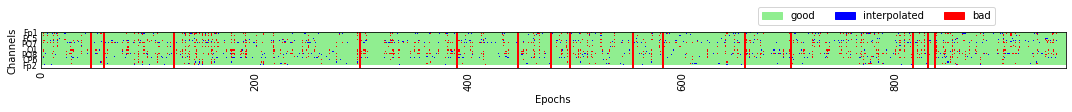

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_22383/4241686467.py:65: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


100%|█████████████| Creating augmented epochs : 31/31 [00:05<00:00,    6.04it/s]
100%|██████████████| Computing thresholds ... : 31/31 [03:45<00:00,    7.29s/it]


  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  1%|▏                    | Repairing epochs : 11/960 [00:00<00:01,  684.29it/s]

  2%|▍                    | Repairing epochs : 22/960 [00:00<00:01,  683.13it/s]

  3%|▋                    | Repairing epochs : 33/960 [00:00<00:01,  680.04it/s]

  5%|▉                    | Repairing epochs : 44/960 [00:00<00:01,  676.43it/s]

  6%|█▏                   | Repairing epochs : 55/960 [00:00<00:01,  668.10it/s]

  7%|█▍                   | Repairing epochs : 66/960 [00:00<00:01,  668.77it/s]

  8%|█▋                   | Repairing epochs : 77/960 [00:00<00:01,  665.32it/s]

  9%|█▉                   | Repairing epochs : 88/960 [00:00<00:01,  661.83it/s]

 10%|██▏                  | Repairing epochs : 99/960 [00:00<00:01,  660.71it/s]

 11%|██▎        

 33%|██████▋             | Repairing epochs : 319/960 [00:01<00:03,  166.30it/s]

 34%|██████▊             | Repairing epochs : 324/960 [00:01<00:03,  170.10it/s]

 34%|██████▊             | Repairing epochs : 328/960 [00:01<00:03,  171.45it/s]

 34%|██████▉             | Repairing epochs : 331/960 [00:01<00:03,  170.33it/s]

 35%|███████             | Repairing epochs : 336/960 [00:01<00:03,  173.97it/s]

 35%|███████             | Repairing epochs : 339/960 [00:01<00:03,  172.70it/s]

 36%|███████▏            | Repairing epochs : 342/960 [00:02<00:03,  171.81it/s]

 36%|███████▏            | Repairing epochs : 345/960 [00:02<00:03,  170.48it/s]

 36%|███████▏            | Repairing epochs : 347/960 [00:02<00:03,  168.17it/s]

 37%|███████▎            | Repairing epochs : 351/960 [00:02<00:03,  171.10it/s]

 37%|███████▍            | Repairing epochs : 354/960 [00:02<00:03,  169.73it/s]

 37%|███████▍            | Repairing epochs : 357/960 [00:02<00:03,  168.65it/s]

 38%|███████▌   

 20%|███████                            | Fold : 2/10 [00:03<00:13,    1.66s/it]


 30%|██████████▌                        | Fold : 3/10 [00:04<00:11,    1.63s/it]


 40%|██████████████                     | Fold : 4/10 [00:06<00:09,    1.61s/it]


 50%|█████████████████▌                 | Fold : 5/10 [00:08<00:07,    1.60s/it]


 60%|█████████████████████              | Fold : 6/10 [00:09<00:06,    1.59s/it]


 70%|████████████████████████▌          | Fold : 7/10 [00:11<00:04,    1.58s/it]


 80%|████████████████████████████       | Fold : 8/10 [00:12<00:03,    1.58s/it]


 90%|███████████████████████████████▌   | Fold : 9/10 [00:14<00:01,    1.58s/it]


100%|██████████████████████████████████| Fold : 10/10 [00:15<00:00,    1.58s/it]

 33%|██████████▋                     | n_interp : 1/3 [00:21<00:43,   21.61s/it]

  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  232.84it/s]

  1%|▏  

 61%|████████████▏       | Repairing epochs : 585/960 [00:03<00:02,  180.19it/s]

 61%|████████████▎       | Repairing epochs : 588/960 [00:03<00:02,  177.71it/s]

 61%|████████████▎       | Repairing epochs : 590/960 [00:03<00:02,  175.15it/s]

 62%|████████████▎       | Repairing epochs : 593/960 [00:03<00:02,  175.40it/s]

 62%|████████████▍       | Repairing epochs : 596/960 [00:03<00:02,  173.35it/s]

 62%|████████████▍       | Repairing epochs : 599/960 [00:03<00:02,  173.45it/s]

 63%|████████████▌       | Repairing epochs : 603/960 [00:03<00:02,  176.04it/s]

 63%|████████████▋       | Repairing epochs : 606/960 [00:03<00:02,  176.18it/s]

 64%|████████████▋       | Repairing epochs : 611/960 [00:03<00:01,  180.94it/s]

 64%|████████████▊       | Repairing epochs : 614/960 [00:03<00:01,  178.83it/s]

 64%|████████████▉       | Repairing epochs : 618/960 [00:03<00:01,  179.23it/s]

 65%|████████████▉       | Repairing epochs : 623/960 [00:03<00:01,  184.03it/s]

 66%|███████████

 23%|████▋               | Repairing epochs : 225/960 [00:01<00:03,  184.17it/s]

 24%|████▊               | Repairing epochs : 230/960 [00:01<00:03,  189.36it/s]

 24%|████▊               | Repairing epochs : 233/960 [00:01<00:03,  187.10it/s]

 25%|████▉               | Repairing epochs : 237/960 [00:01<00:03,  187.25it/s]

 25%|█████               | Repairing epochs : 240/960 [00:01<00:03,  185.14it/s]

 25%|█████               | Repairing epochs : 244/960 [00:01<00:03,  185.79it/s]

 26%|█████▏              | Repairing epochs : 247/960 [00:01<00:03,  185.76it/s]

 26%|█████▏              | Repairing epochs : 250/960 [00:01<00:03,  184.16it/s]

 26%|█████▎              | Repairing epochs : 253/960 [00:01<00:03,  182.00it/s]

 27%|█████▎              | Repairing epochs : 256/960 [00:01<00:03,  179.73it/s]

 27%|█████▍              | Repairing epochs : 260/960 [00:01<00:03,  180.11it/s]

 27%|█████▍              | Repairing epochs : 263/960 [00:01<00:03,  180.28it/s]

 28%|█████▌     

 86%|█████████████████▏  | Repairing epochs : 823/960 [00:04<00:00,  167.06it/s]

 86%|█████████████████▏  | Repairing epochs : 826/960 [00:04<00:00,  165.67it/s]

 86%|█████████████████▎  | Repairing epochs : 828/960 [00:04<00:00,  163.31it/s]

 87%|█████████████████▎  | Repairing epochs : 831/960 [00:04<00:00,  162.79it/s]

 87%|█████████████████▍  | Repairing epochs : 834/960 [00:04<00:00,  163.54it/s]

 87%|█████████████████▍  | Repairing epochs : 838/960 [00:04<00:00,  164.58it/s]

 88%|█████████████████▌  | Repairing epochs : 841/960 [00:04<00:00,  163.40it/s]

 88%|█████████████████▌  | Repairing epochs : 844/960 [00:04<00:00,  164.22it/s]

 88%|█████████████████▋  | Repairing epochs : 847/960 [00:04<00:00,  165.10it/s]

 89%|█████████████████▋  | Repairing epochs : 850/960 [00:04<00:00,  163.88it/s]

 89%|█████████████████▊  | Repairing epochs : 853/960 [00:04<00:00,  163.11it/s]

 89%|█████████████████▉  | Repairing epochs : 858/960 [00:05<00:00,  167.11it/s]

 90%|███████████





Estimated consensus=0.20 and n_interpolate=1




  0%|                          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|                      | Repairing epochs : 4/960 [00:00<00:04,  218.87it/s]

  1%|▏                     | Repairing epochs : 7/960 [00:00<00:05,  179.55it/s]

  1%|▏                    | Repairing epochs : 10/960 [00:00<00:05,  174.95it/s]

  1%|▎                    | Repairing epochs : 12/960 [00:00<00:05,  162.98it/s]

  2%|▎                    | Repairing epochs : 15/960 [00:00<00:05,  159.56it/s]

  2%|▍                    | Repairing epochs : 18/960 [00:00<00:06,  156.46it/s]

  2%|▍                    | Repairing epochs : 21/960 [00:00<00:06,  152.97it/s]

  3%|▌                    | Repairing epochs : 25/960 [00:00<00:05,  158.18it/s]

  3%|▌                    | Repairing epochs : 28/960 [00:00<00:06,  154.10it/s]

  3%|▋                    | Repairing epochs : 31/960 [00:00<00:05,  156.94it/s]

  4%|▋                    | Repairing epochs : 34/960 [00:00<00:05,  155.64it/s]

  4%|▊        

 65%|████████████▉       | Repairing epochs : 623/960 [00:03<00:01,  188.01it/s]

 66%|█████████████       | Repairing epochs : 629/960 [00:03<00:01,  190.66it/s]

 66%|█████████████▏      | Repairing epochs : 632/960 [00:03<00:01,  187.65it/s]

 66%|█████████████▏      | Repairing epochs : 634/960 [00:03<00:01,  184.74it/s]

 66%|█████████████▎      | Repairing epochs : 638/960 [00:03<00:01,  184.78it/s]

 67%|█████████████▍      | Repairing epochs : 643/960 [00:03<00:01,  188.12it/s]

 67%|█████████████▍      | Repairing epochs : 646/960 [00:03<00:01,  187.38it/s]

 68%|█████████████▌      | Repairing epochs : 649/960 [00:03<00:01,  185.20it/s]

 68%|█████████████▌      | Repairing epochs : 652/960 [00:03<00:01,  182.25it/s]

 68%|█████████████▋      | Repairing epochs : 655/960 [00:03<00:01,  179.00it/s]

 69%|█████████████▋      | Repairing epochs : 658/960 [00:03<00:01,  176.97it/s]

 69%|█████████████▊      | Repairing epochs : 662/960 [00:03<00:01,  177.90it/s]

 69%|███████████

Dropped 67 epochs: 21, 27, 35, 42, 51, 59, 67, 70, 94, 106, 109, 146, 167, 181, 185, 190, 220, 239, 248, 251, 254, 259, 260, 264, 272, 323, 324, 327, 339, 346, 353, 381, 383, 390, 391, 421, 454, 461, 462, 467, 470, 488, 496, 503, 536, 538, 569, 645, 654, 656, 697, 729, 737, 739, 744, 801, 812, 825, 829, 831, 840, 874, 895, 897, 910, 919, 952


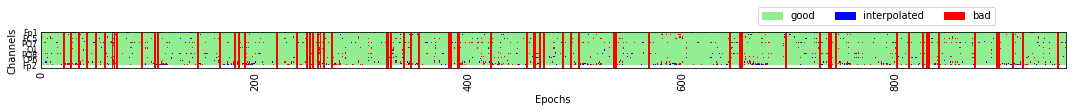

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

1+3_same 2+2_same 3+1_same 1+3_diff 2+2_diff 3+1_diff left  \
Hudson2_0015.vhdr      160      160      160      160      160      160  480   
Hudson2_0023.vhdr      160      160      160      160      160      160  480   
Hudson2_0019.vhdr      180      183      179      182      181      181  542   
Hudson2_0018.vhdr      160      160      160      160      160      160  480   
Hudson2_0022.vhdr      160      160      160      160      160      160  480   
Hudson2_0014.vhdr      160      160      160      160      160      160  480   
Hudson2_0025.vhdr      160      160      160      160      160      160  480   
Hudson2_0029.vhdr      160      160      160      160      160      160  480   
Hudson2_0013.vhdr      160      160      160      160      160      160  480   
Hudson2_0012.vhdr      160      160      160      160      160      160  480   
Hudson2_0028.vhdr      160      160      160      160      160      160  480   
Hudson2_0024.vhdr      160      160      160      160      160      160  480   
Hudson2_0031.vhdr      160      160      160      160      160      160  480   
Hudson2_0027.vhdr      160      160      160      160      160      160  480   
Hudson2_0011.vhdr      160      160      160      160      160      160  480   
Hudson2_0026.vhdr      160      160      160      160      160      160  480   
Hudson2_0030.vhdr      160      160      160      160      160      160  480   
Hudson2_0017.vhdr      160      160      160      160      160      160  480   
Hudson2_0020.vhdr      160      160      160      160      160      160  480   
Hudson2_0016.vhdr      160      160      160      160      160      160  480   

                  right good  bad  ... 3+1_diff-right-good  \
Hudson2_0015.vhdr   480  748  212  ...                  60   
Hudson2_0023.vhdr   480  858  102  ...                  66   
Hudson2_0019.vhdr   544  918  168  ...                  79   
Hudson2_0018.vhdr   480  816  144  ...                  62   
Hudson2_0022.vhdr   480  680  280  ...                  58   
Hudson2_0014.vhdr   480  755  205  ...                  59   
Hudson2_0025.vhdr   480  721  239  ...                  62   
Hudson2_0029.vhdr   480  737  223  ...                  63   
Hudson2_0013.vhdr   480  661  299  ...                  52   
Hudson2_0012.vhdr   480  774  186  ...                  69   
Hudson2_0028.vhdr   480  718  242  ...                  57   
Hudson2_0024.vhdr   480  721  239  ...                  61   
Hudson2_0031.vhdr   480  768  192  ...                  70   
Hudson2_0027.vhdr   480  735  225  ...                  65   
Hudson2_0011.vhdr   480  645  315  ...                  55   
Hudson2_0026.vhdr   480  759  201  ...                  60   
Hudson2_0030.vhdr   480  672  288  ...                  58   
Hudson2_0017.vhdr   480  810  150  ...                  69   
Hudson2_0020.vhdr   480  780  180  ...                  66   
Hudson2_0016.vhdr   480  795  165  ...                  64   

                  3+1_diff-right-good-CDA right-good-CDA 3+1_diff-right-bad  \
Hudson2_0015.vhdr               -0.150465      -0.342166                 20   
Hudson2_0023.vhdr                0.017417       0.028845                 14   
Hudson2_0019.vhdr               -3.879987      -2.025313                 11   
Hudson2_0018.vhdr               -1.883062      -0.745328                 18   
Hudson2_0022.vhdr               -0.577574       0.166008                 22   
Hudson2_0014.vhdr               -1.261763      -1.077543                 21   
Hudson2_0025.vhdr               -4.821884      -3.333673                 18   
Hudson2_0029.vhdr               -3.778163      -2.097612                 17   
Hudson2_0013.vhdr                 -0.5898       0.300242                 28   
Hudson2_0012.vhdr                -2.97399      -1.575893                 11   
Hudson2_0028.vhdr               -2.410007      -1.612053                 23   
Hudson2_0024.vhdr               -0.622444      -0.036657                 19   
Hudson2

In [2]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Feldmann2018-Exp2'

triggers = dict();

triggers['1+3_same'] = [111, 112] 
triggers['2+2_same'] = [121, 122]
triggers['3+1_same'] = [131, 132]
triggers['1+3_diff'] = [141, 142] 
triggers['2+2_diff'] = [151, 152]
triggers['3+1_diff'] = [161, 162]

triggers['right'] = [111, 121, 131, 141, 151, 161]
triggers['left'] = [112, 122, 132, 142, 152, 162]

triggers['all'] = [111, 121, 131, 141, 151, 161, 112, 122, 132, 142, 152, 162]

# Labels
conds = ['1+3_same', '2+2_same', '3+1_same', '1+3_diff', '2+2_diff', '3+1_diff']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['PO8']
chan_left = ['PO7']

# Epoch Information
epoch_length = 1.5
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.3, 0.7) # Window #1
# cda_window = (1.0, 1.4) # Window #2

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment2/'

for filepath in glob.iglob(directory_path + 'rawEEG/' + '*.vhdr'):
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Set Electrodes Locations - Used Brain Products (locations seem to in eeg file...)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = mne.events_from_annotations(preproc)
        
    # Select Channels (to save time on cleaning)
    #preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    subject_str_idx = filename.rfind('.')
    subject_id = filename[subject_str_idx - 2: subject_str_idx]
    specific_events = get_specific_events(events[0], conds, sides, perfs, triggers, subject_id, internal_triggers, experiment=2)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

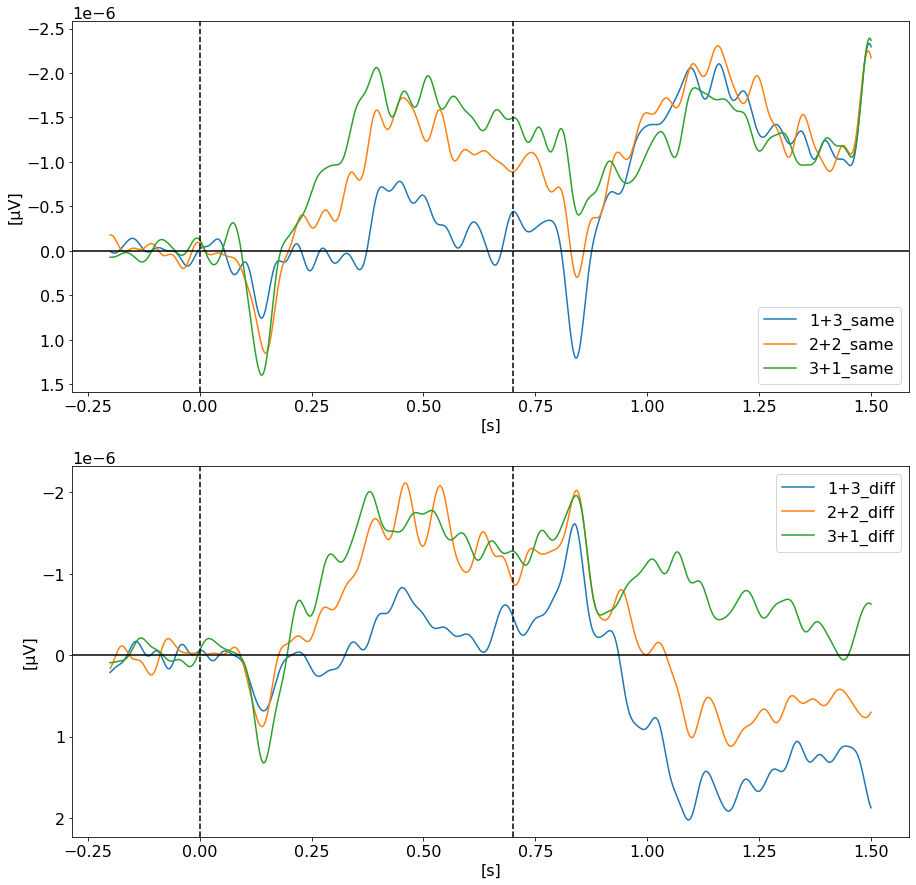

In [4]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():        
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

# 2. Plot Figure #1
axs[0].plot(times, cda_all['1+3_same'].mean(0), label='1+3_same')
axs[0].plot(times, cda_all['2+2_same'].mean(0), label='2+2_same')
axs[0].plot(times, cda_all['3+1_same'].mean(0), label='3+1_same')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axvline(x=0.7, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

# 2. Plot Figure #2
axs[1].plot(times, cda_all['1+3_diff'].mean(0), label='1+3_diff')
axs[1].plot(times, cda_all['2+2_diff'].mean(0), label='2+2_diff')
axs[1].plot(times, cda_all['3+1_diff'].mean(0), label='3+1_diff')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axvline(x=0.7, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

plt.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [5]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [6]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

20

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

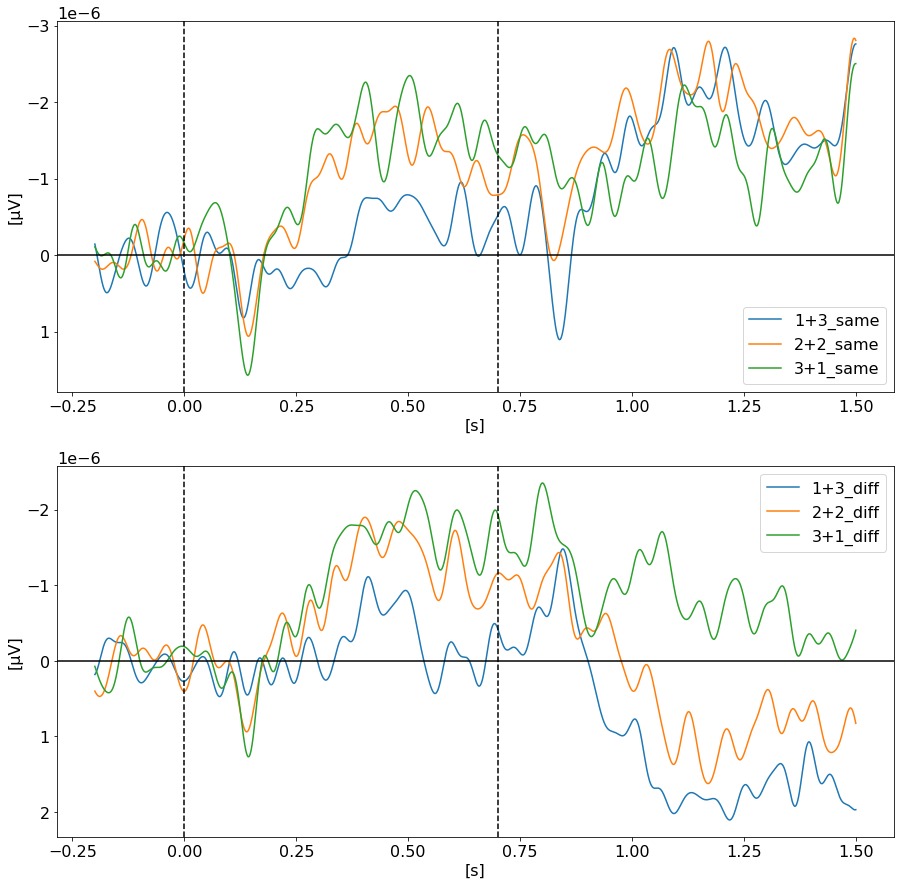

In [8]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

# 2. Plot Figure #1
axs[0].plot(times, cda_all_bad['1+3_same'].mean(0), label='1+3_same')
axs[0].plot(times, cda_all_bad['2+2_same'].mean(0), label='2+2_same')
axs[0].plot(times, cda_all_bad['3+1_same'].mean(0), label='3+1_same')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axvline(x=0.7, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

# 2. Plot Figure #2
axs[1].plot(times, cda_all_bad['1+3_diff'].mean(0), label='1+3_diff')
axs[1].plot(times, cda_all_bad['2+2_diff'].mean(0), label='2+2_diff')
axs[1].plot(times, cda_all_bad['3+1_diff'].mean(0), label='3+1_diff')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axvline(x=0.7, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

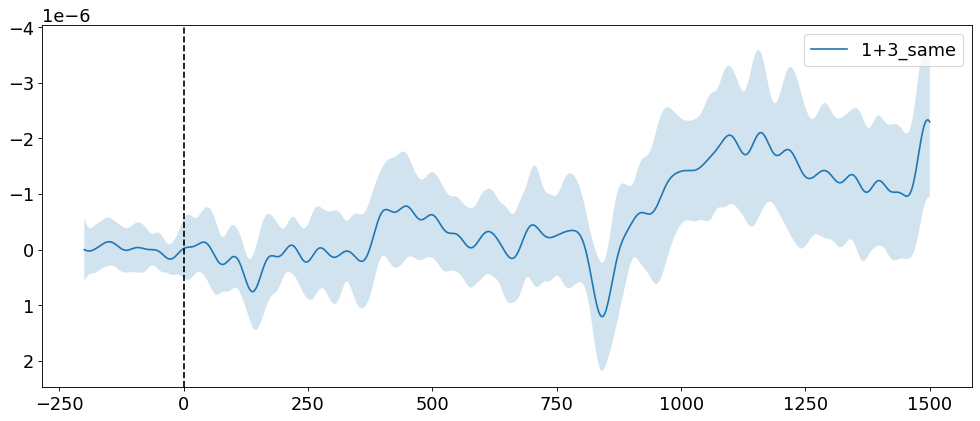

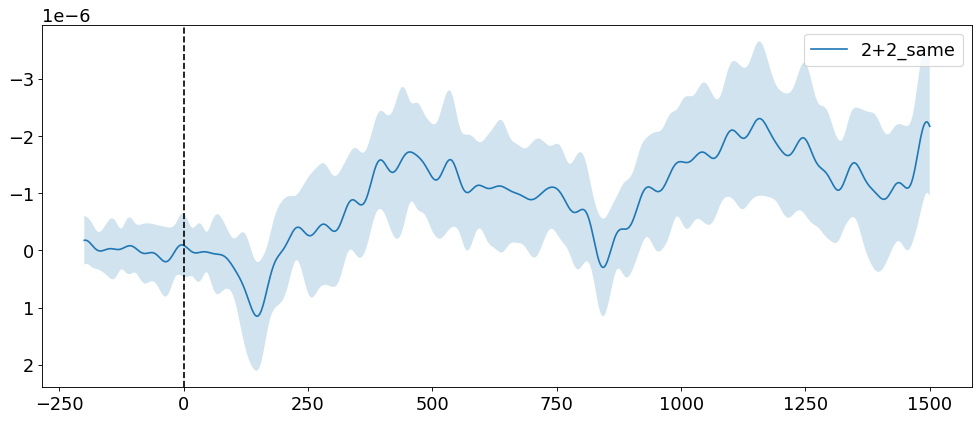

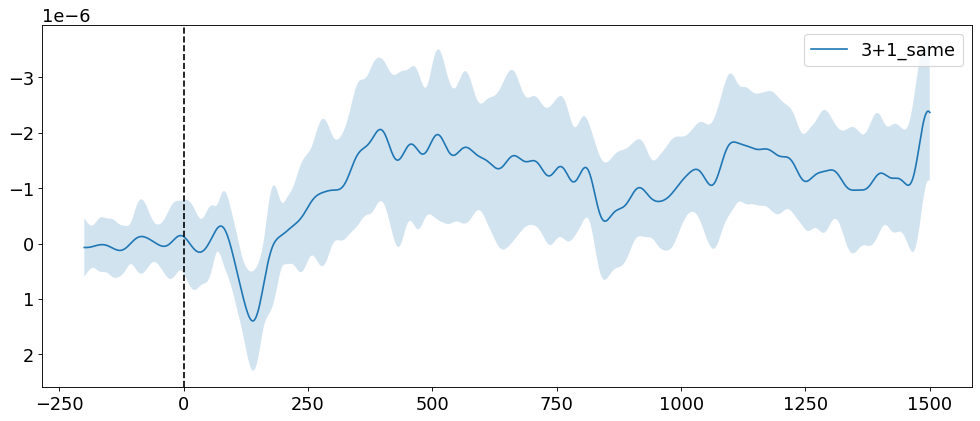

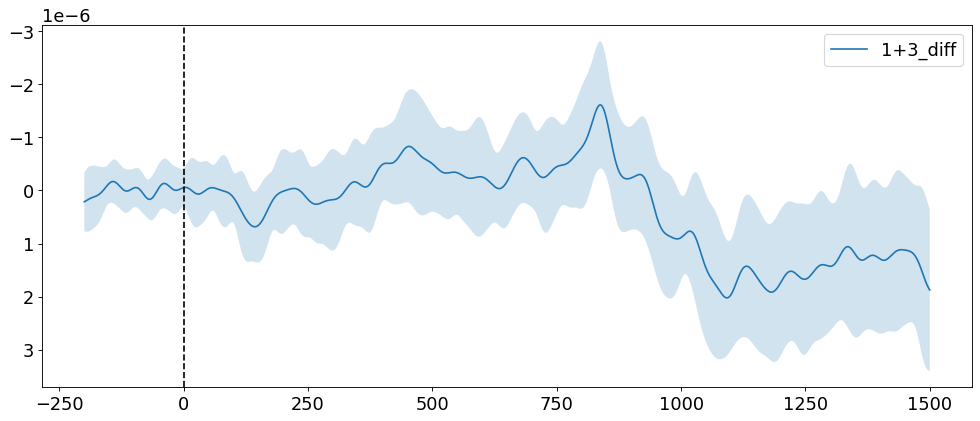

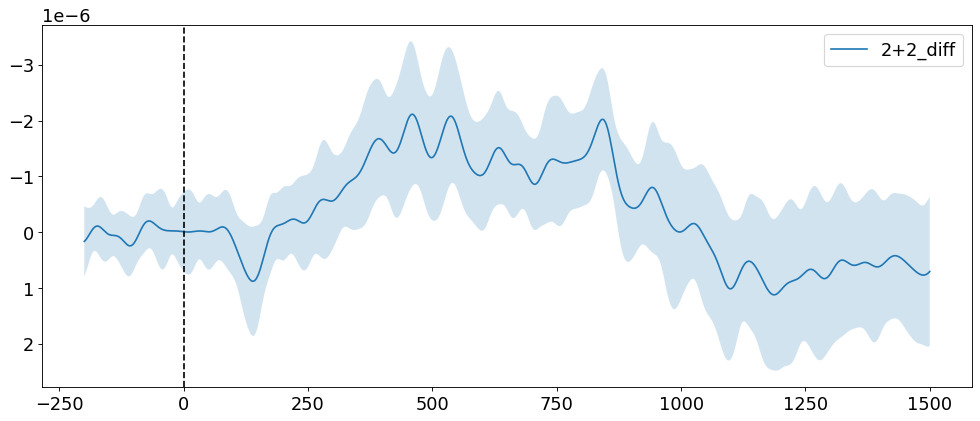

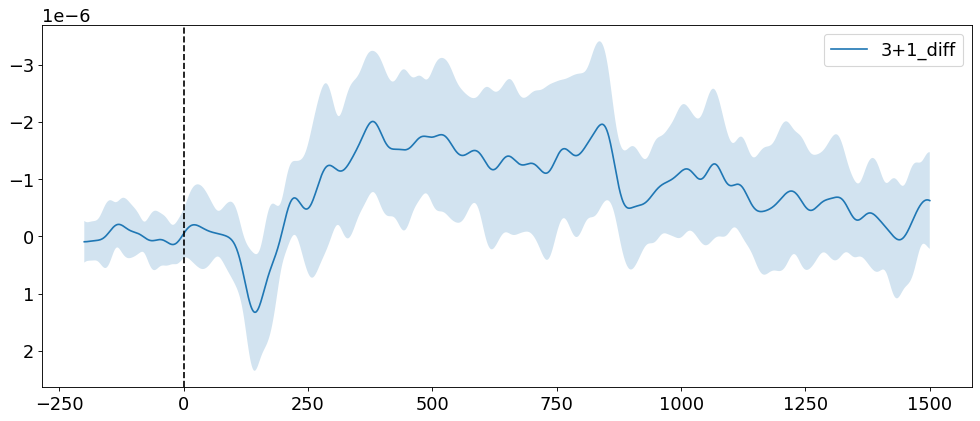

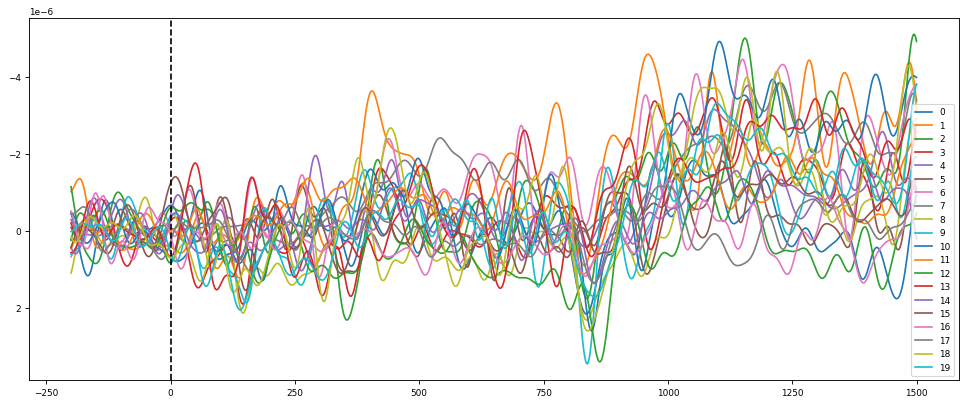

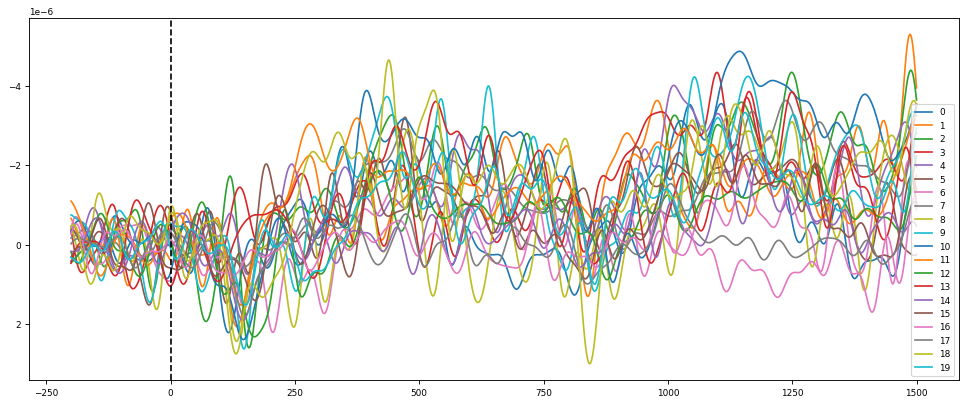

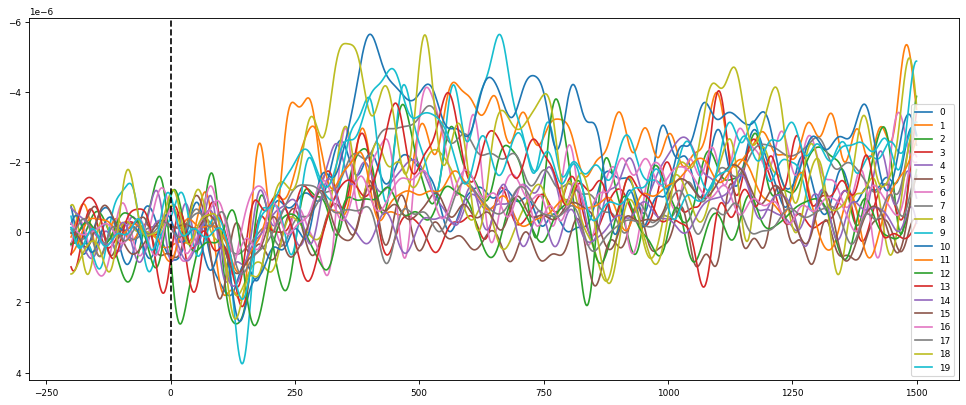

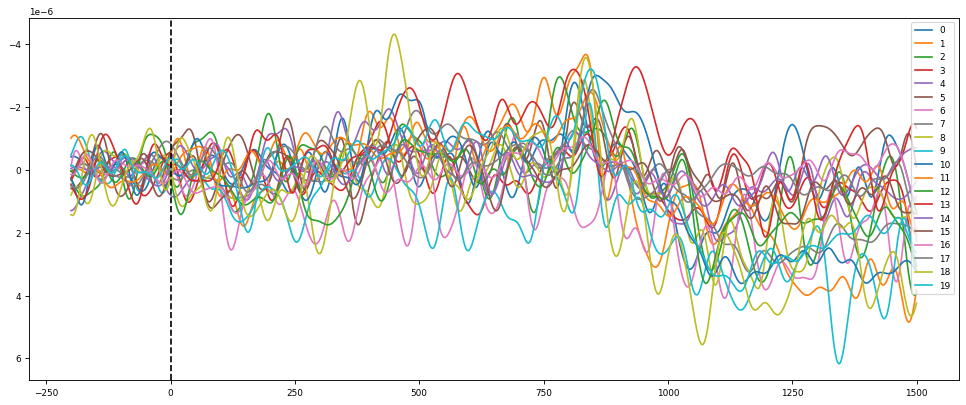

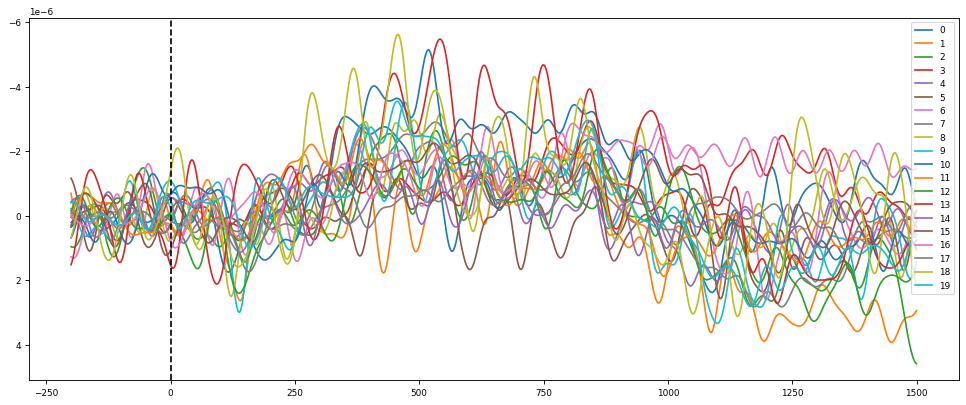

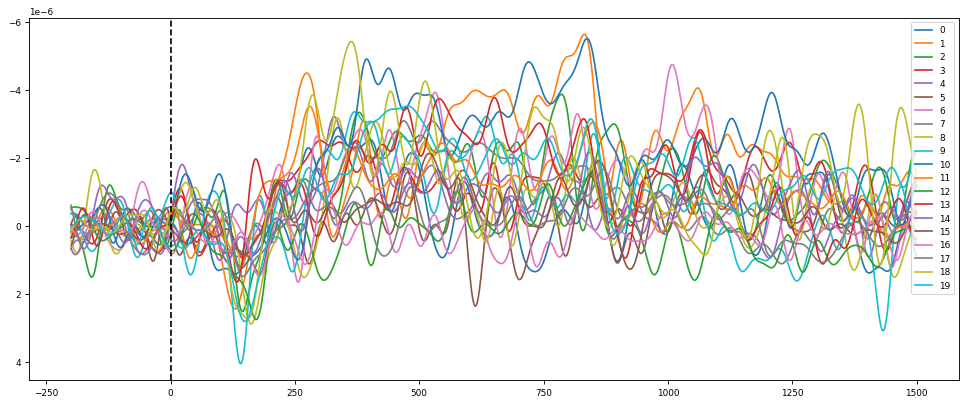

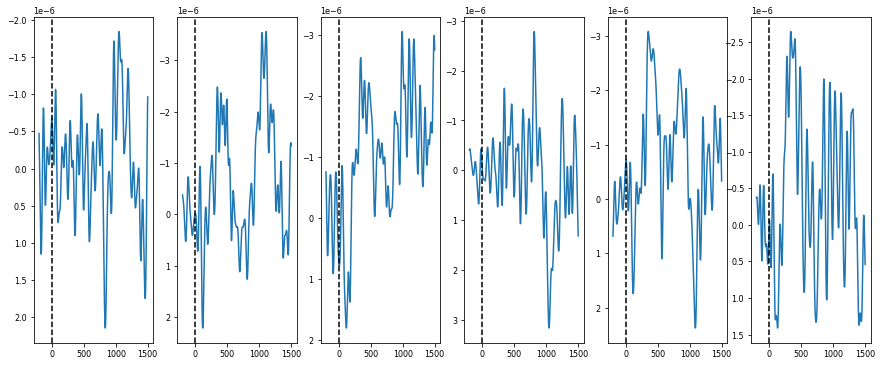

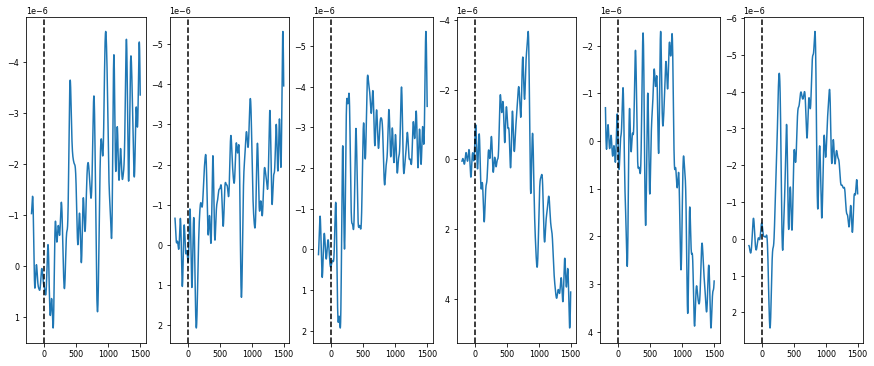

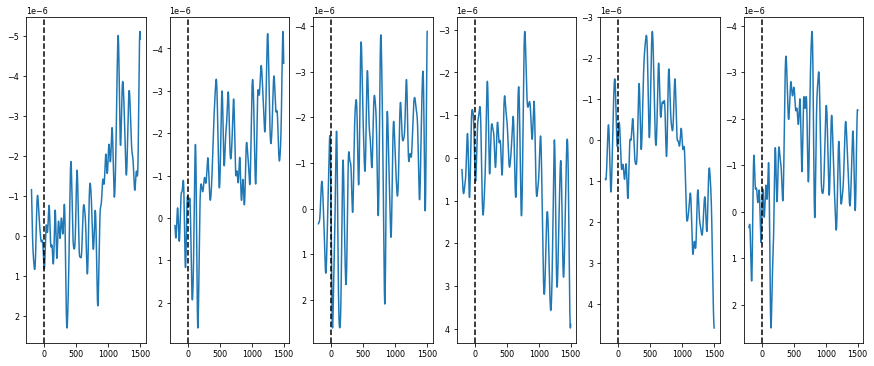

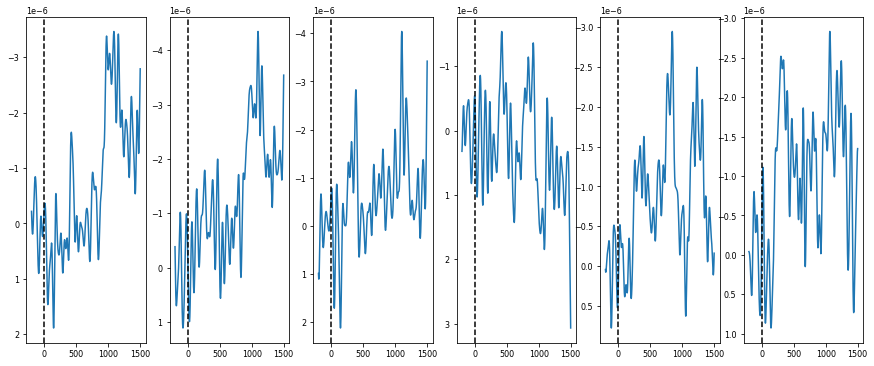

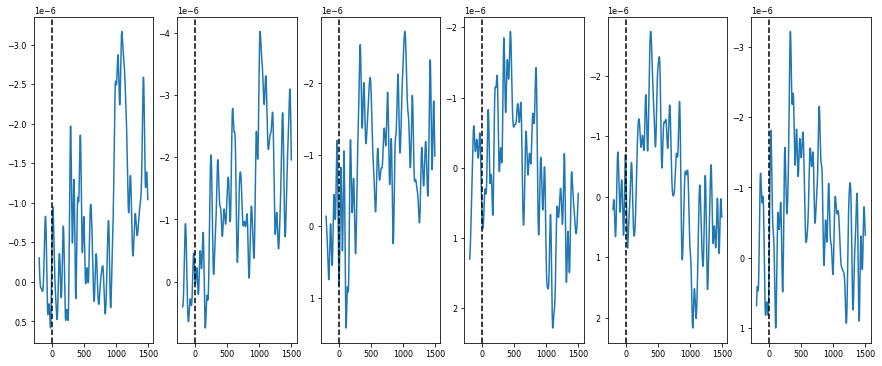

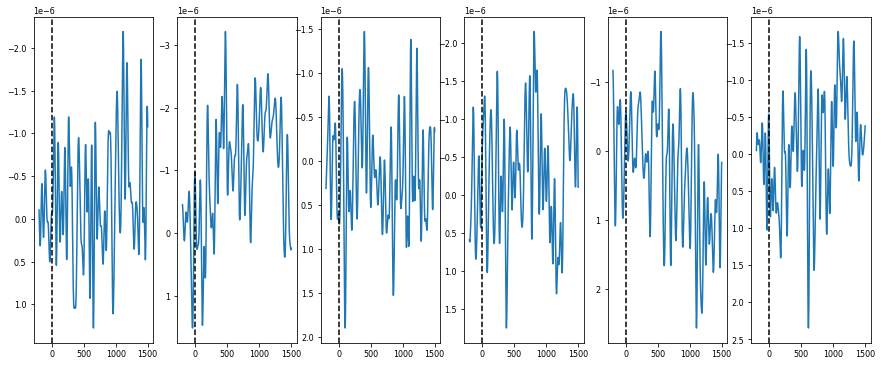

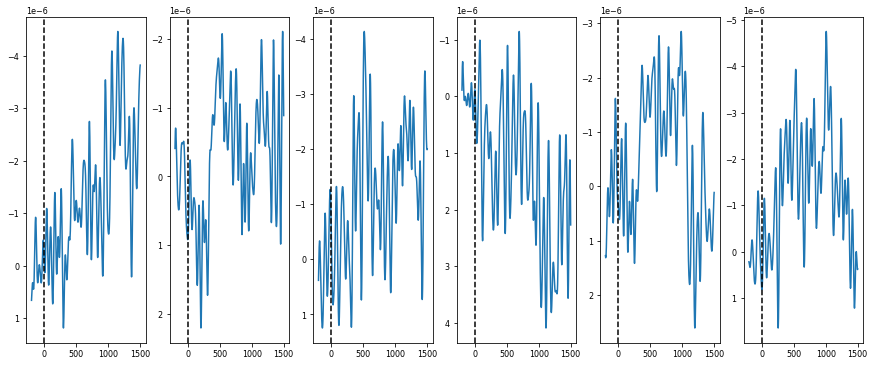

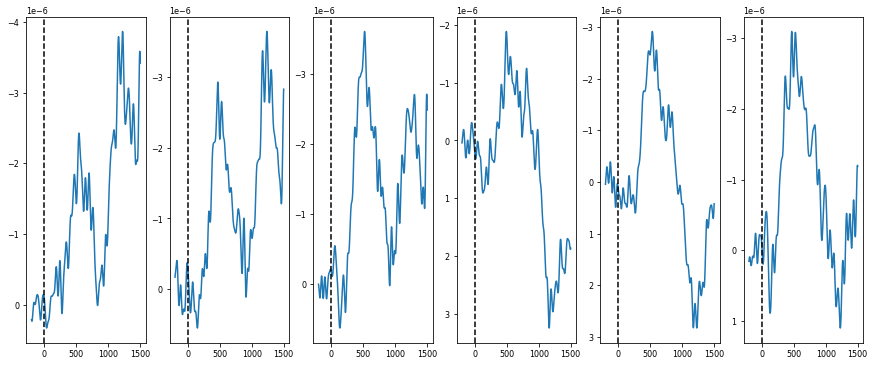

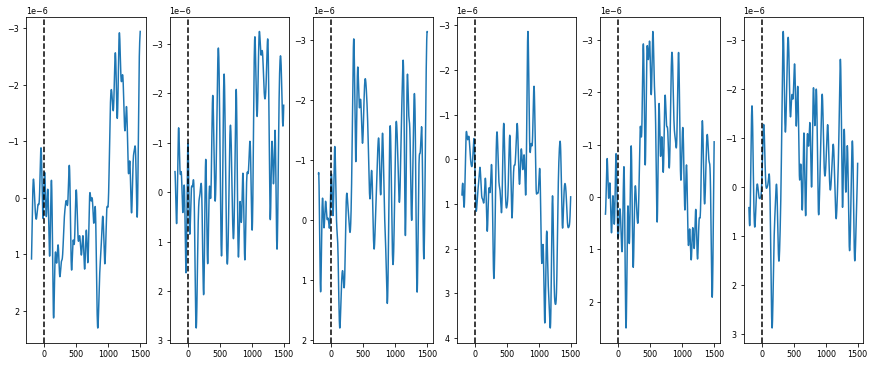

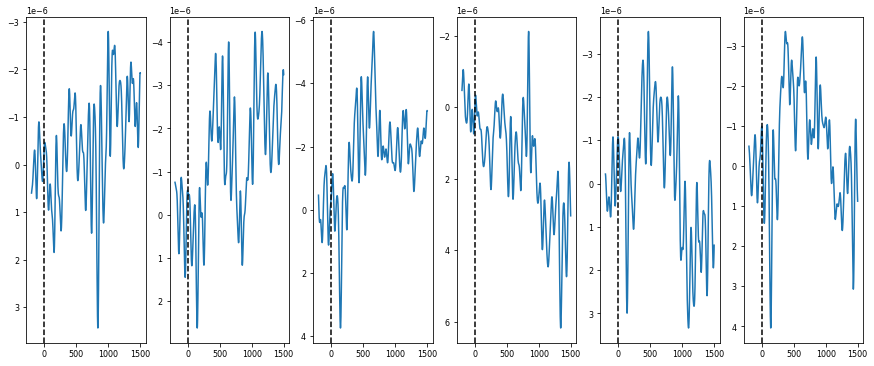

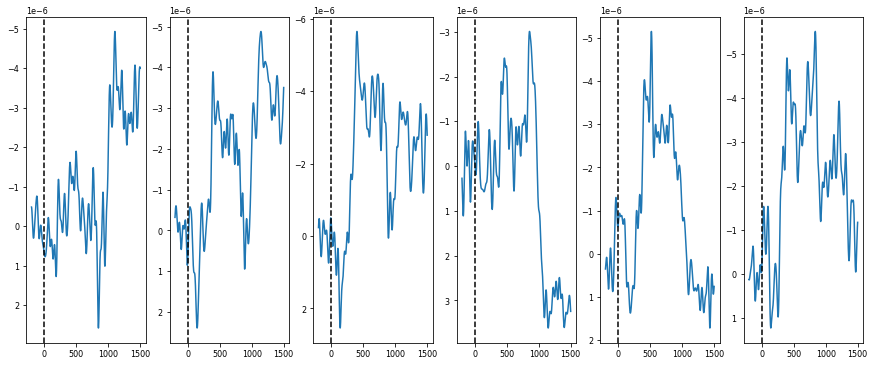

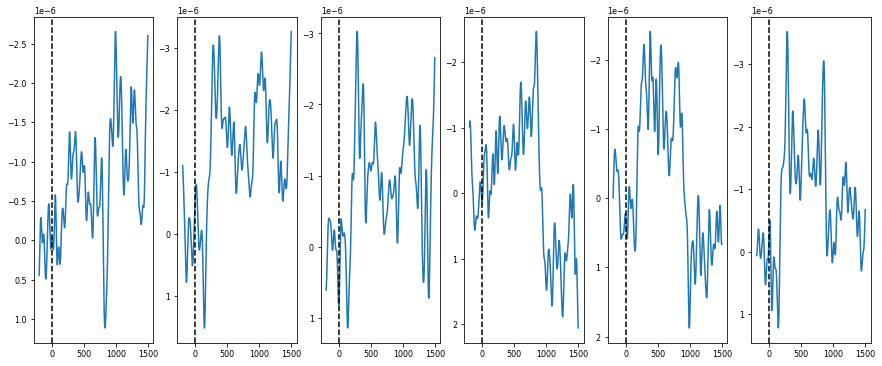

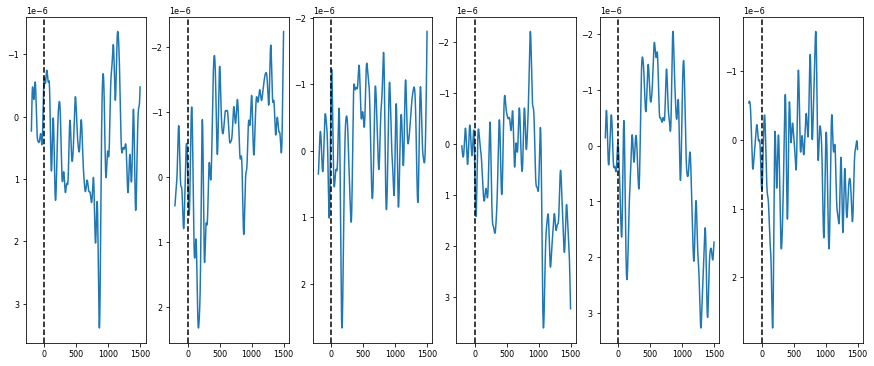

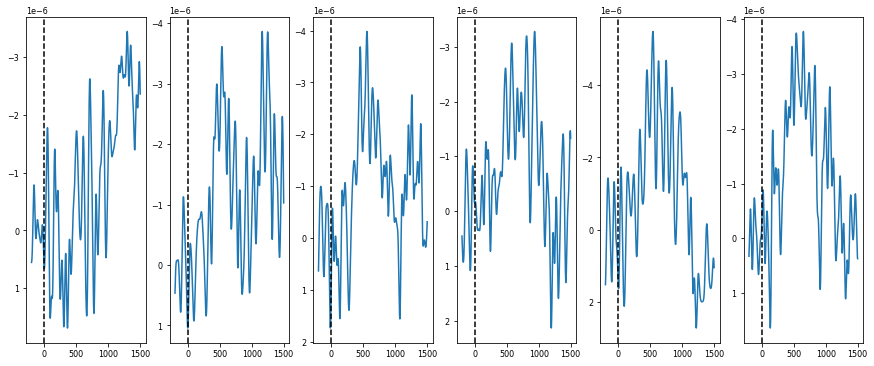

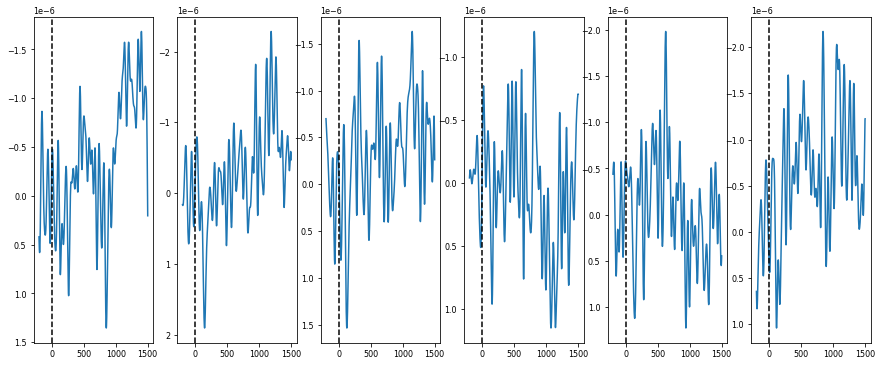

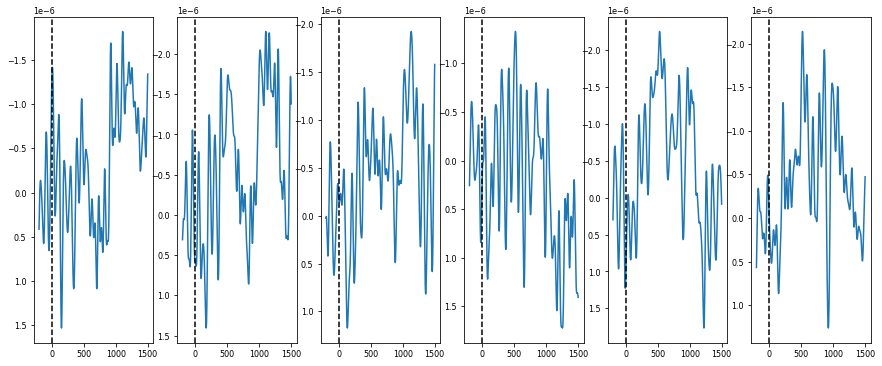

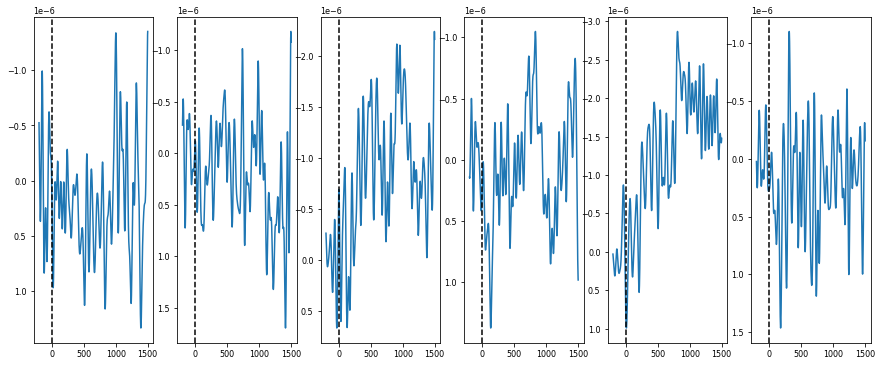

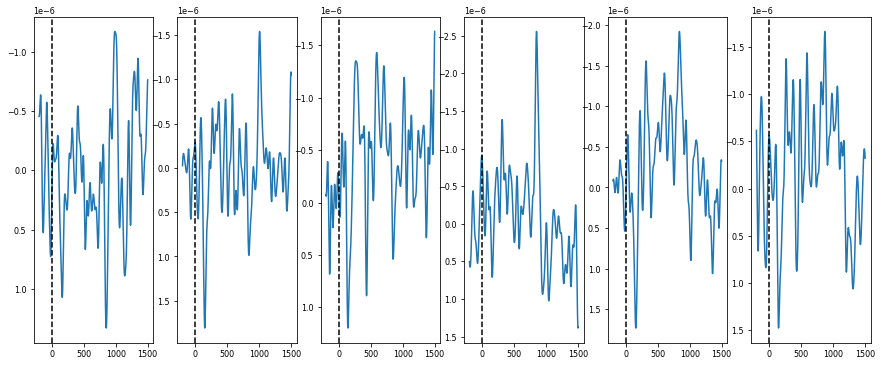

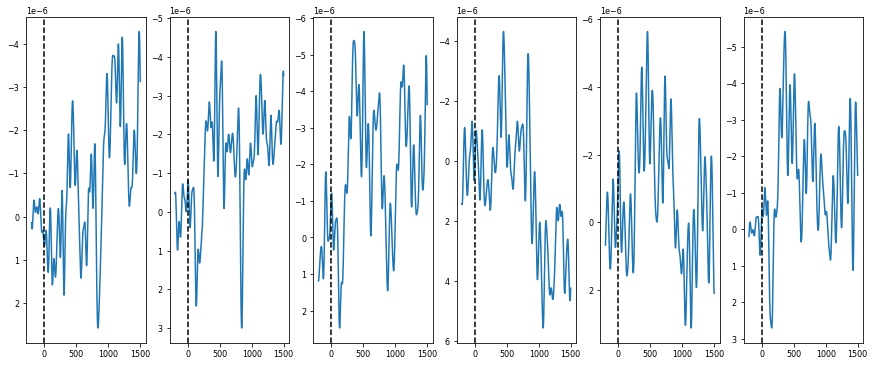

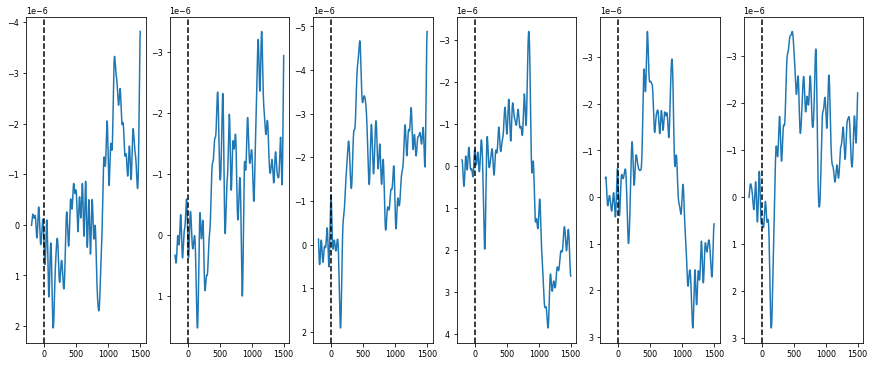

In [9]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(i))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [10]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

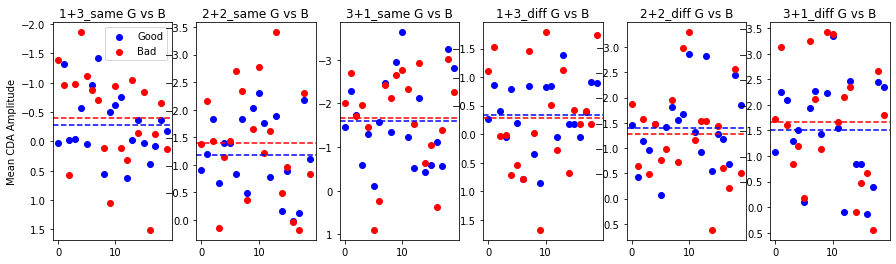

In [11]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

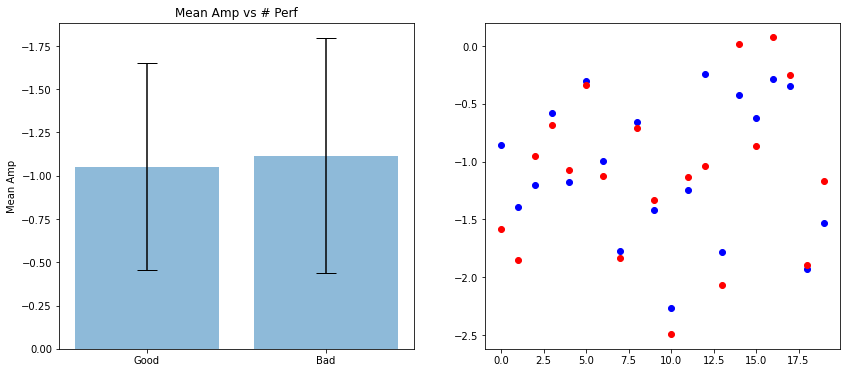

Corr Perf vs CDA Amp: (-0.049273056713168346, 0.7627040384824014)


In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

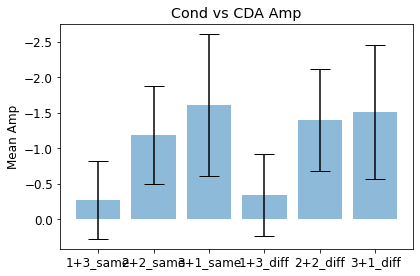

In [13]:
plt.rcParams.update({'font.size': 12})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = conds
for i, ss in enumerate(set_sizes):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Cond vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr Cond vs CDA Amp: (-0.289358798953615, 0.001348511349933946)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (0.2466944128355815, 0.1248858313429945)


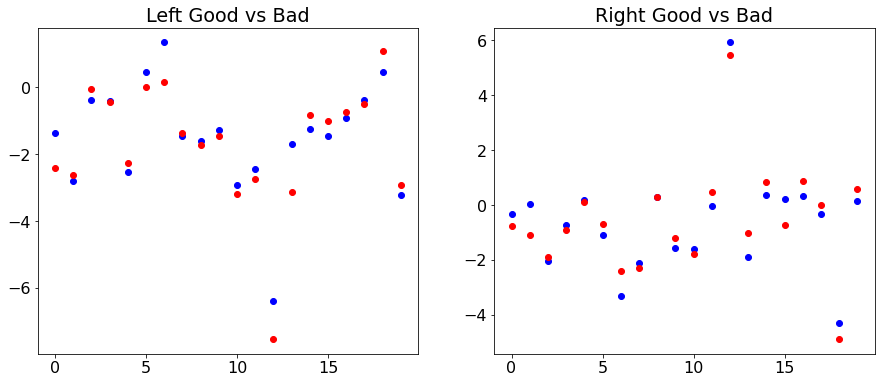

In [15]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ 1+3_same: (-0.10736230043273234, 0.6523290032890006)
Corr Perf Acc ~ 2+2_same: (-0.0035967913452493753, 0.9879926325850096)
Corr Perf Acc ~ 3+1_same: (-0.11047487804481963, 0.6428840079966083)
Corr Perf Acc ~ 1+3_diff: (-0.267703998507771, 0.25382740443673923)
Corr Perf Acc ~ 2+2_diff: (0.2112174857104268, 0.37136630233131723)
Corr Perf Acc ~ 3+1_diff: (-0.13263509031204282, 0.5772258533737763)


Text(0, 0.5, 'CDA Mean Amp')

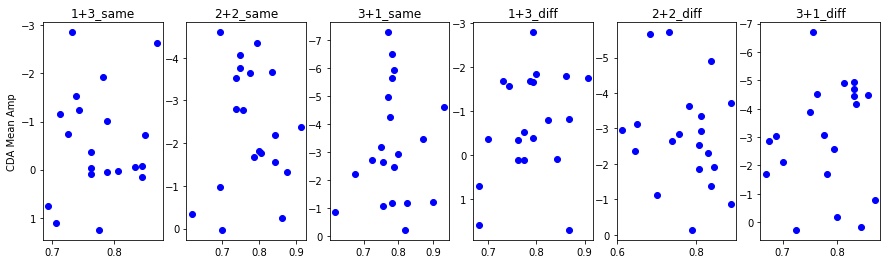

In [16]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

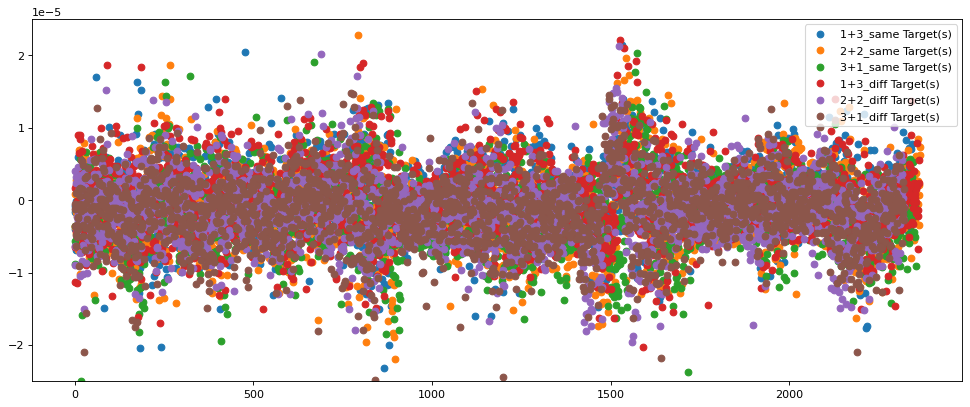

In [17]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

In [ ]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

In [ ]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        